In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
from functools import reduce

In [2]:
def distanceMatrix(f):
    # Read file
    df = pd.read_csv(f, sep=" ")
    max_value = df['distance.all'].max() + 100 # should be higher than highest value in the table

    # Make distance matrix, and mirror the values (it was only calculated one way)
    accs = list(set(df['acc1'].tolist() + df['acc2'].tolist()))
    df_matrix = df.pivot_table(columns='acc1', index='acc2', values='distance.all')
    df_matrix_T = df.pivot_table(columns='acc2', index='acc1', values='distance.all')
    df_matrix = df_matrix.fillna(0)
    df_matrix_T = df_matrix_T.fillna(0)
    
    my_df = [df_matrix, df_matrix_T]
    df_combined = reduce(lambda x, y: x.add(y, fill_value=0), my_df)

    excelfile = f + ".xlsx"
    df_combined.to_excel(excelfile)
    print("Wrote", excelfile, "to disk")

    return(df_combined, max_value)

In [3]:
def invertMatrix(df_matrix, max_value):
    print("max value + 100 =", max_value)
    df_matrix = max_value - df_matrix
    return(df_matrix)

In [4]:
def plotHeatmap(f, df_matrix, max_value):
    font = {'family' : 'sans-serif',
            'weight' : 'normal',
            'size'   : 22}
    matplotlib.rc('font', **font)

    fig, ax = plt.subplots(figsize=(60, 60))
    fig.subplots_adjust(bottom=0.3)

    # draw heatmap
    plt.pcolor(df_matrix.values, cmap=plt.cm.plasma)
    plt.colorbar()
    plt.xticks(np.arange(0.5, len(df_matrix.columns), 1), df_matrix.index, rotation=90)
    plt.yticks(np.arange(0.5, len(df_matrix.index), 1), df_matrix.columns, rotation=0)
    plt.title(f + ". Value shown is the (maximum value + 100) minus the real value. Max value is " + str(max_value - 100))
    
    # Save figure to file
    plotfile = f + ".pdf"
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

../reference/TRBJ_human.distances.txt
Wrote ../reference/TRBJ_human.distances.txt.xlsx to disk
max value + 100 = 129
Wrote ../reference/TRBJ_human.distances.txt.pdf to disk
../reference/IGKJ_mouse.distances.txt
Wrote ../reference/IGKJ_mouse.distances.txt.xlsx to disk
max value + 100 = 113
Wrote ../reference/IGKJ_mouse.distances.txt.pdf to disk
../reference/IGHJ_mouse.distances.txt
Wrote ../reference/IGHJ_mouse.distances.txt.xlsx to disk
max value + 100 = 118
Wrote ../reference/IGHJ_mouse.distances.txt.pdf to disk
../reference/IGHJ_human.distances.txt
Wrote ../reference/IGHJ_human.distances.txt.xlsx to disk
max value + 100 = 137
Wrote ../reference/IGHJ_human.distances.txt.pdf to disk
../reference/IGLJ_mouse.distances.txt
Wrote ../reference/IGLJ_mouse.distances.txt.xlsx to disk
max value + 100 = 123
Wrote ../reference/IGLJ_mouse.distances.txt.pdf to disk
../reference/TRAV_human.distances.txt
Wrote ../reference/TRAV_human.distances.txt.xlsx to disk
max value + 100 = 305
Wrote ../reference

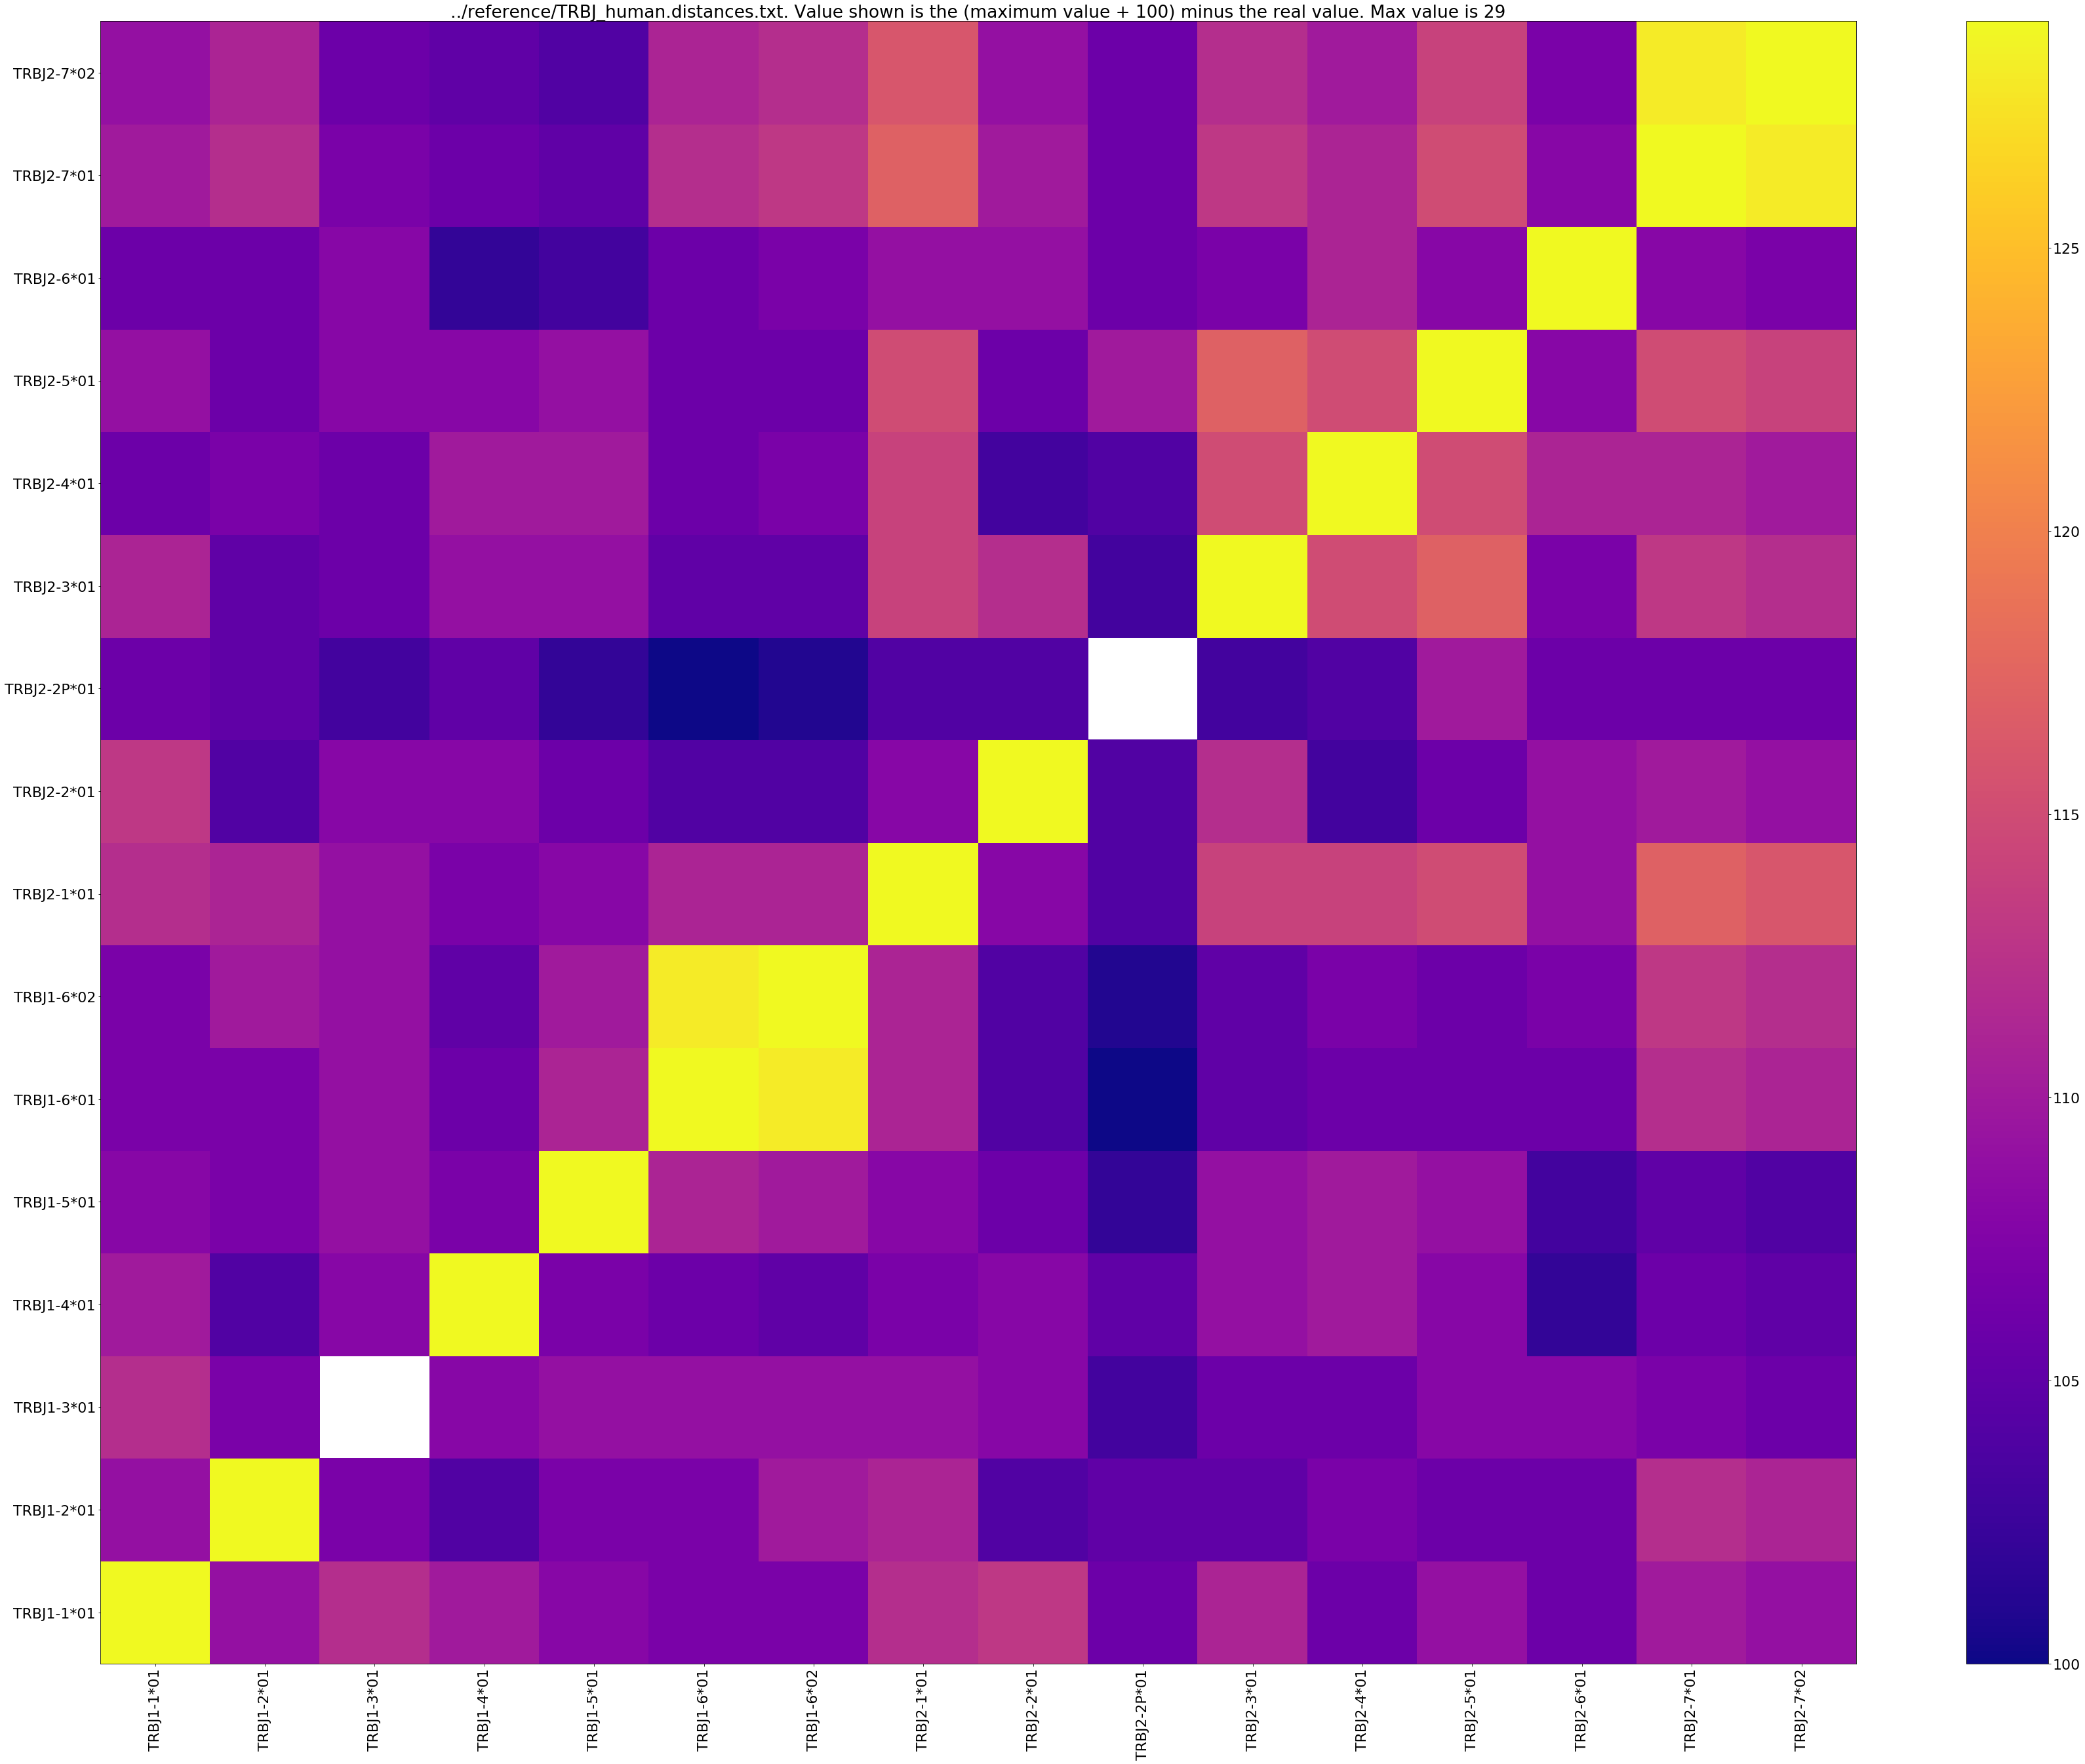

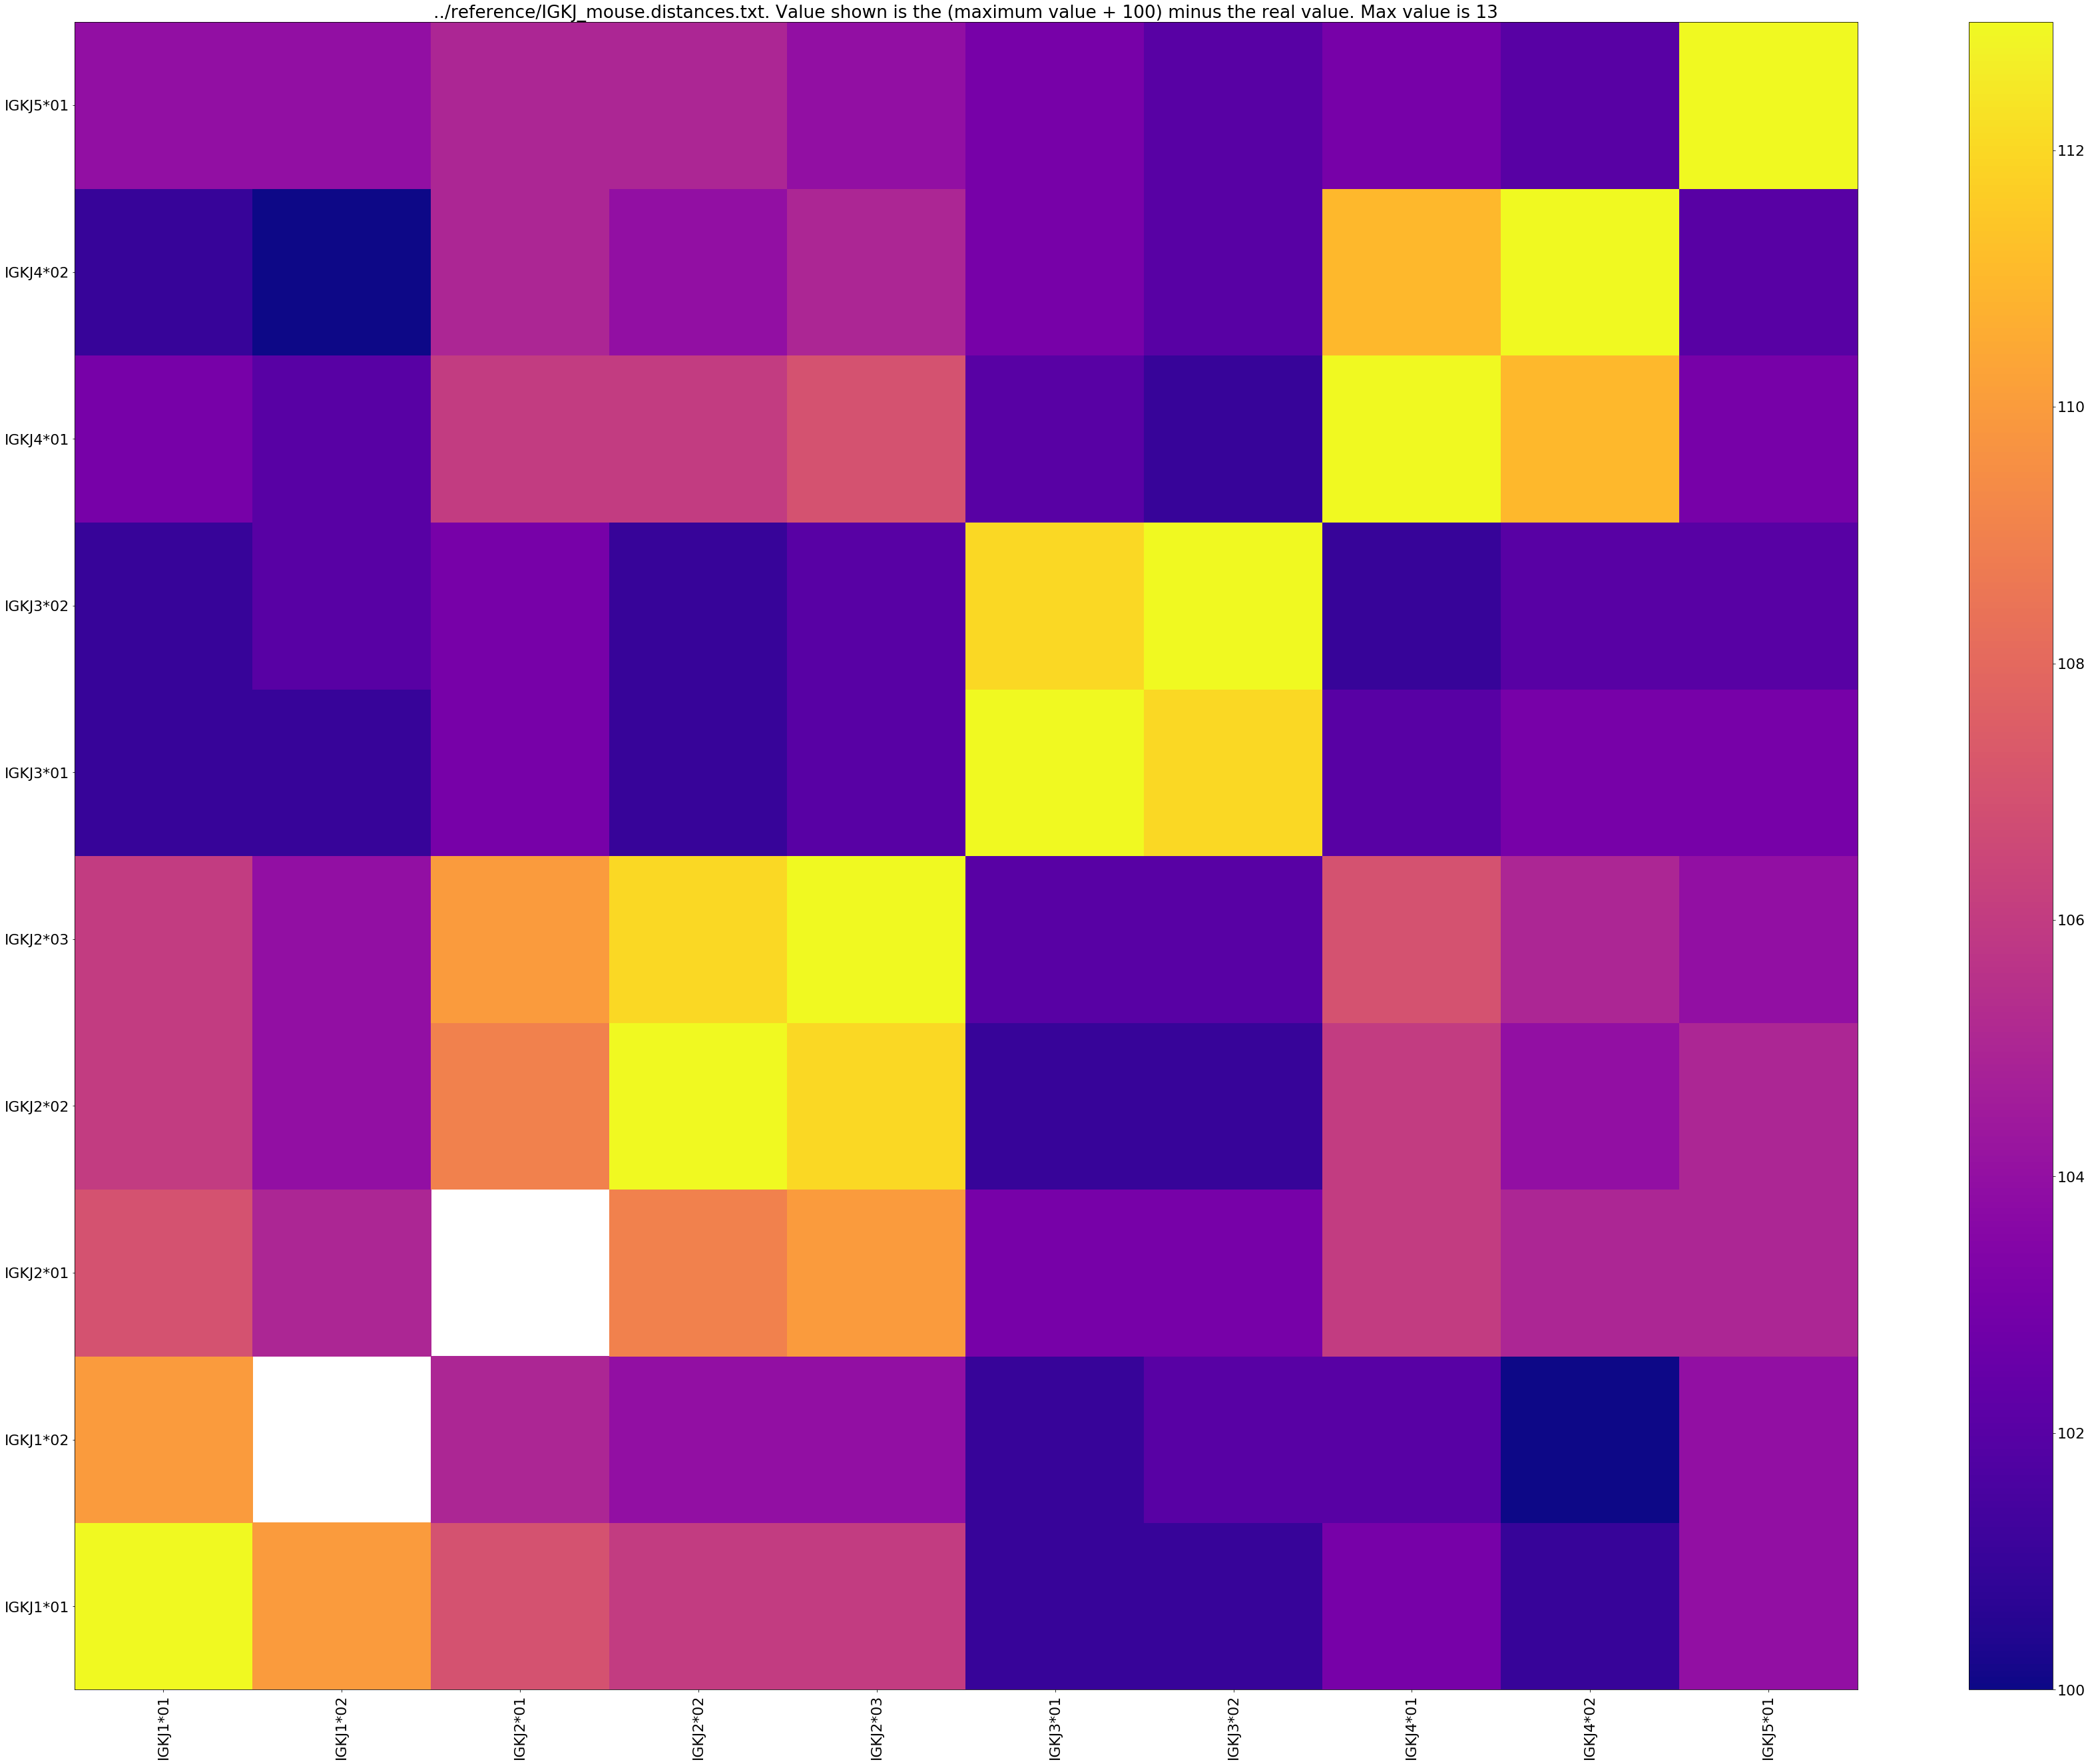

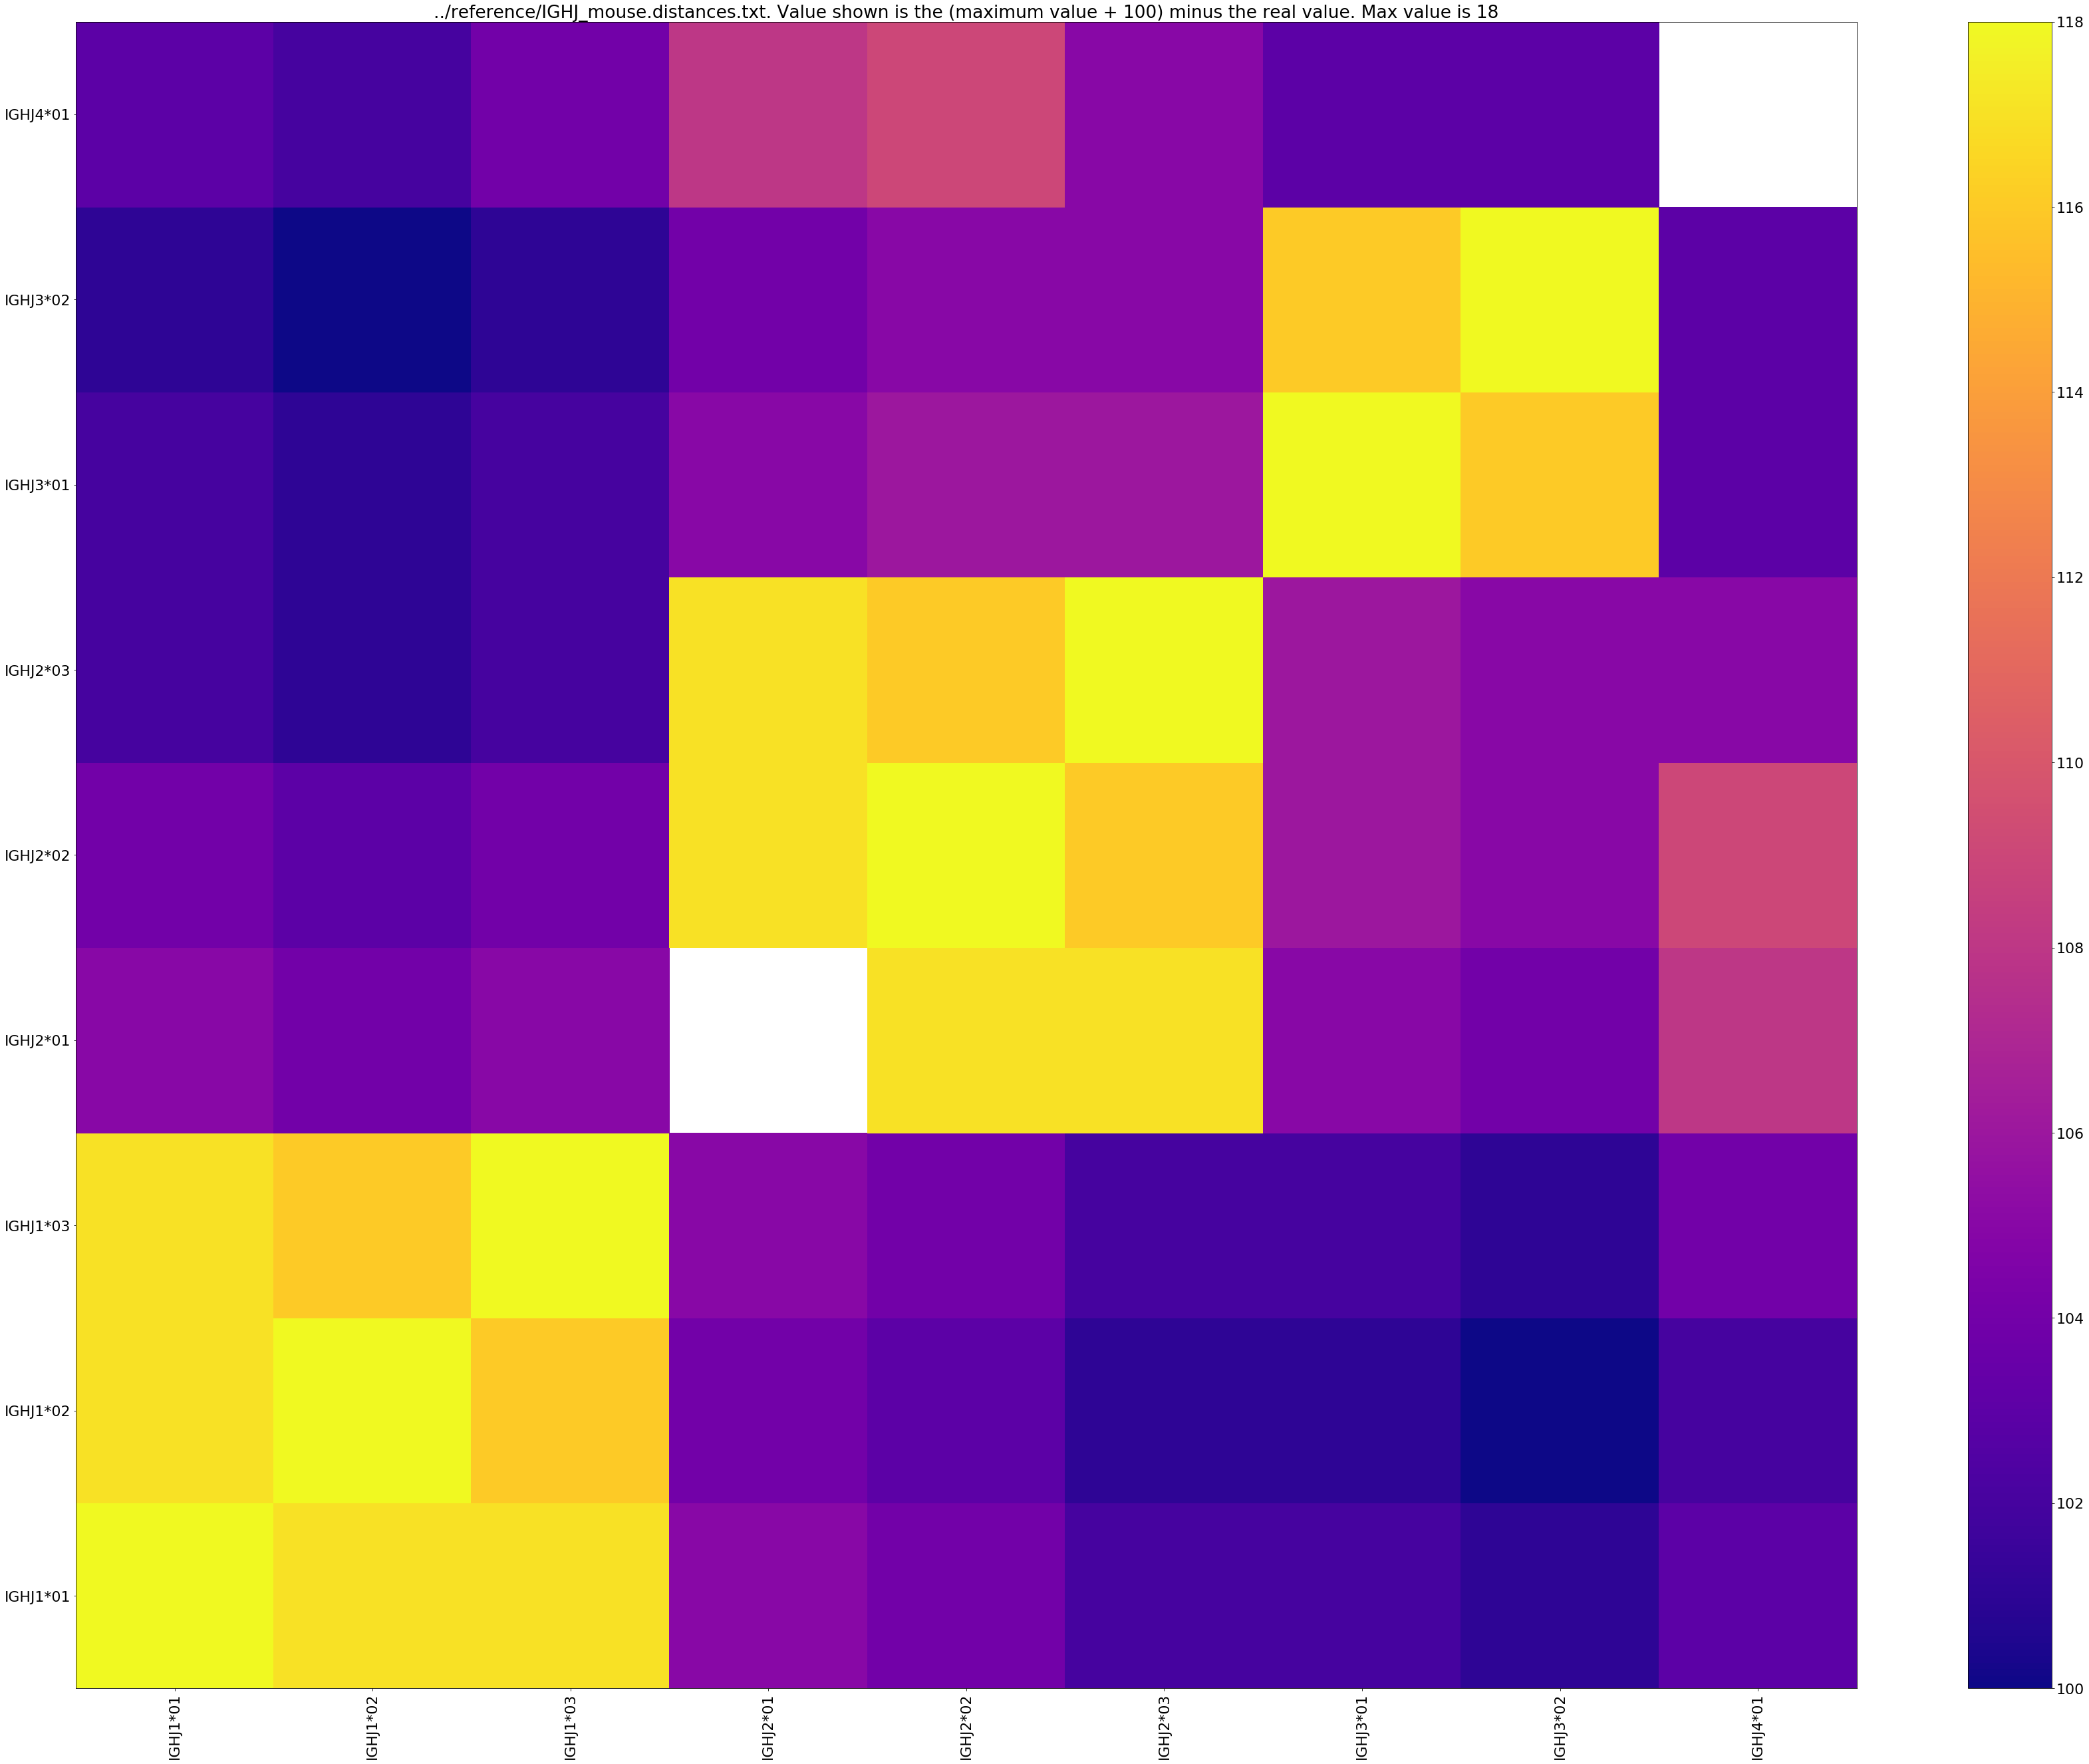

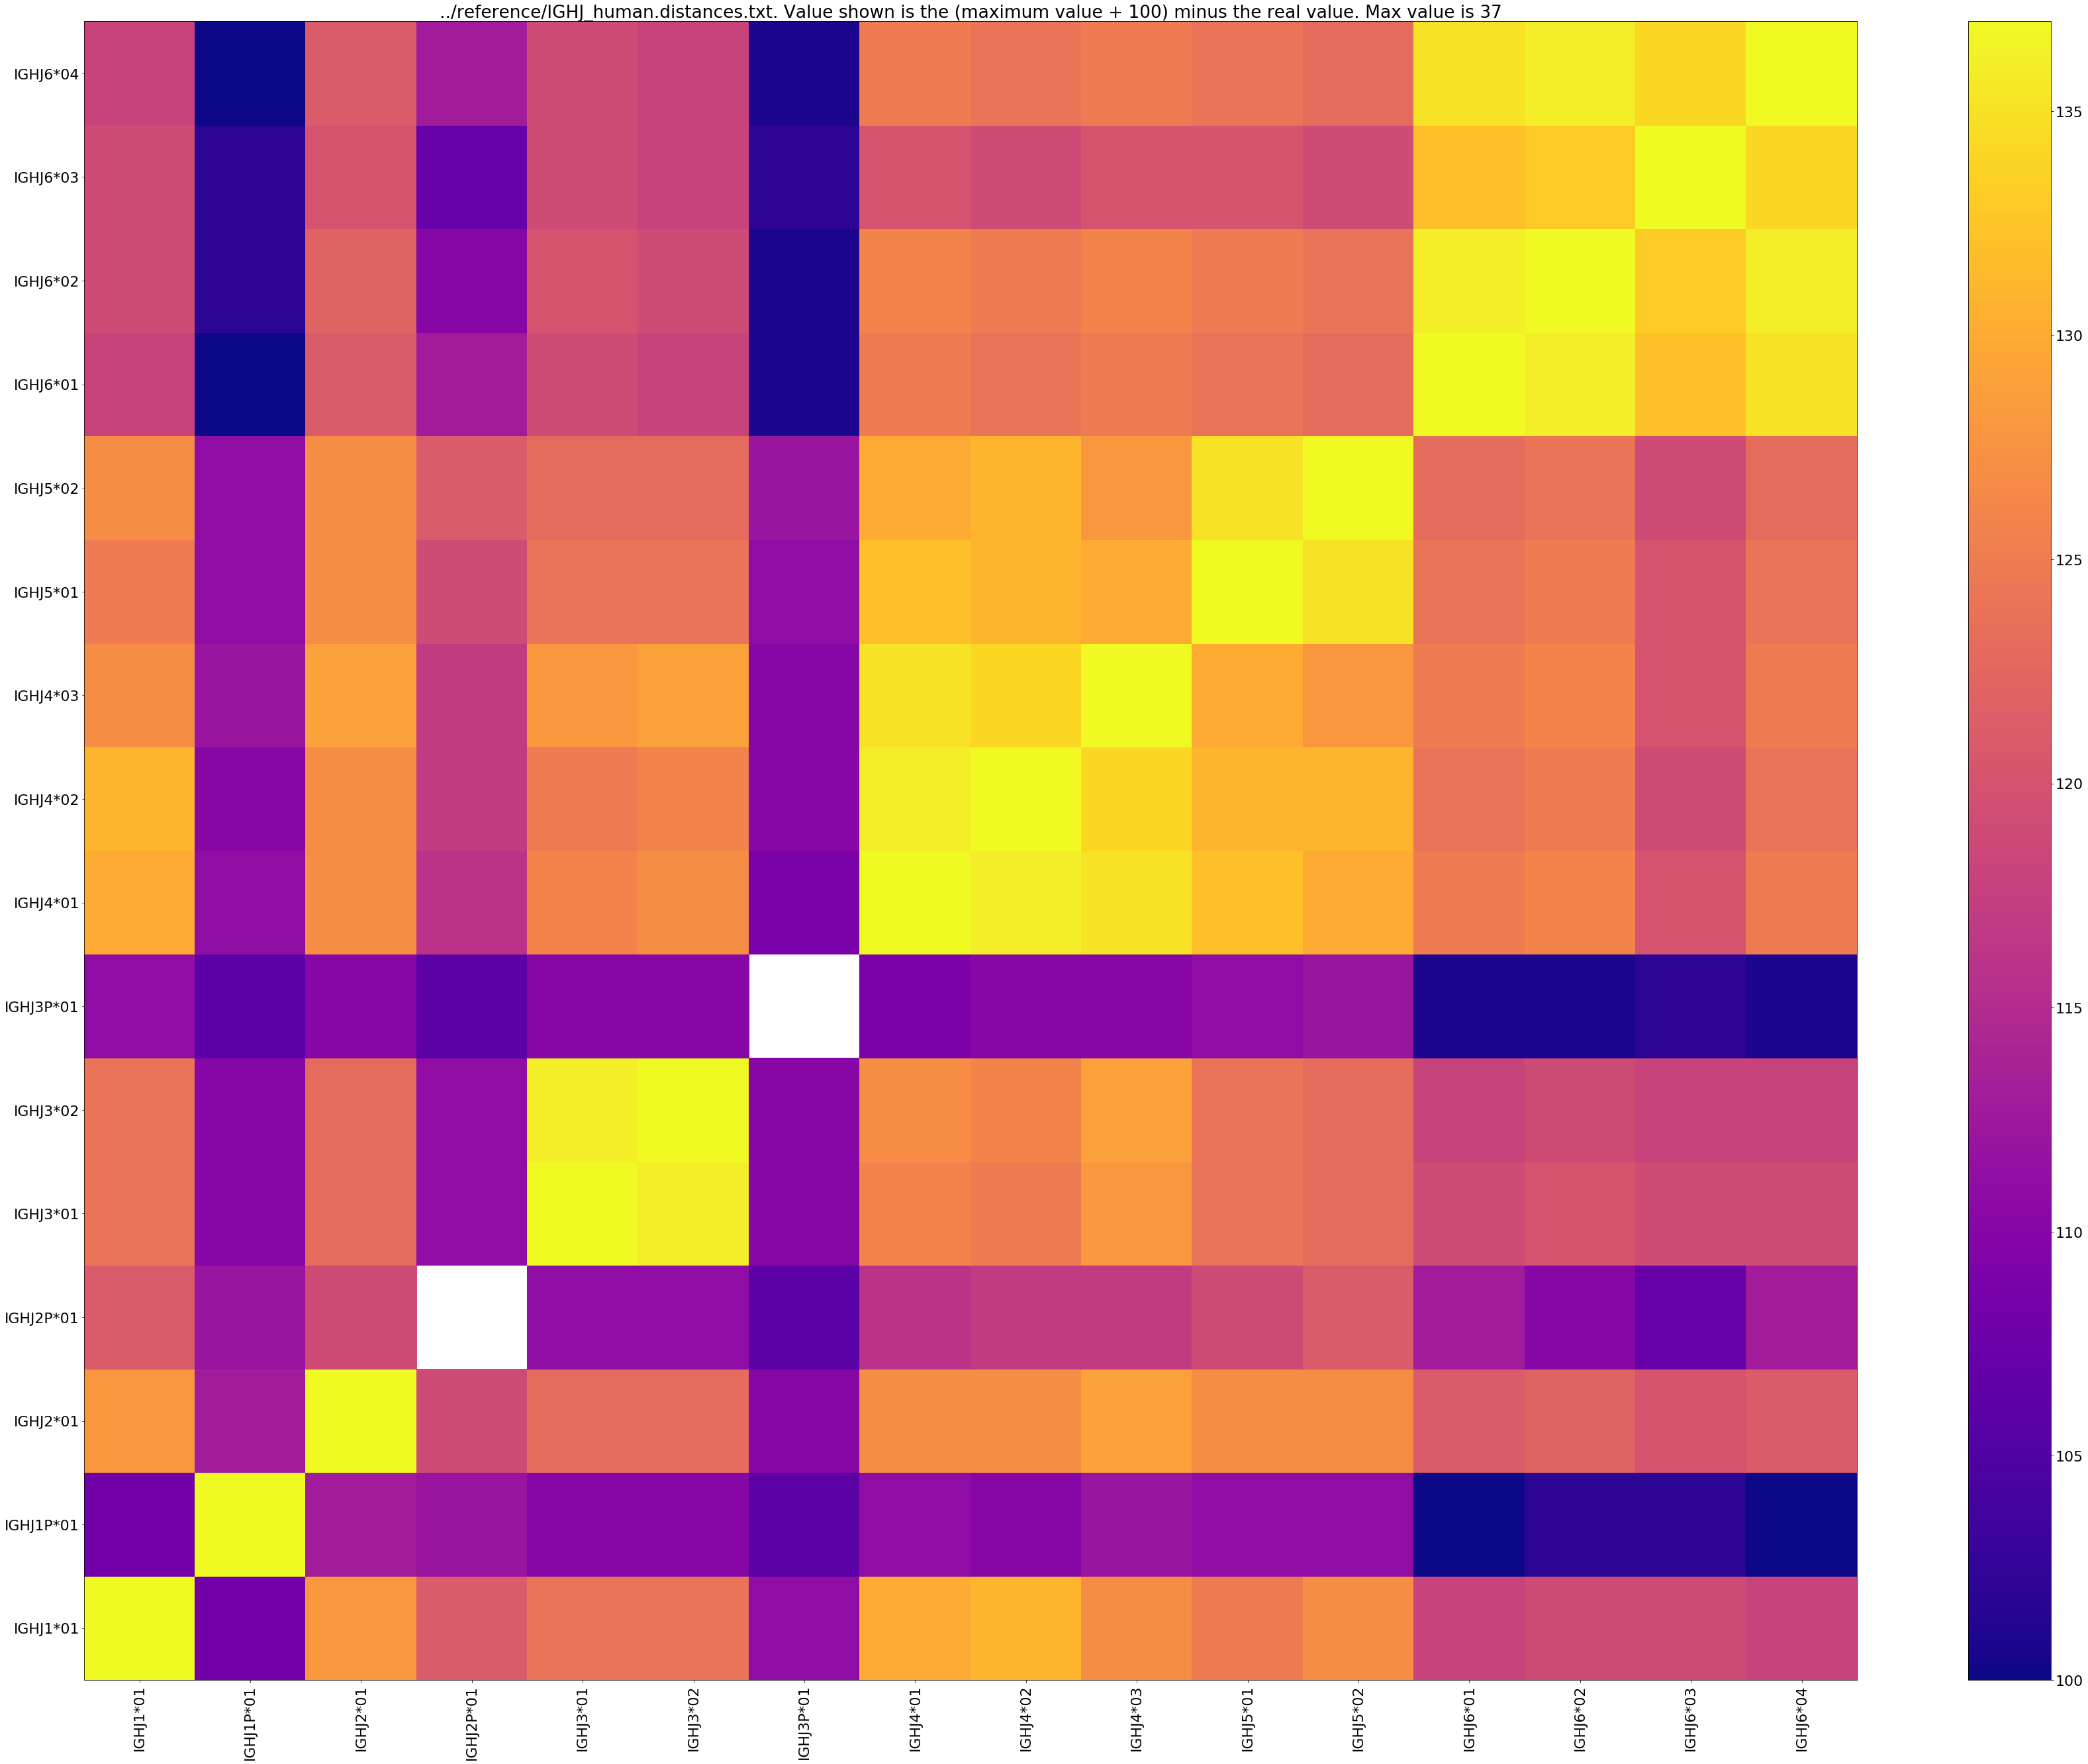

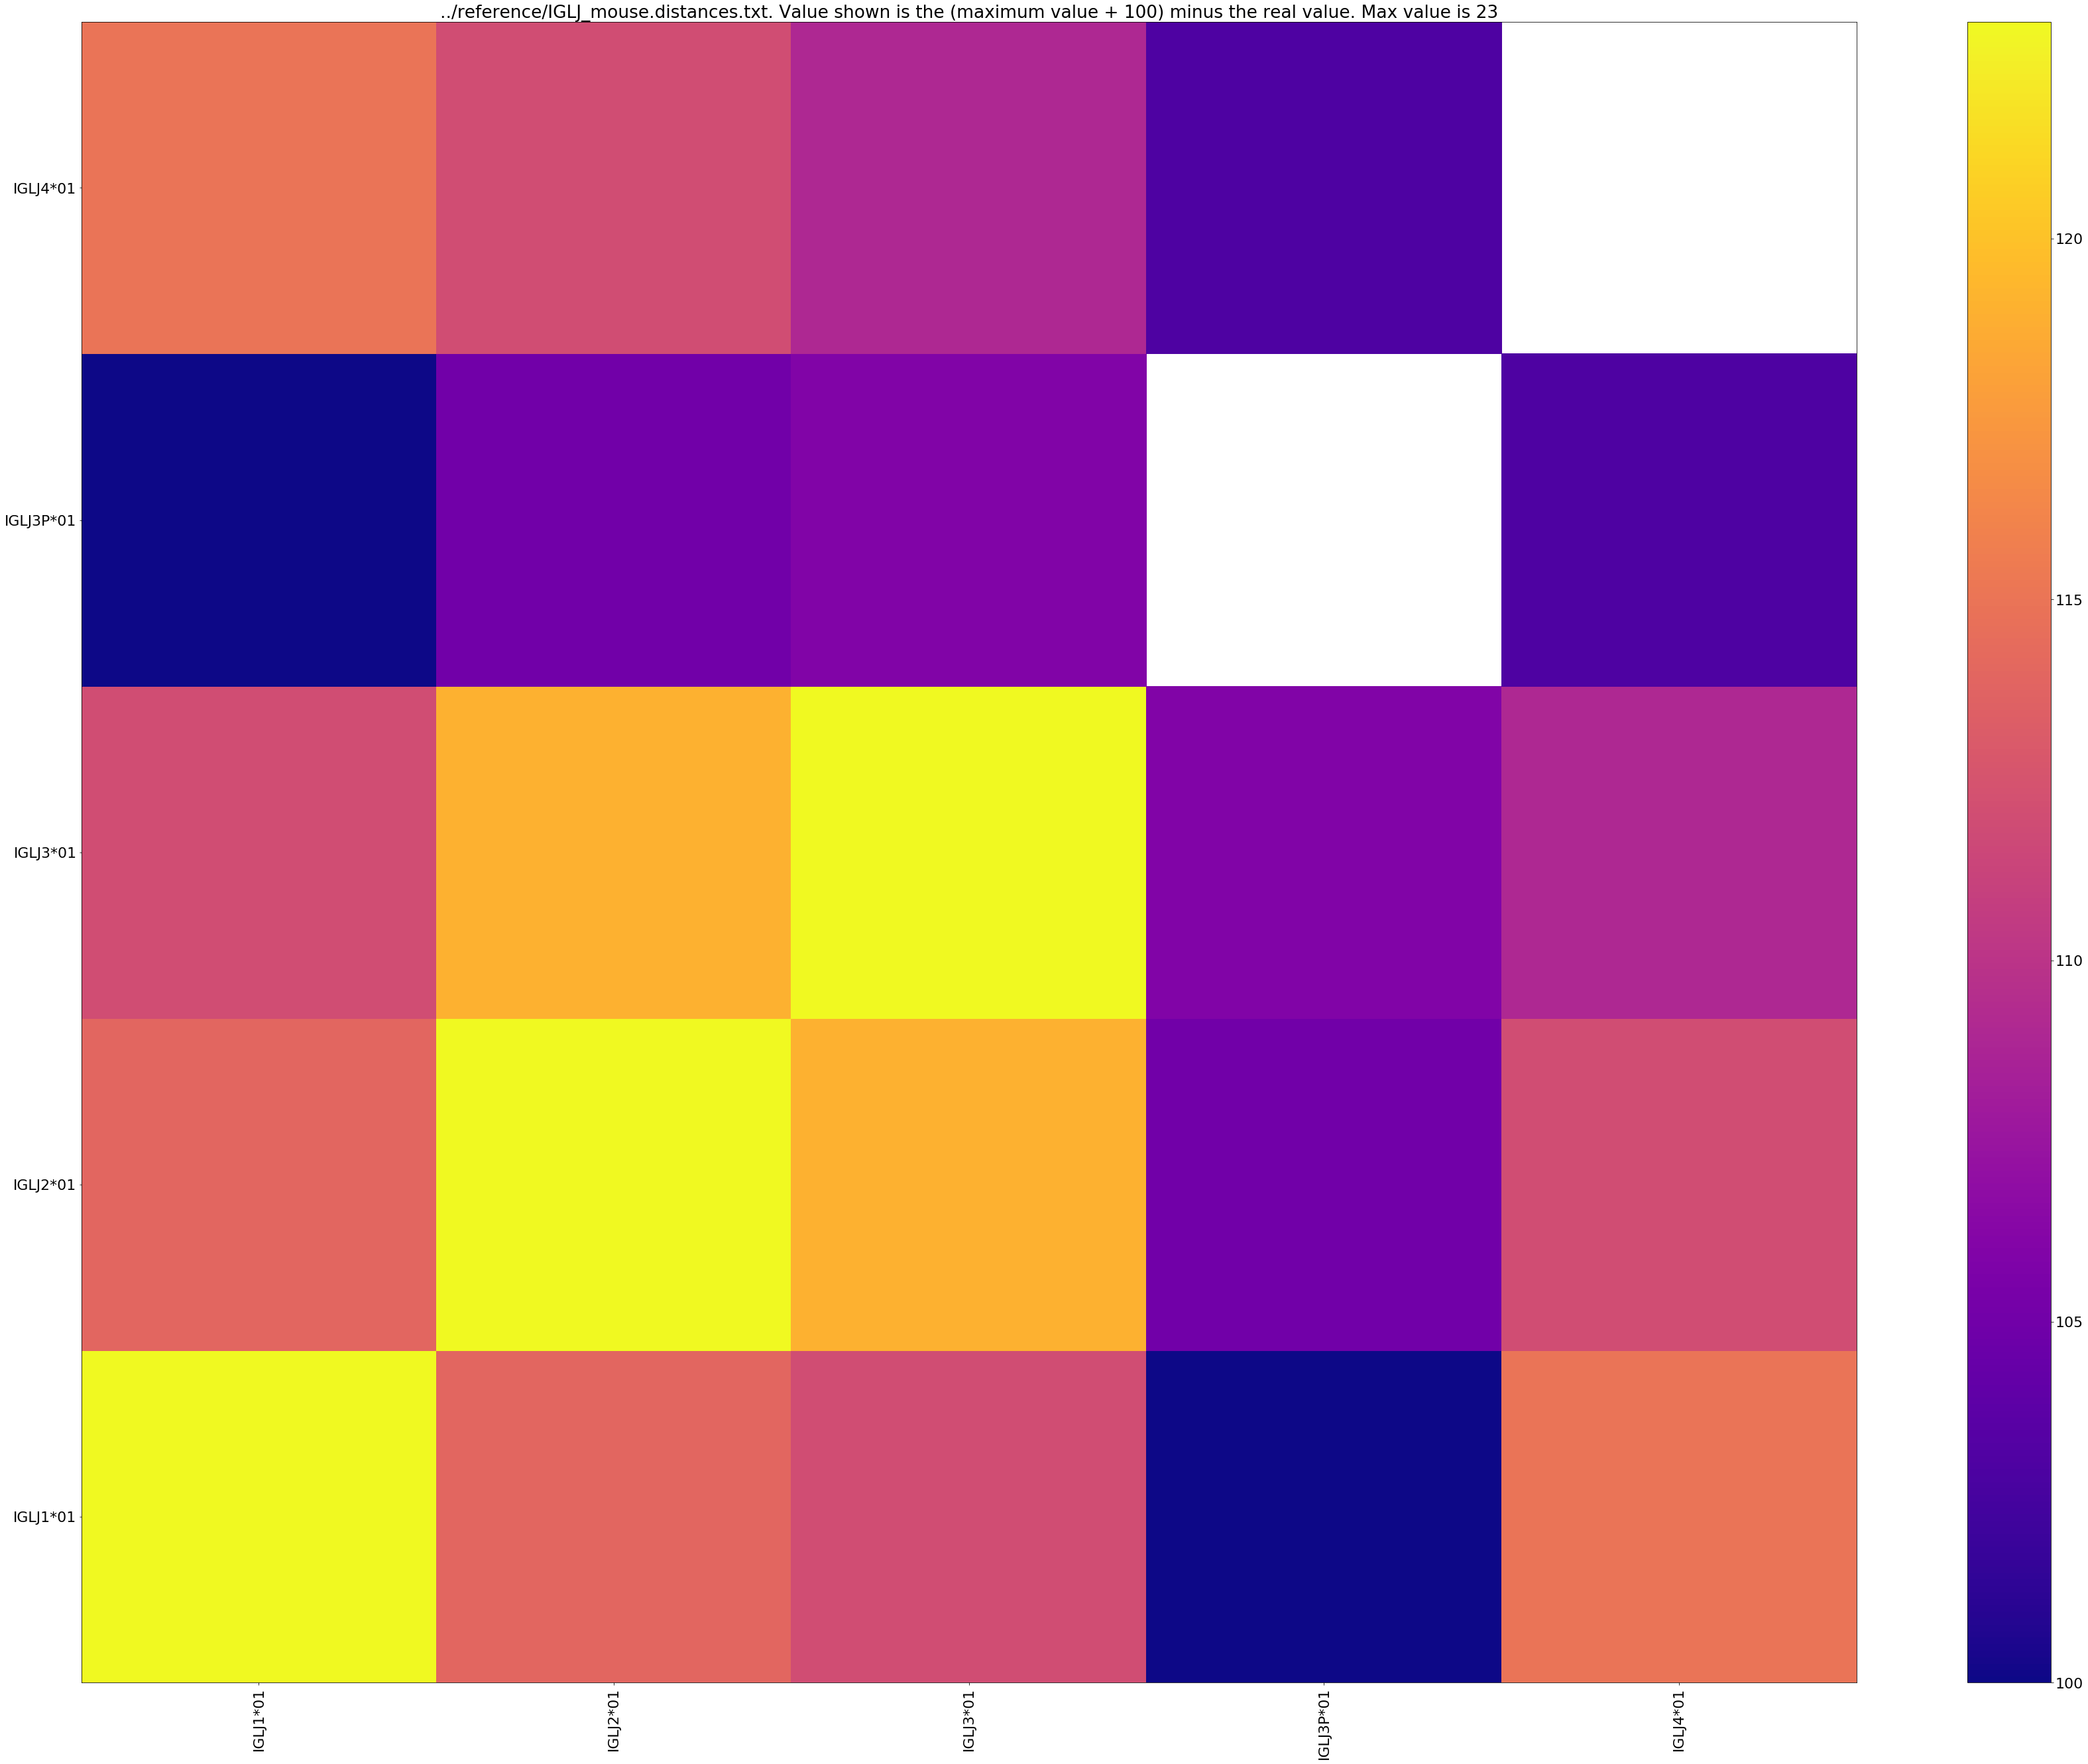

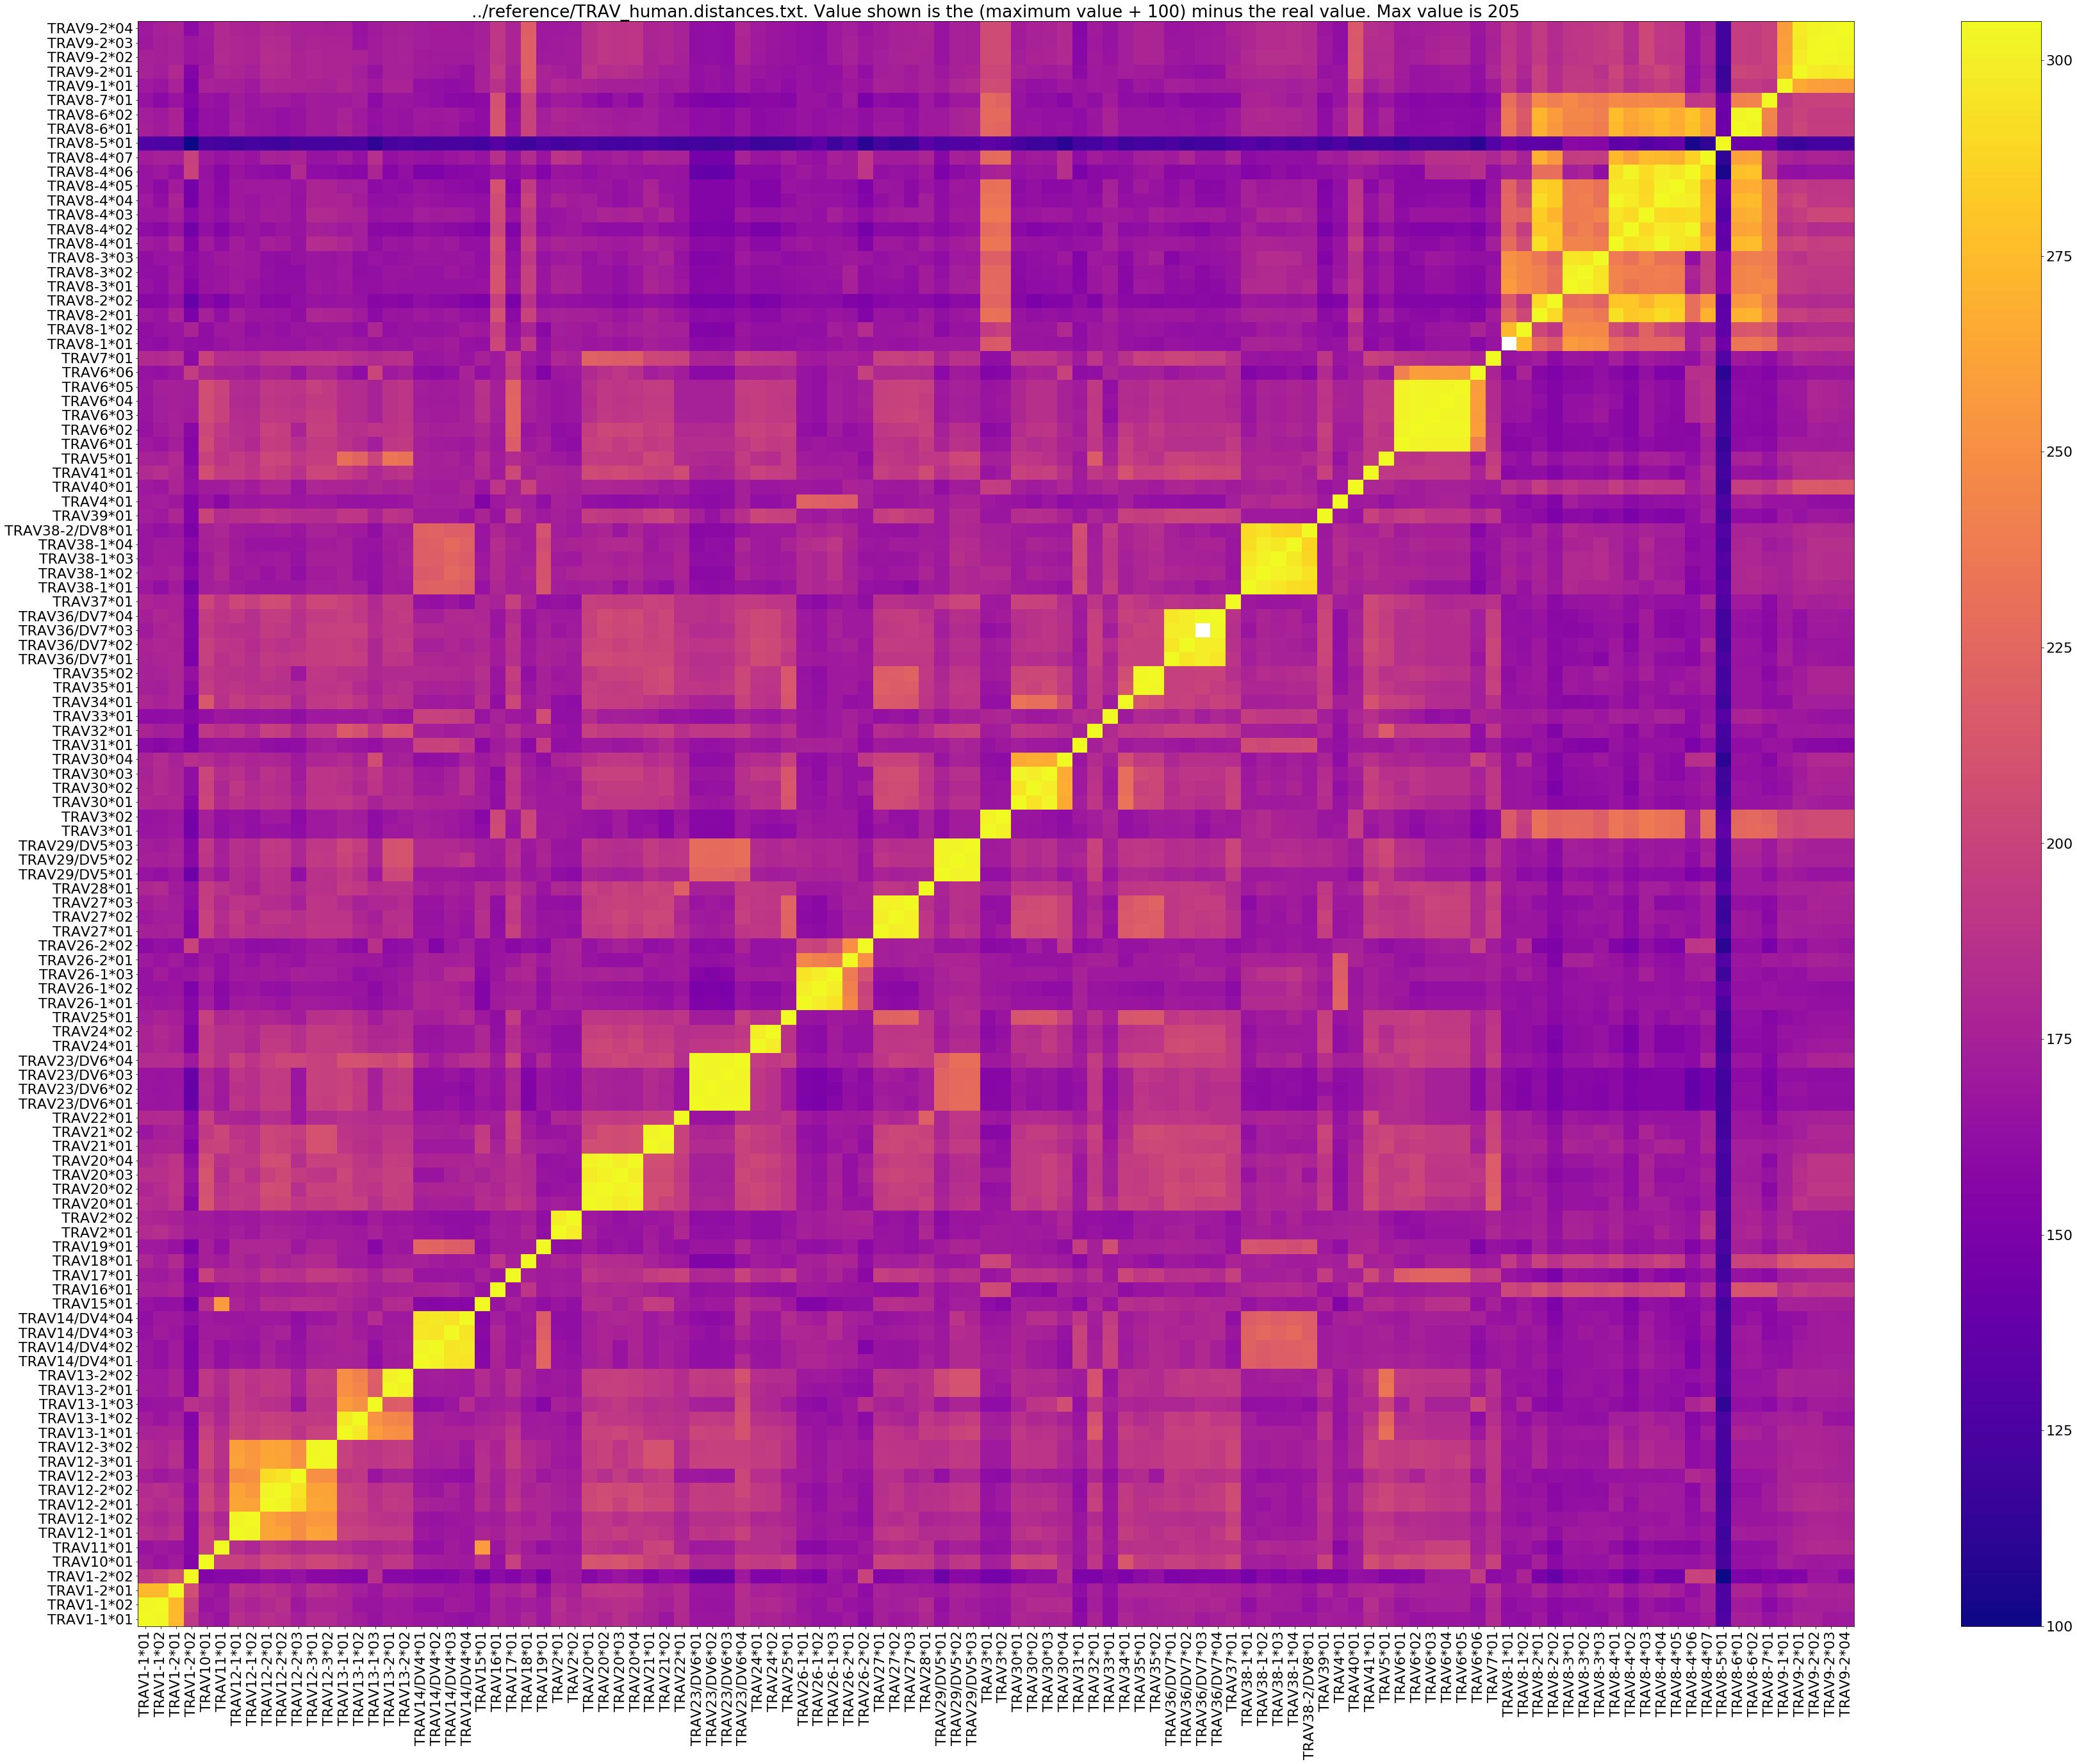

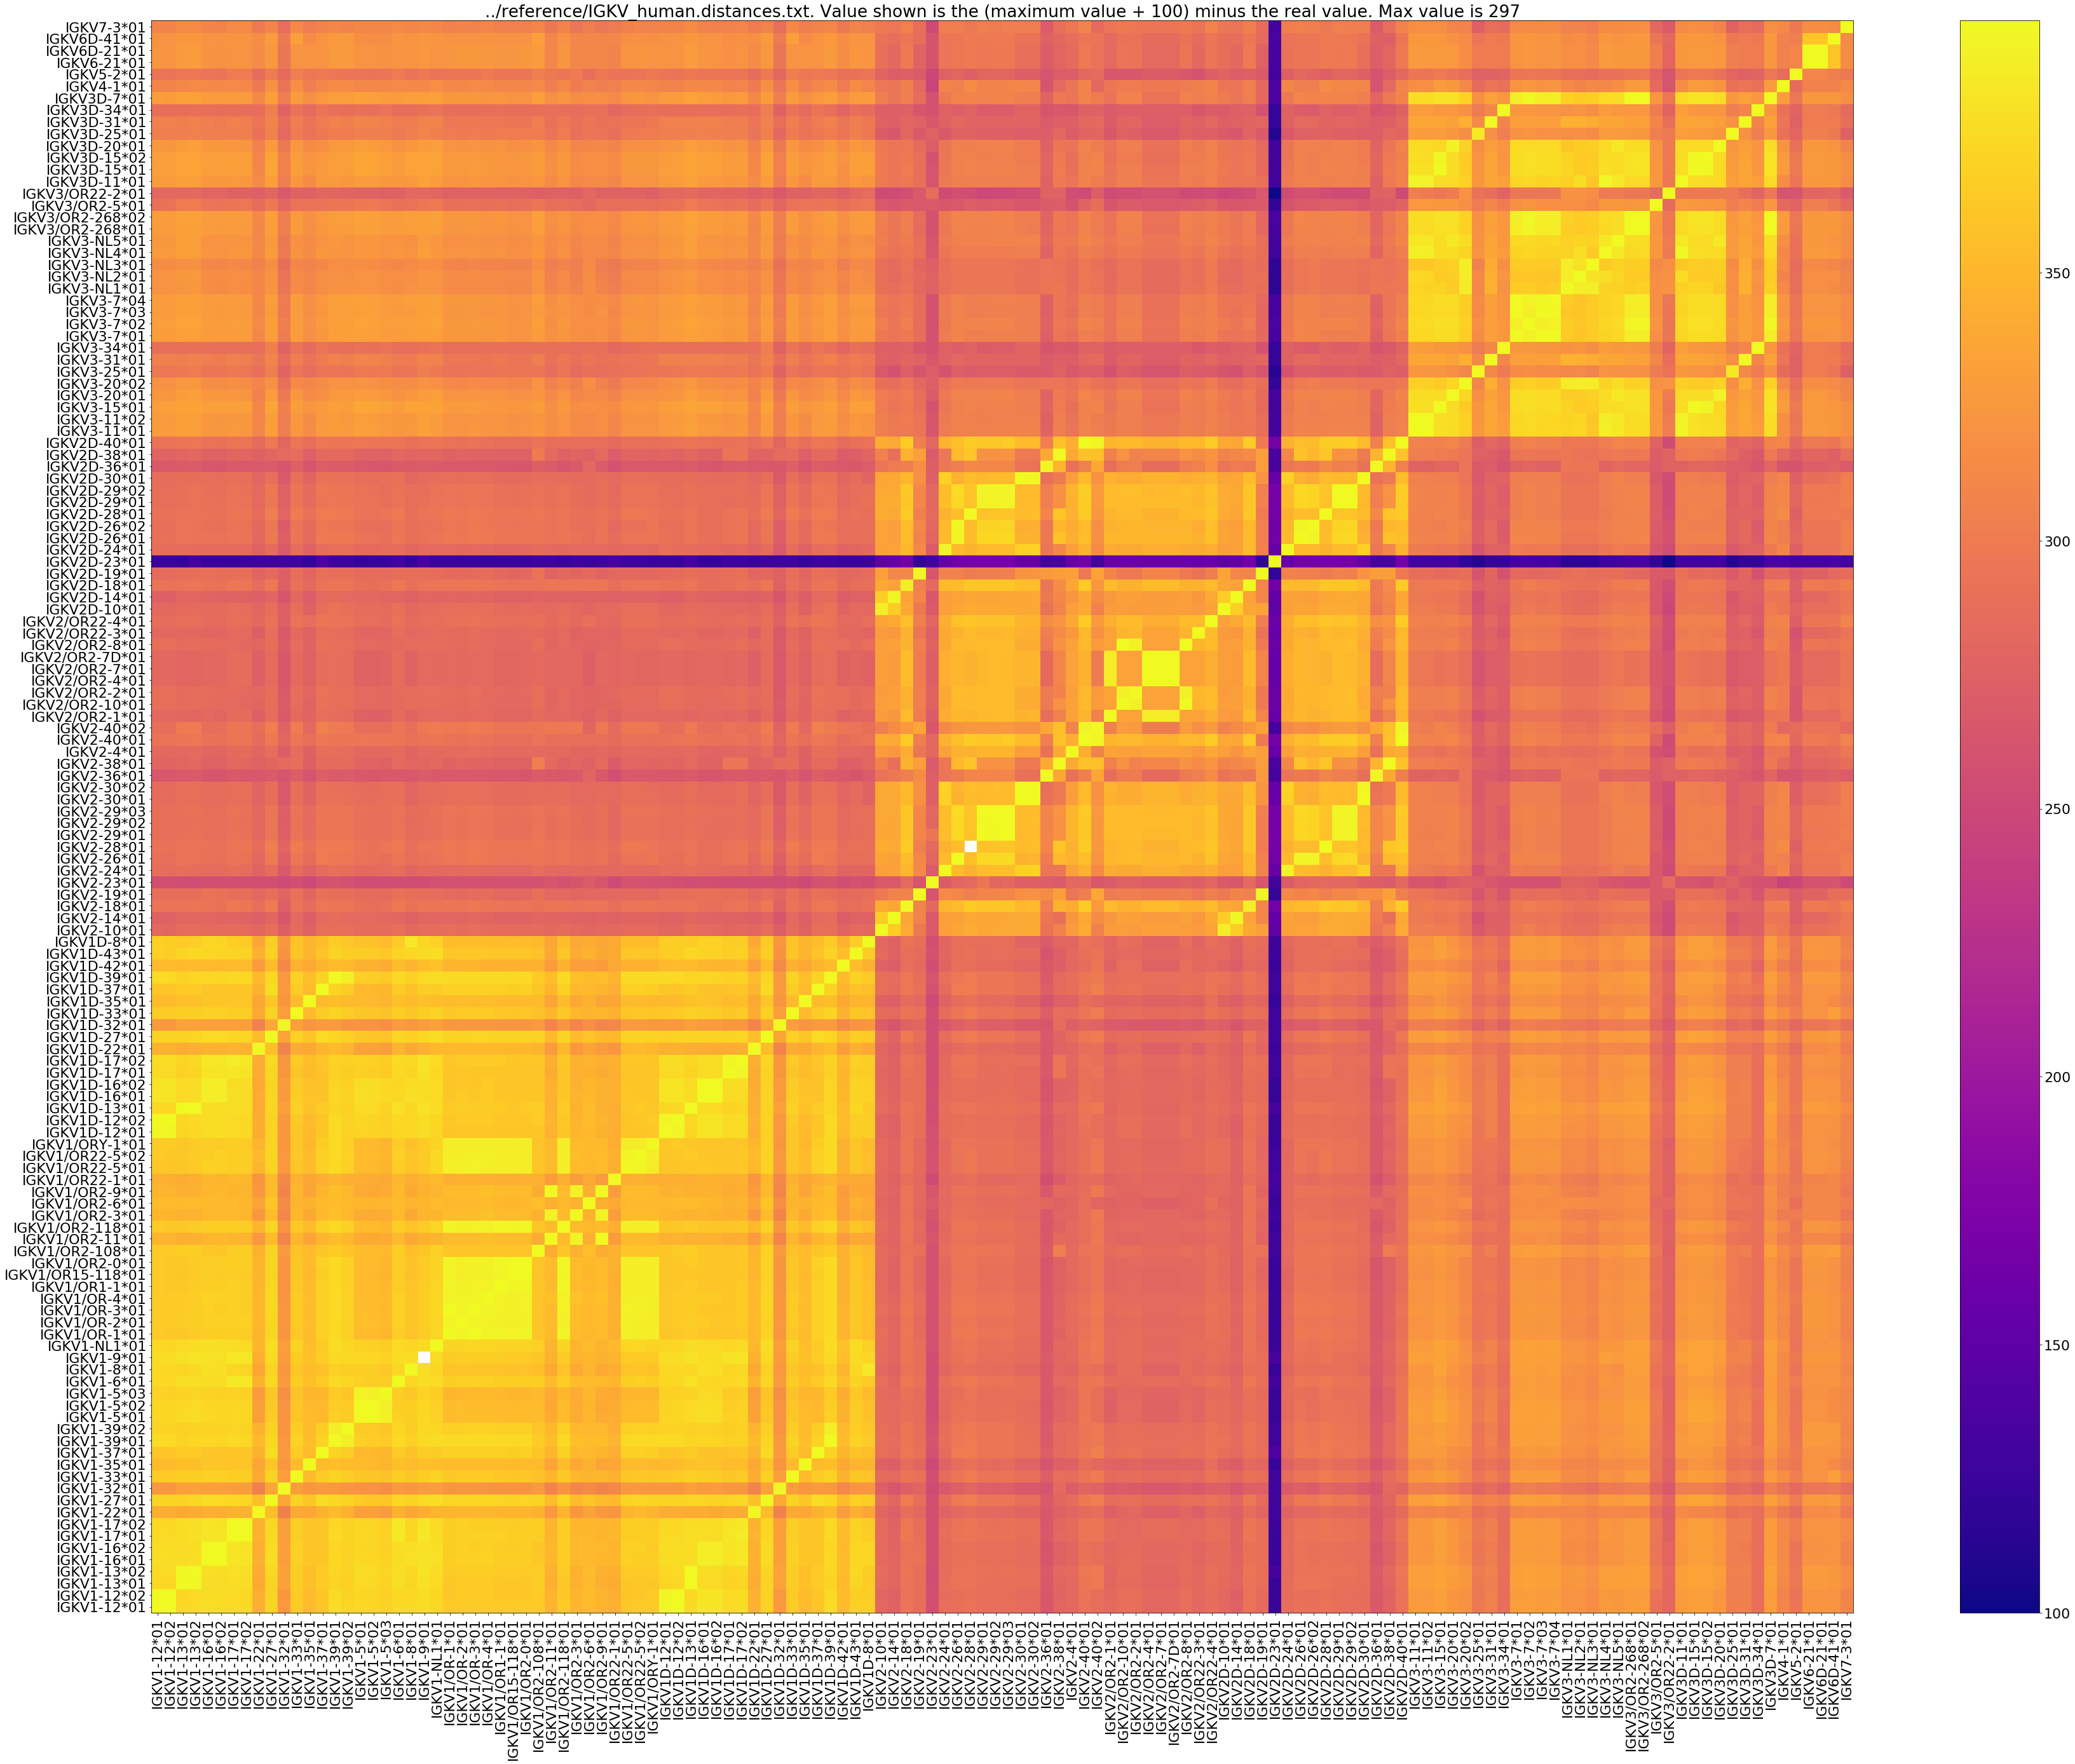

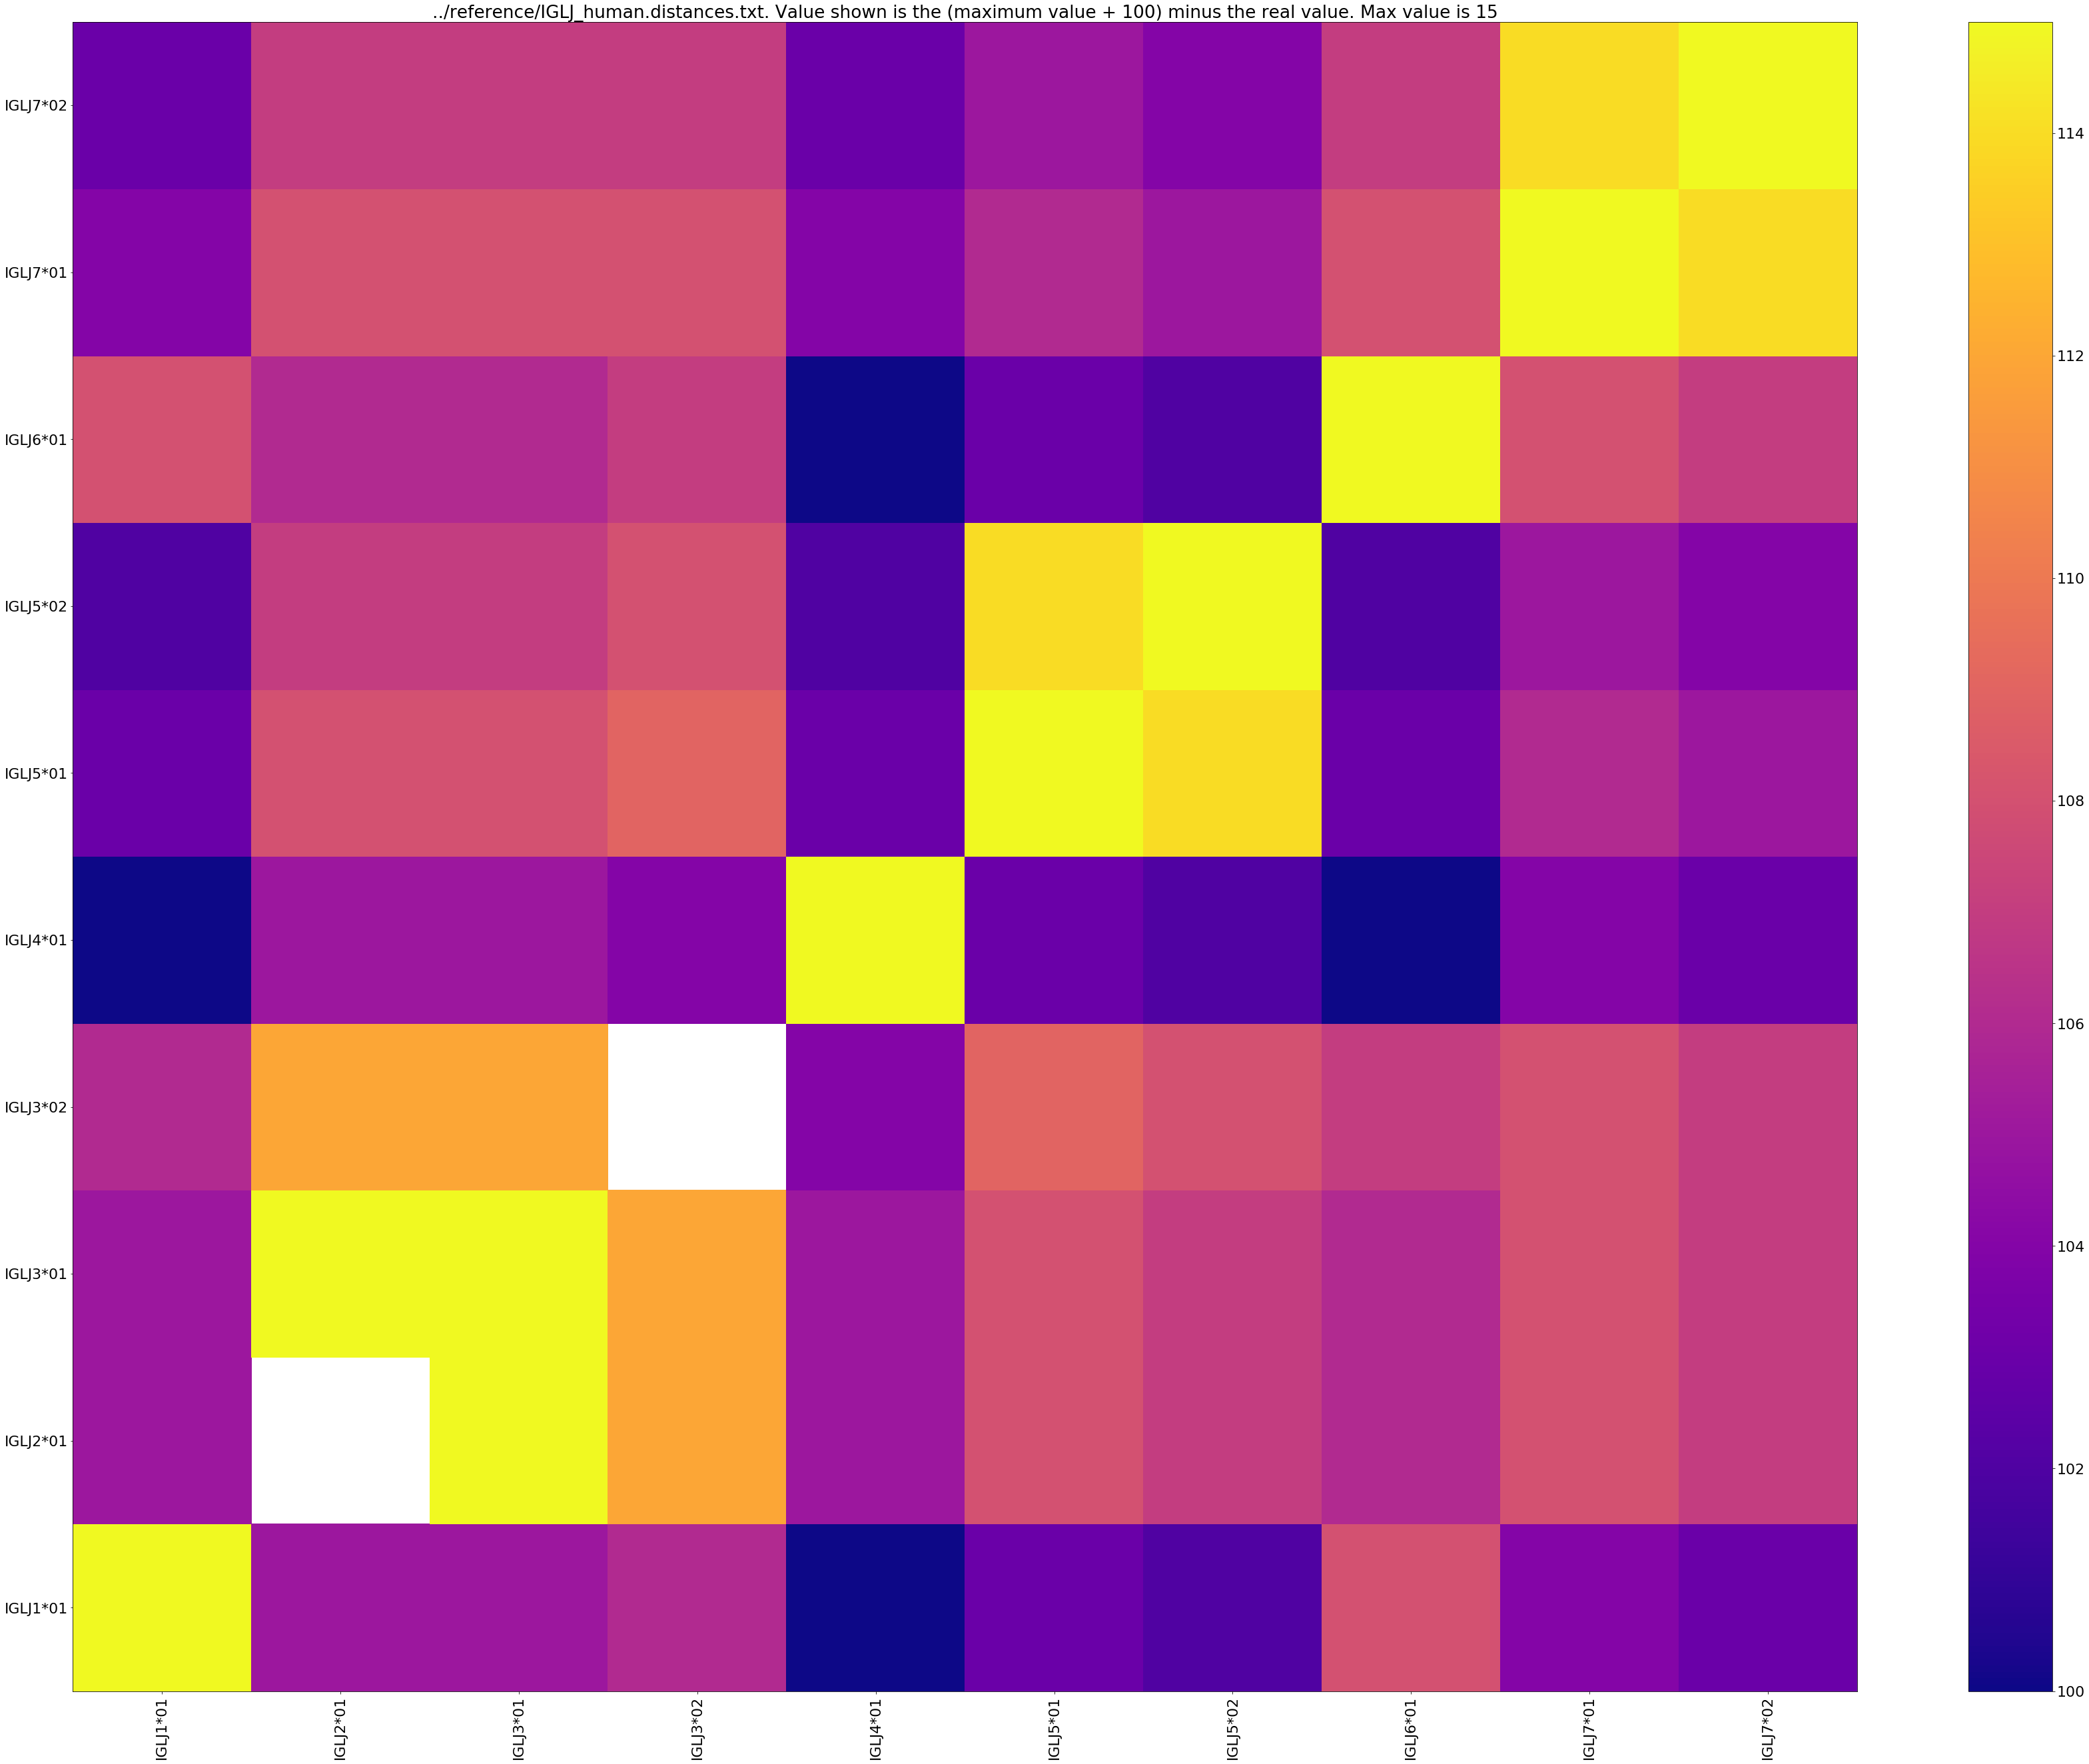

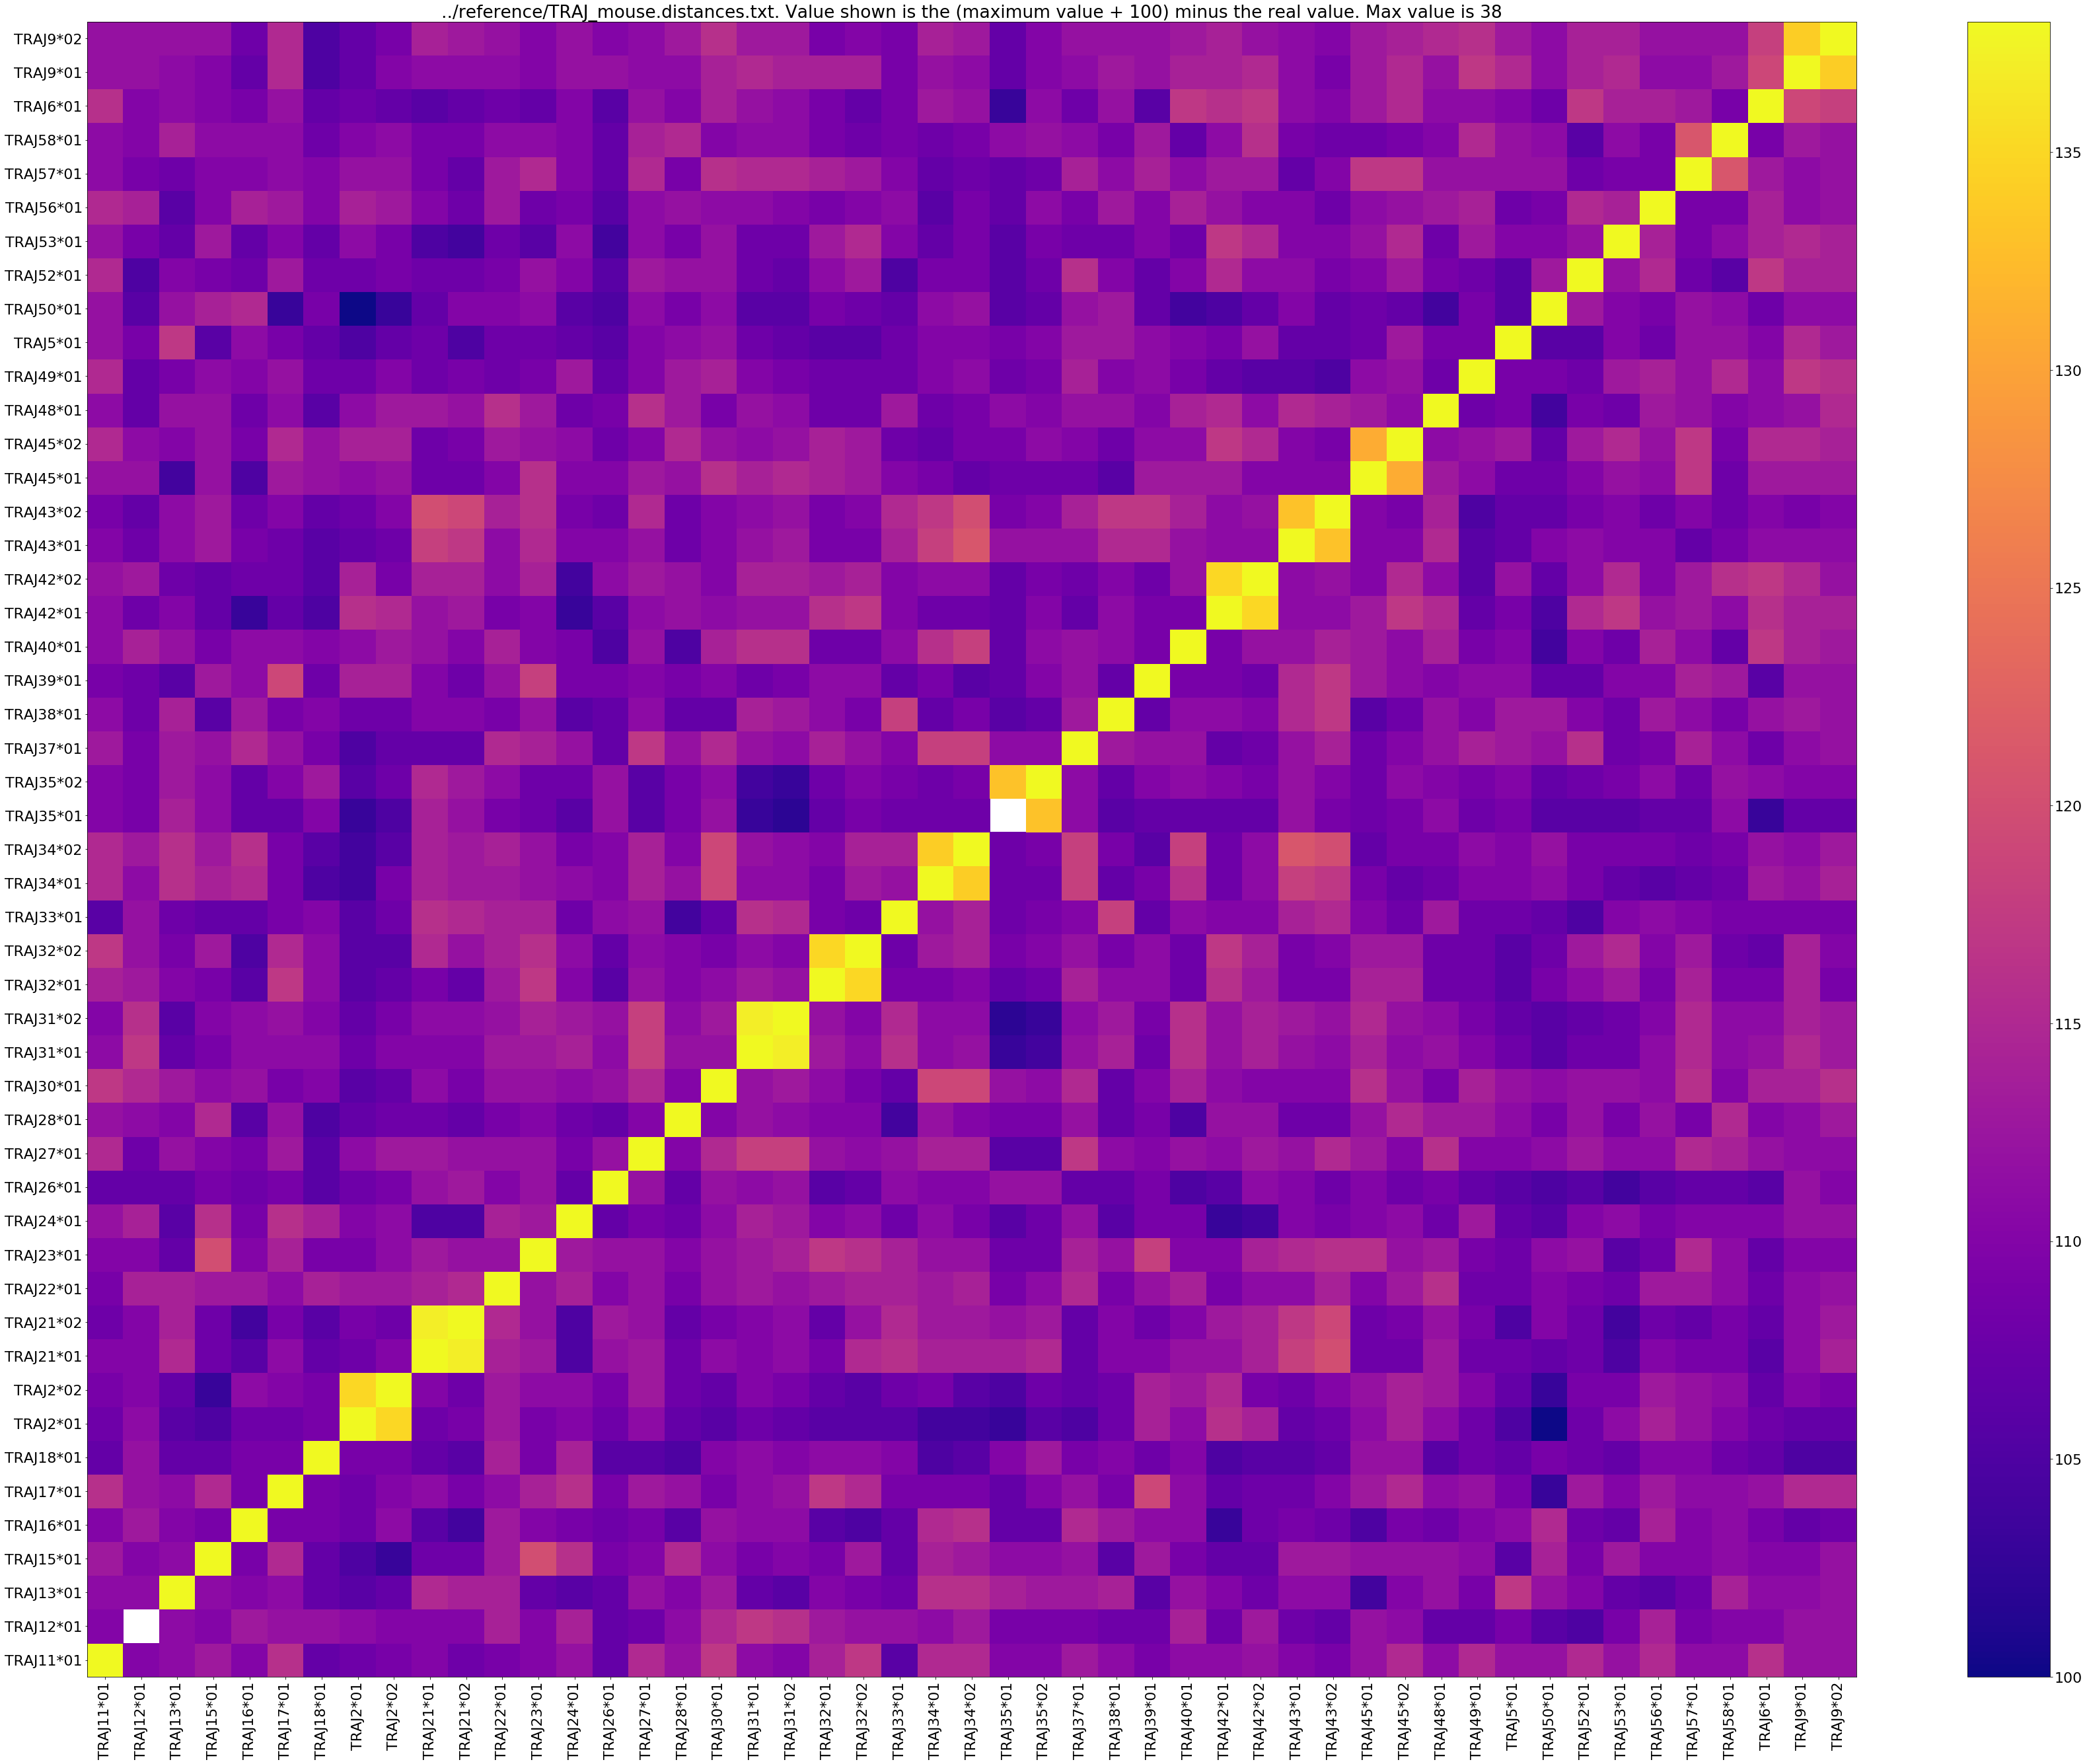

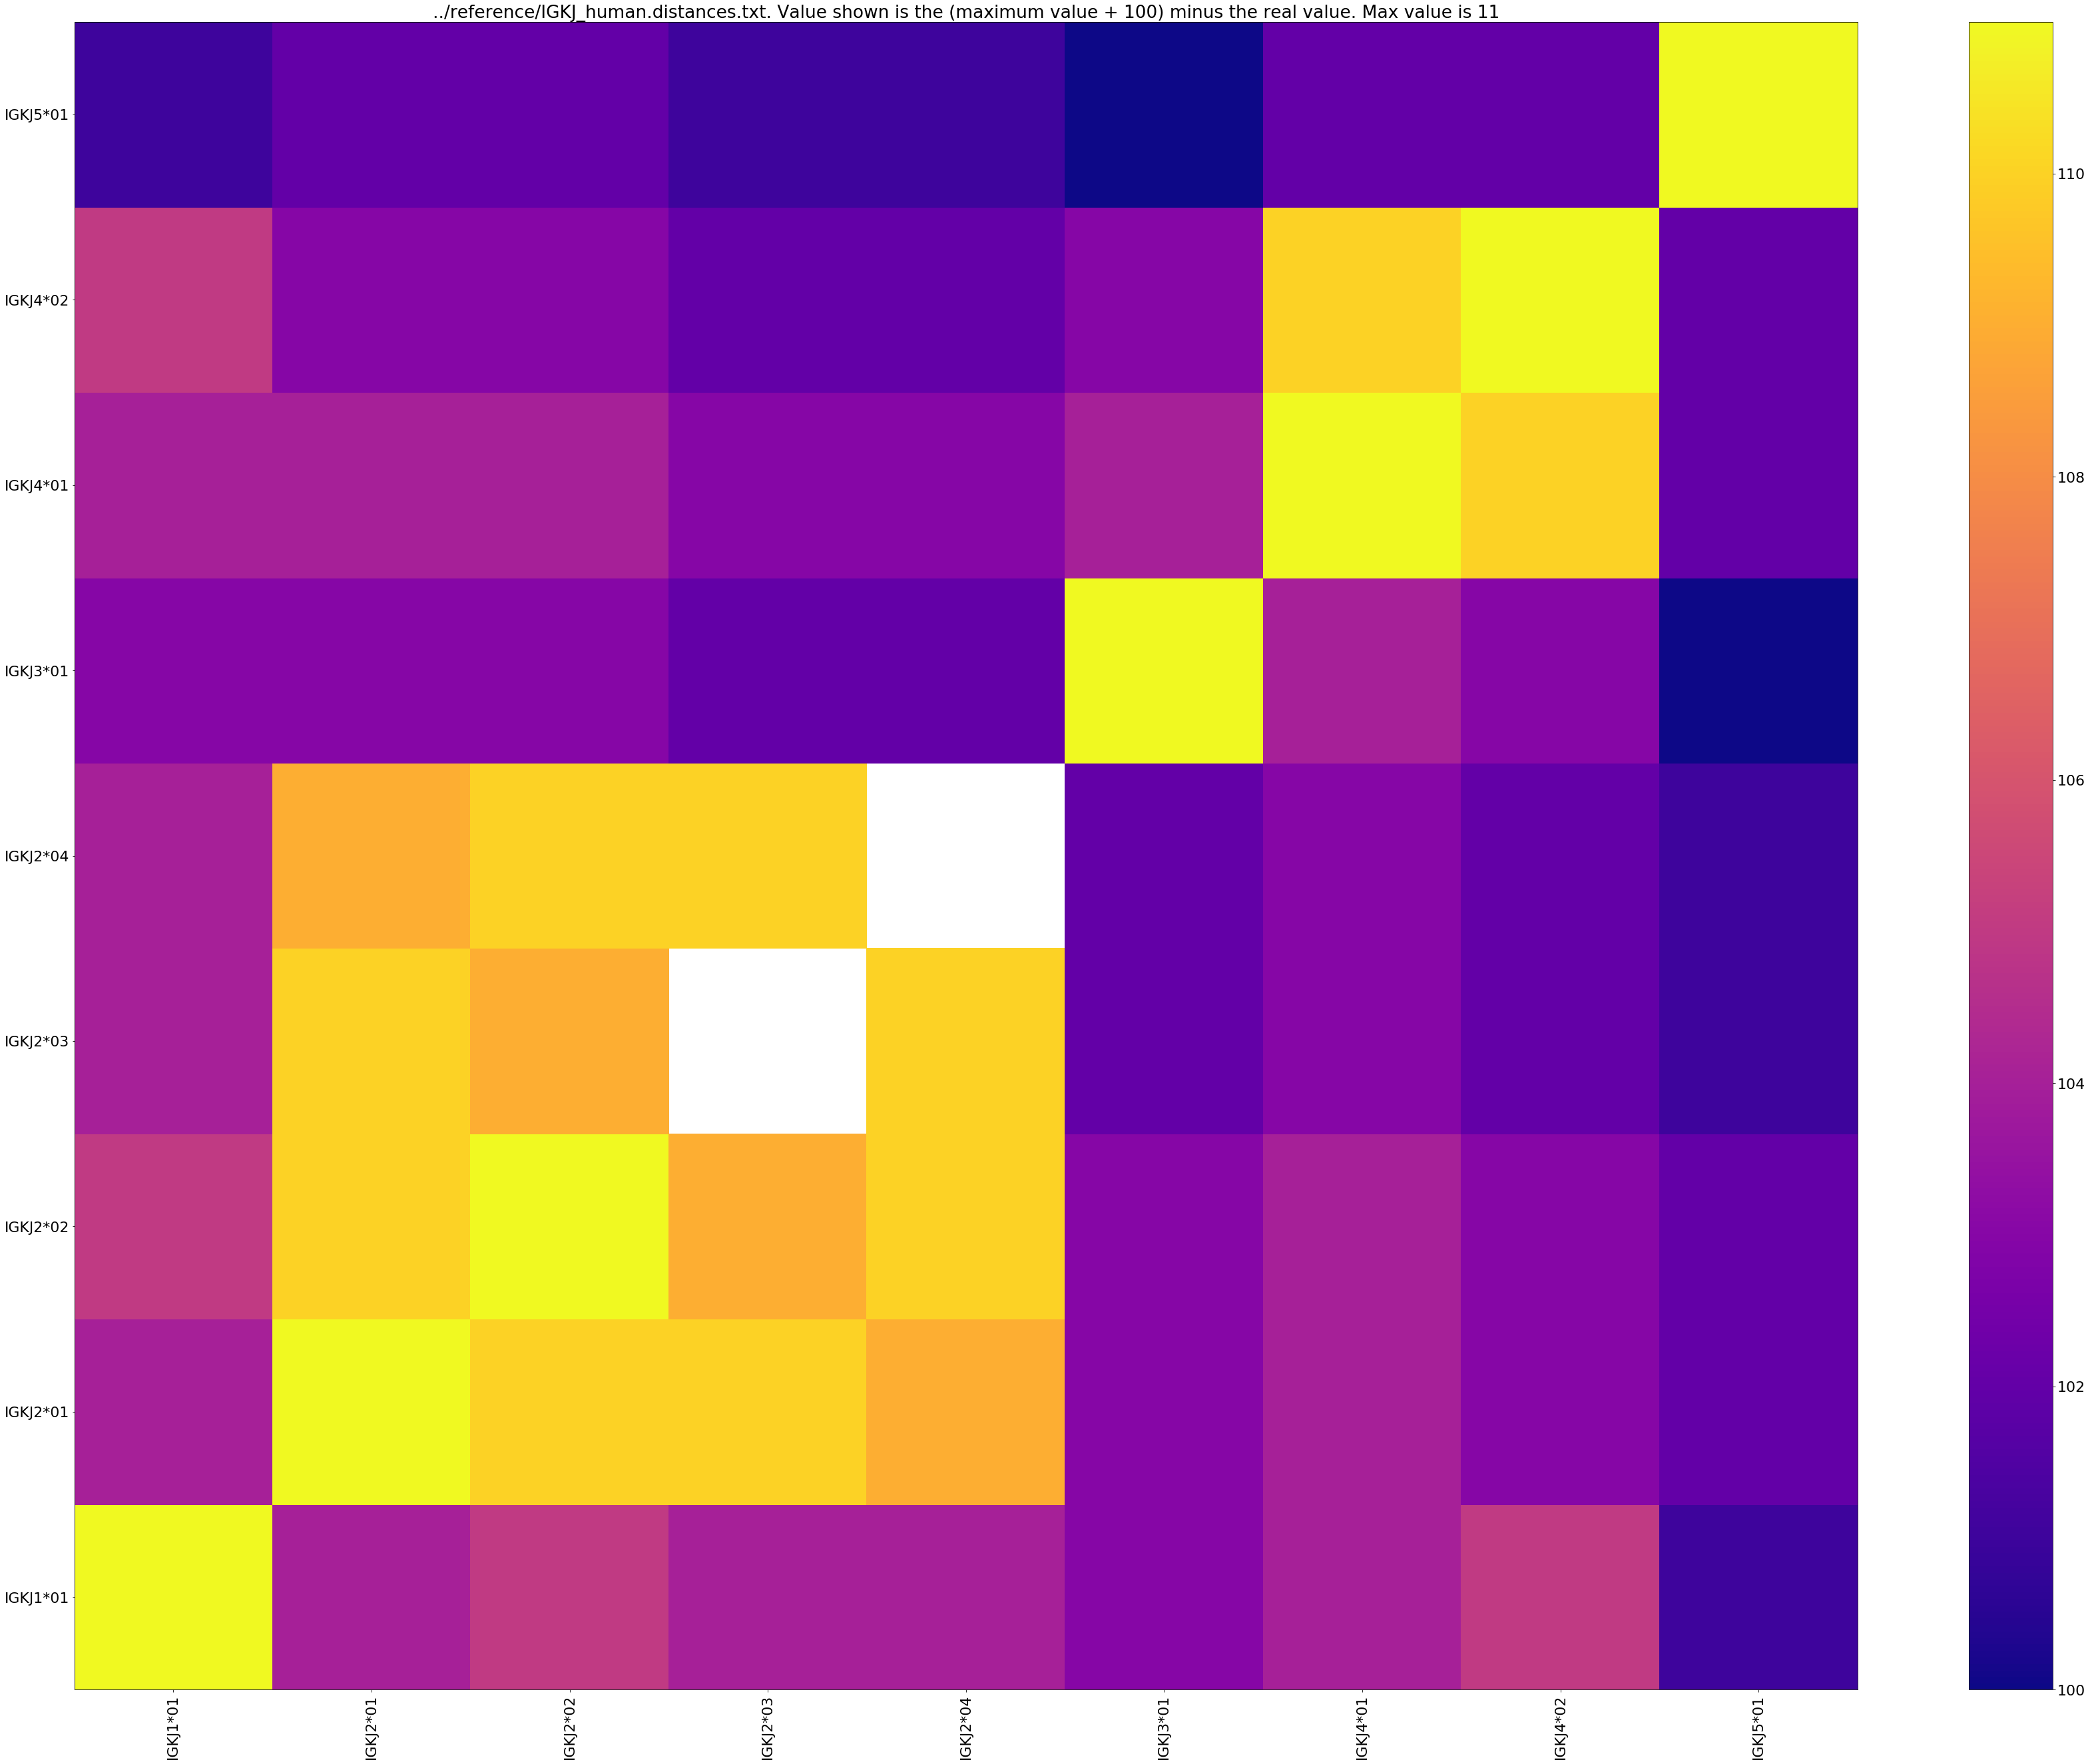

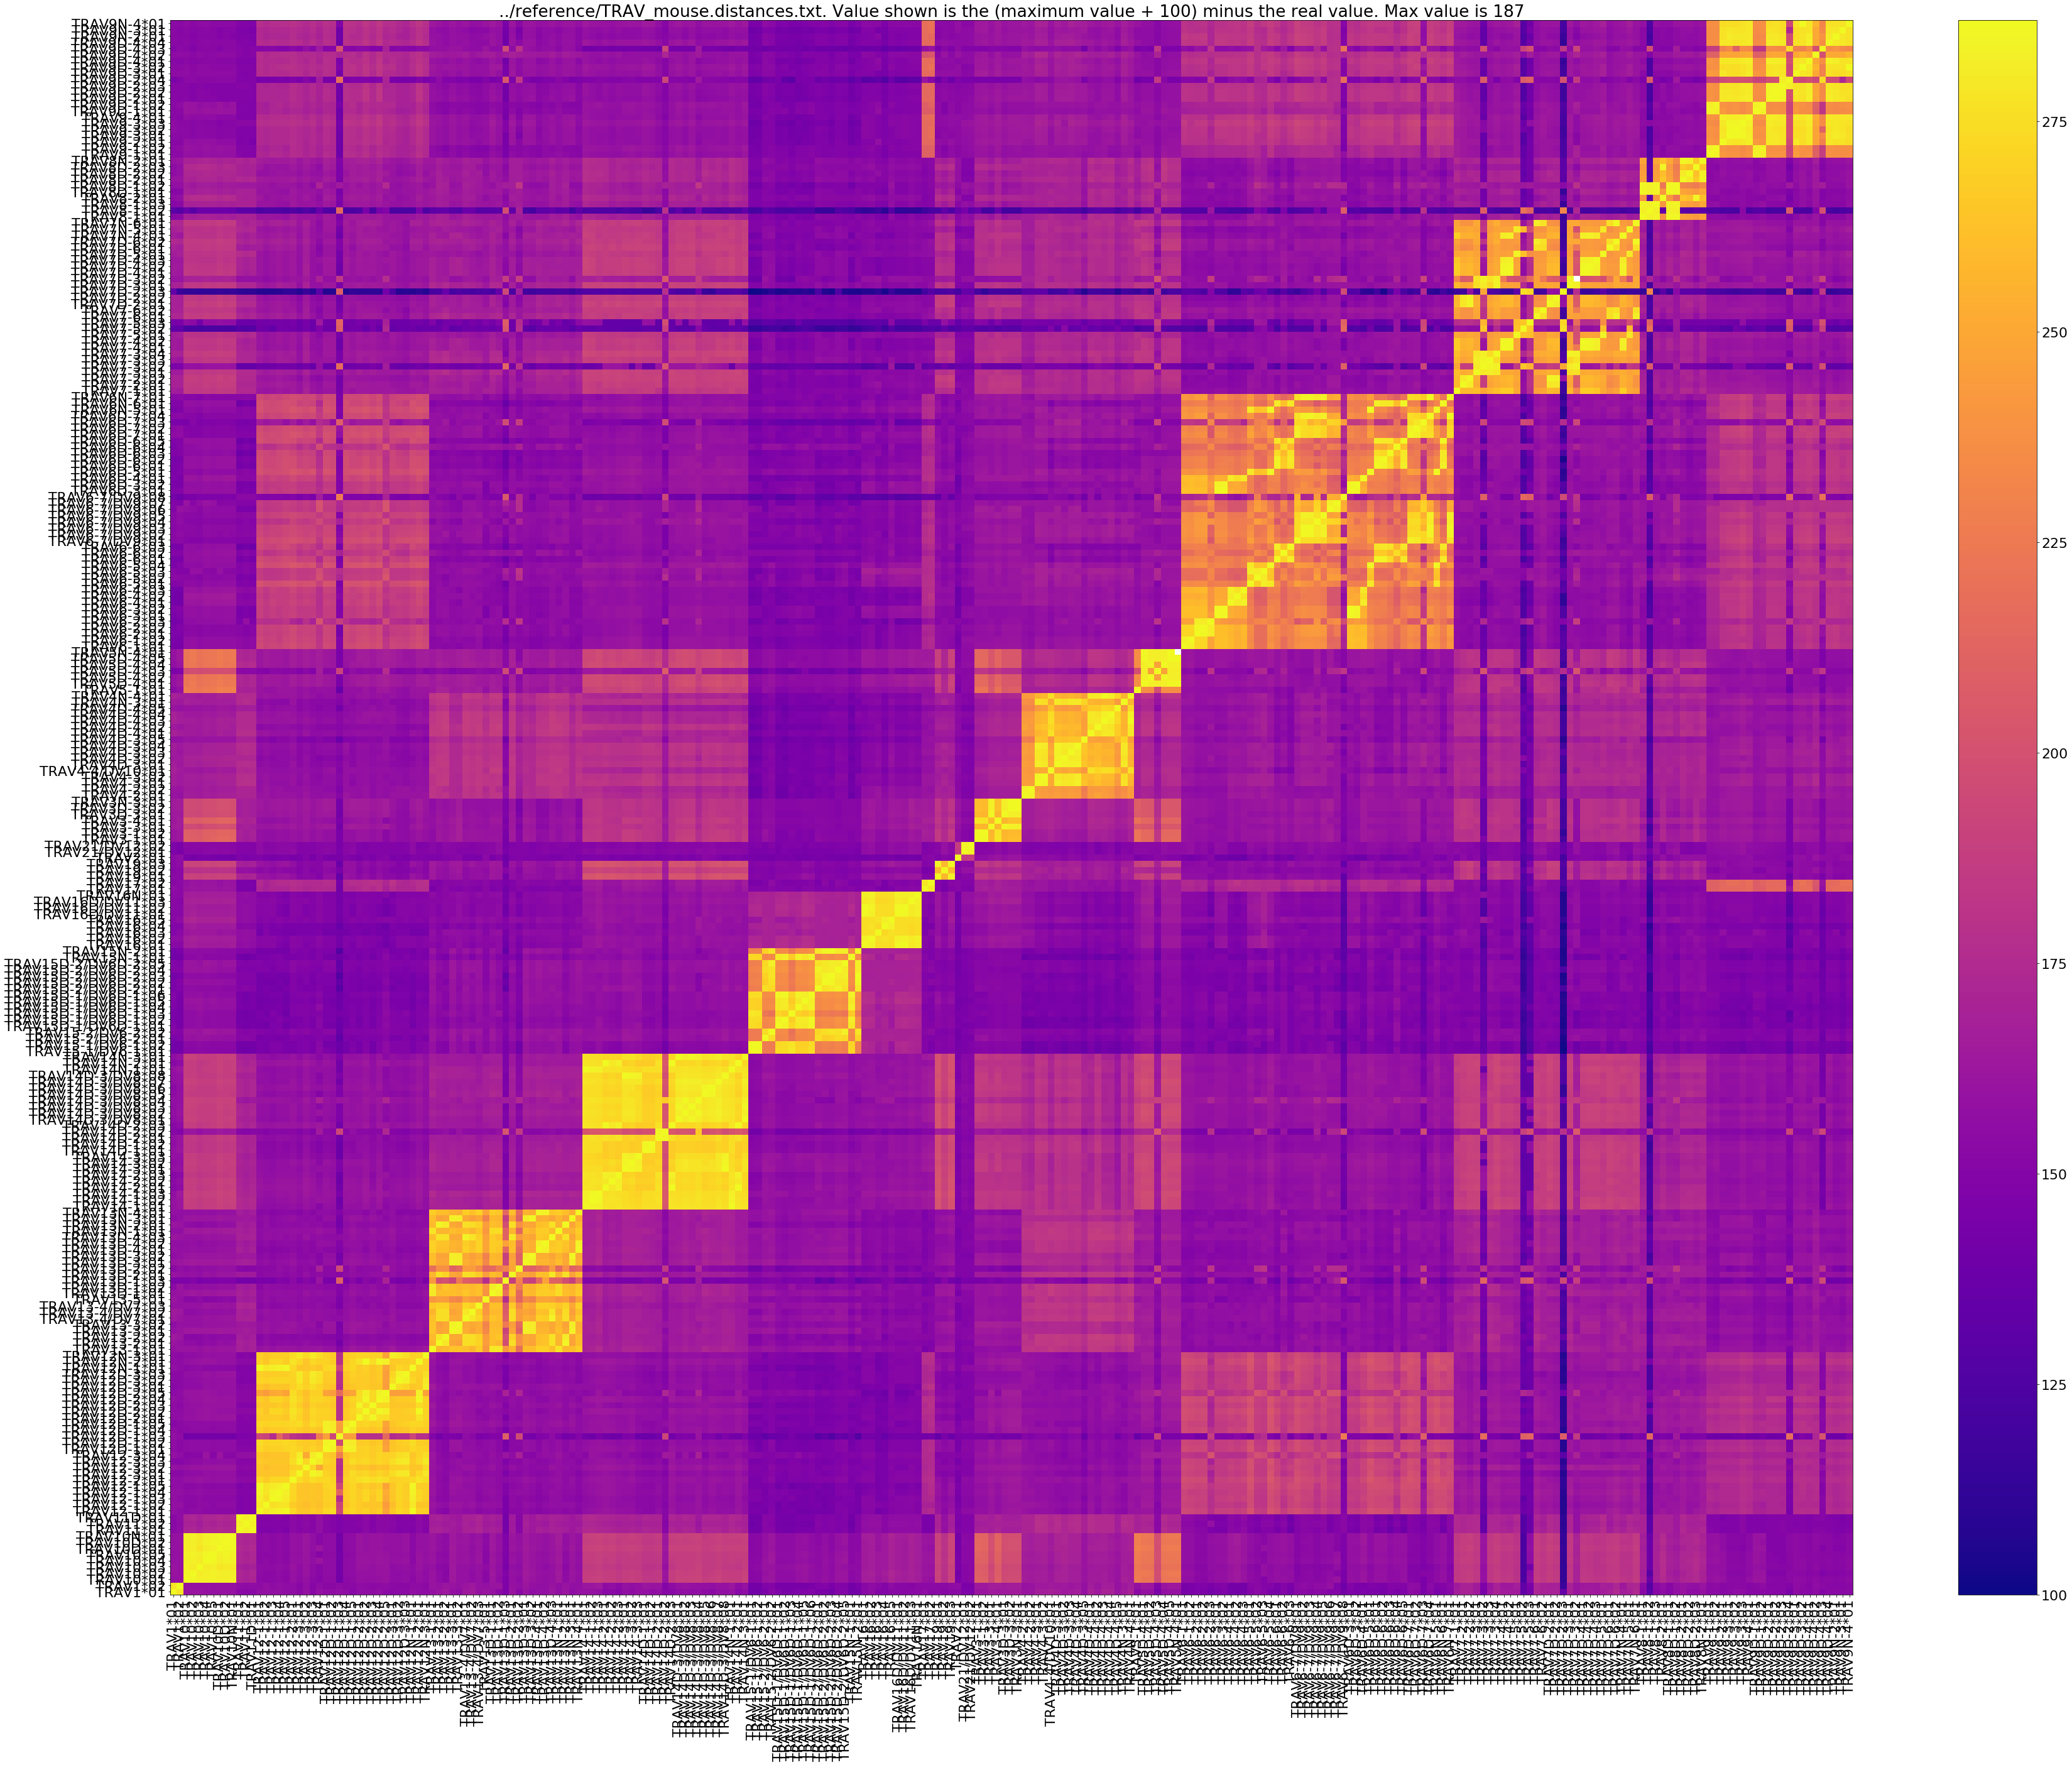

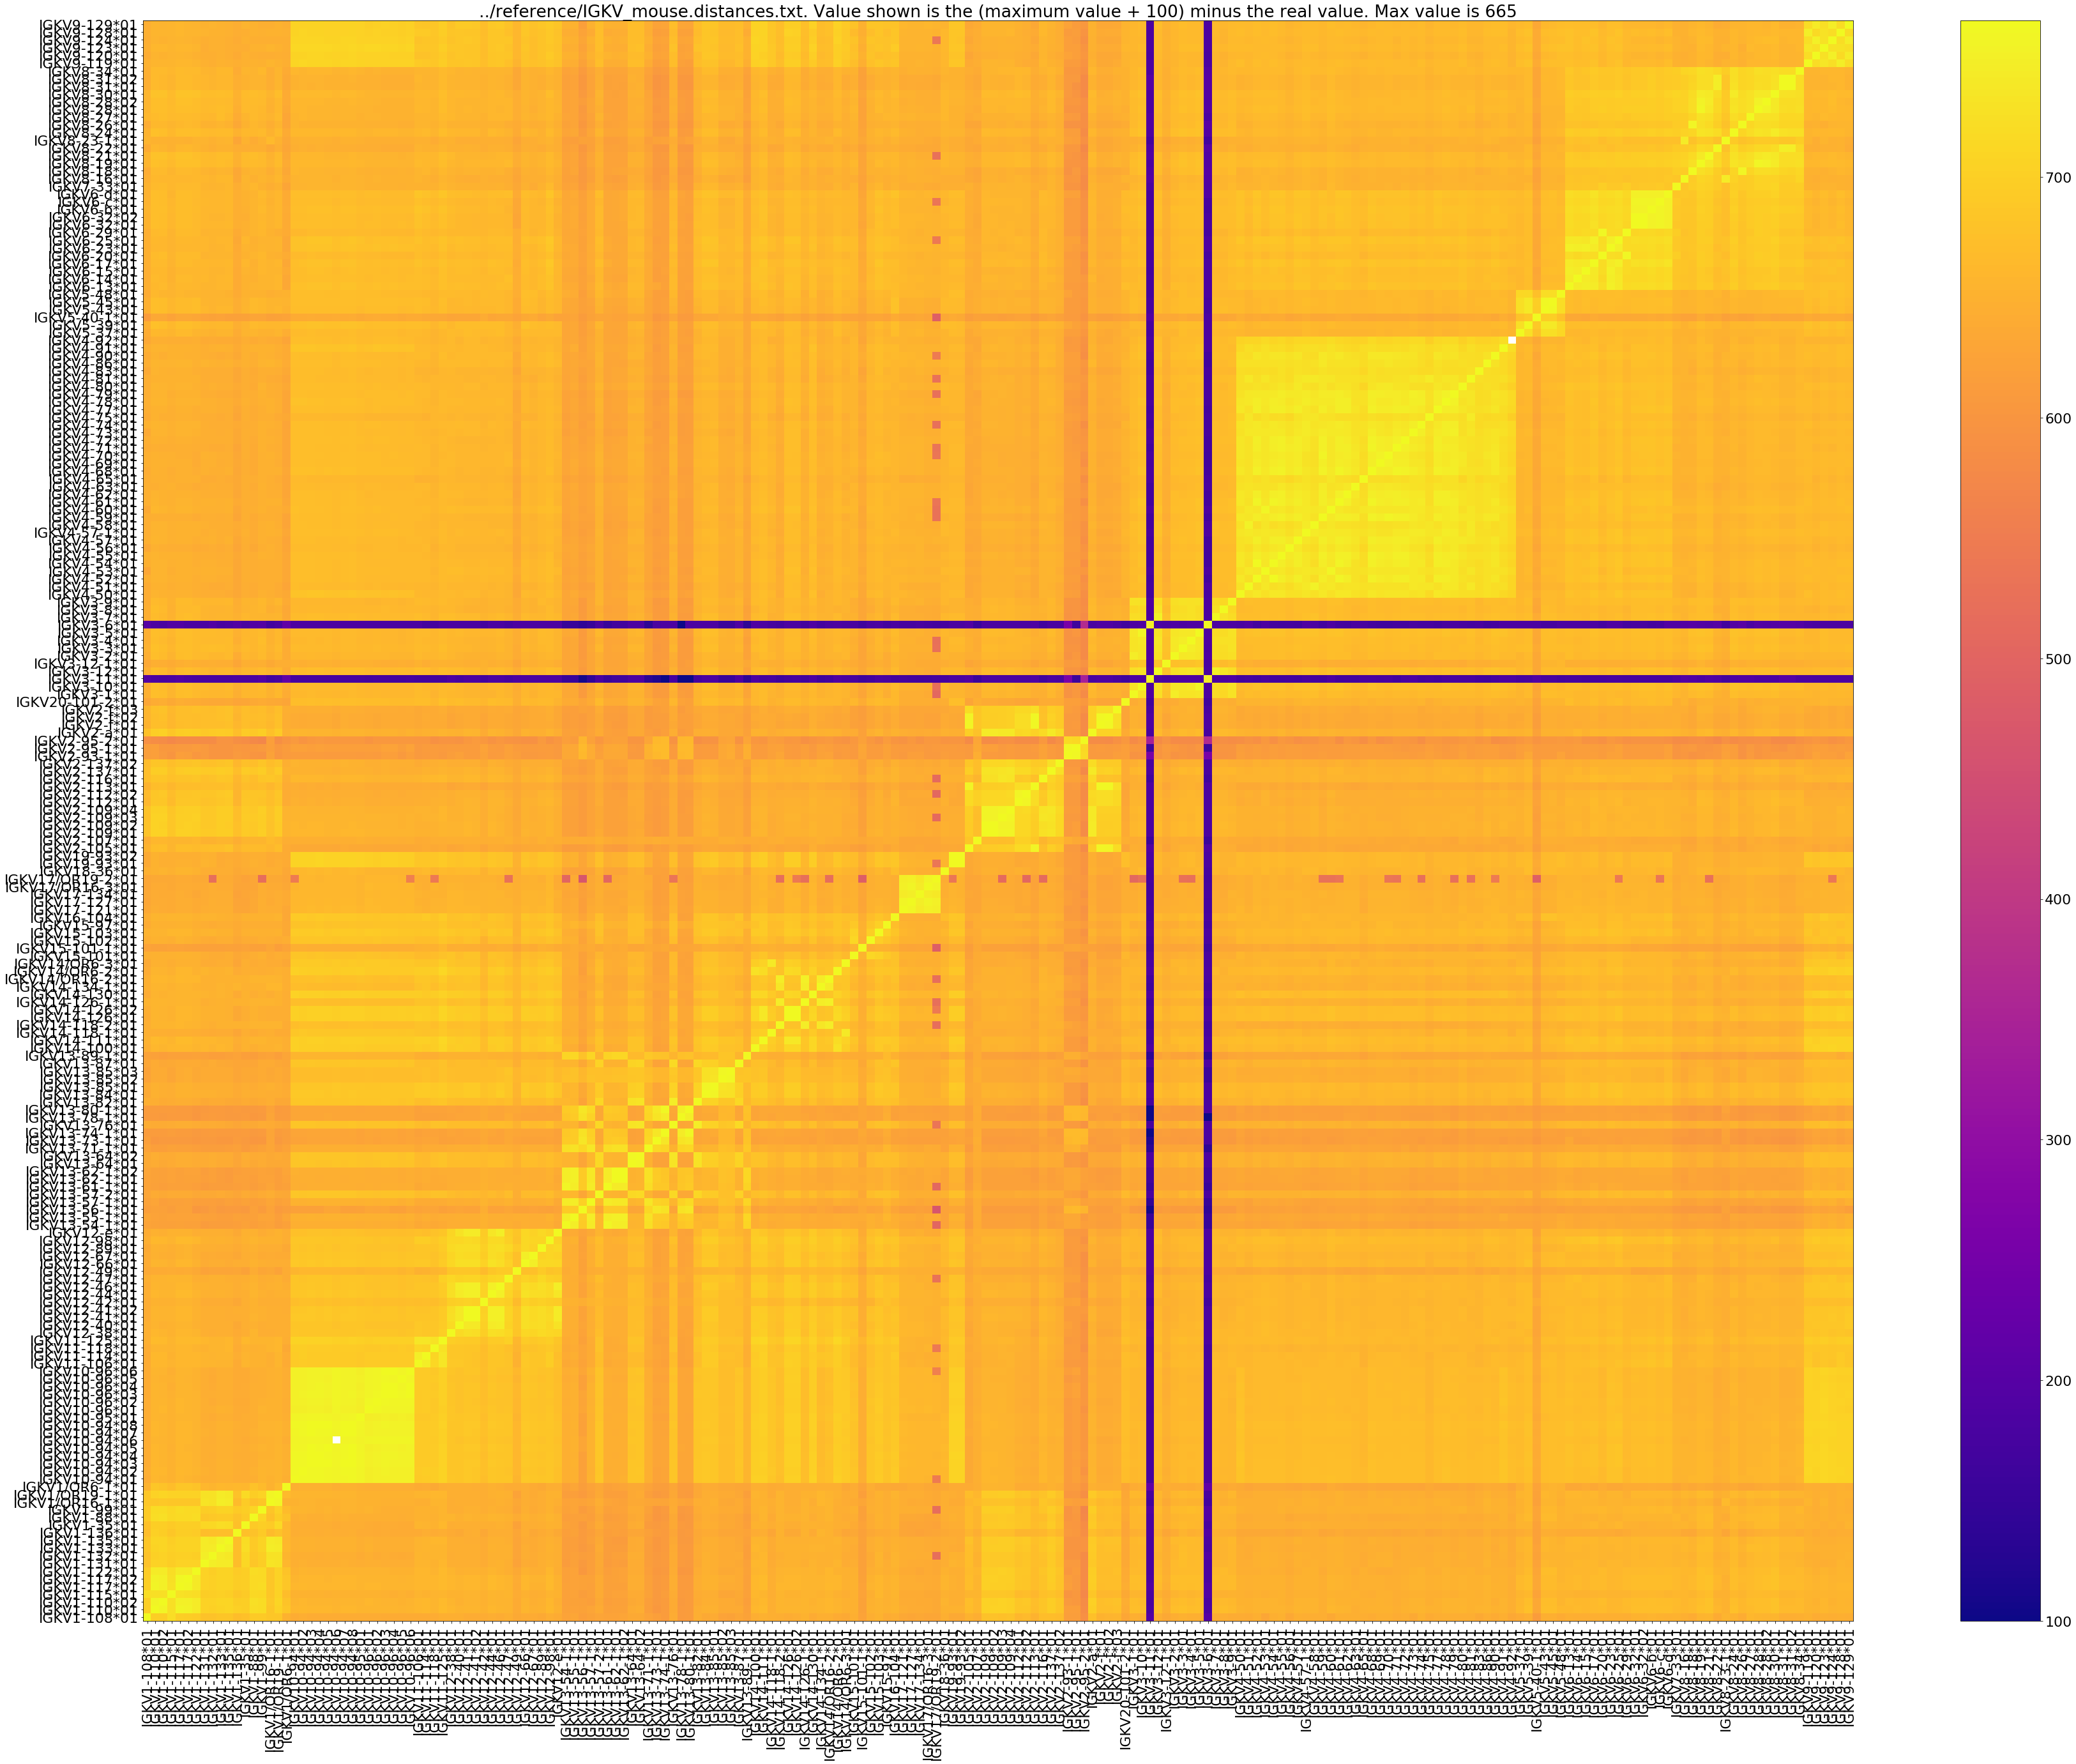

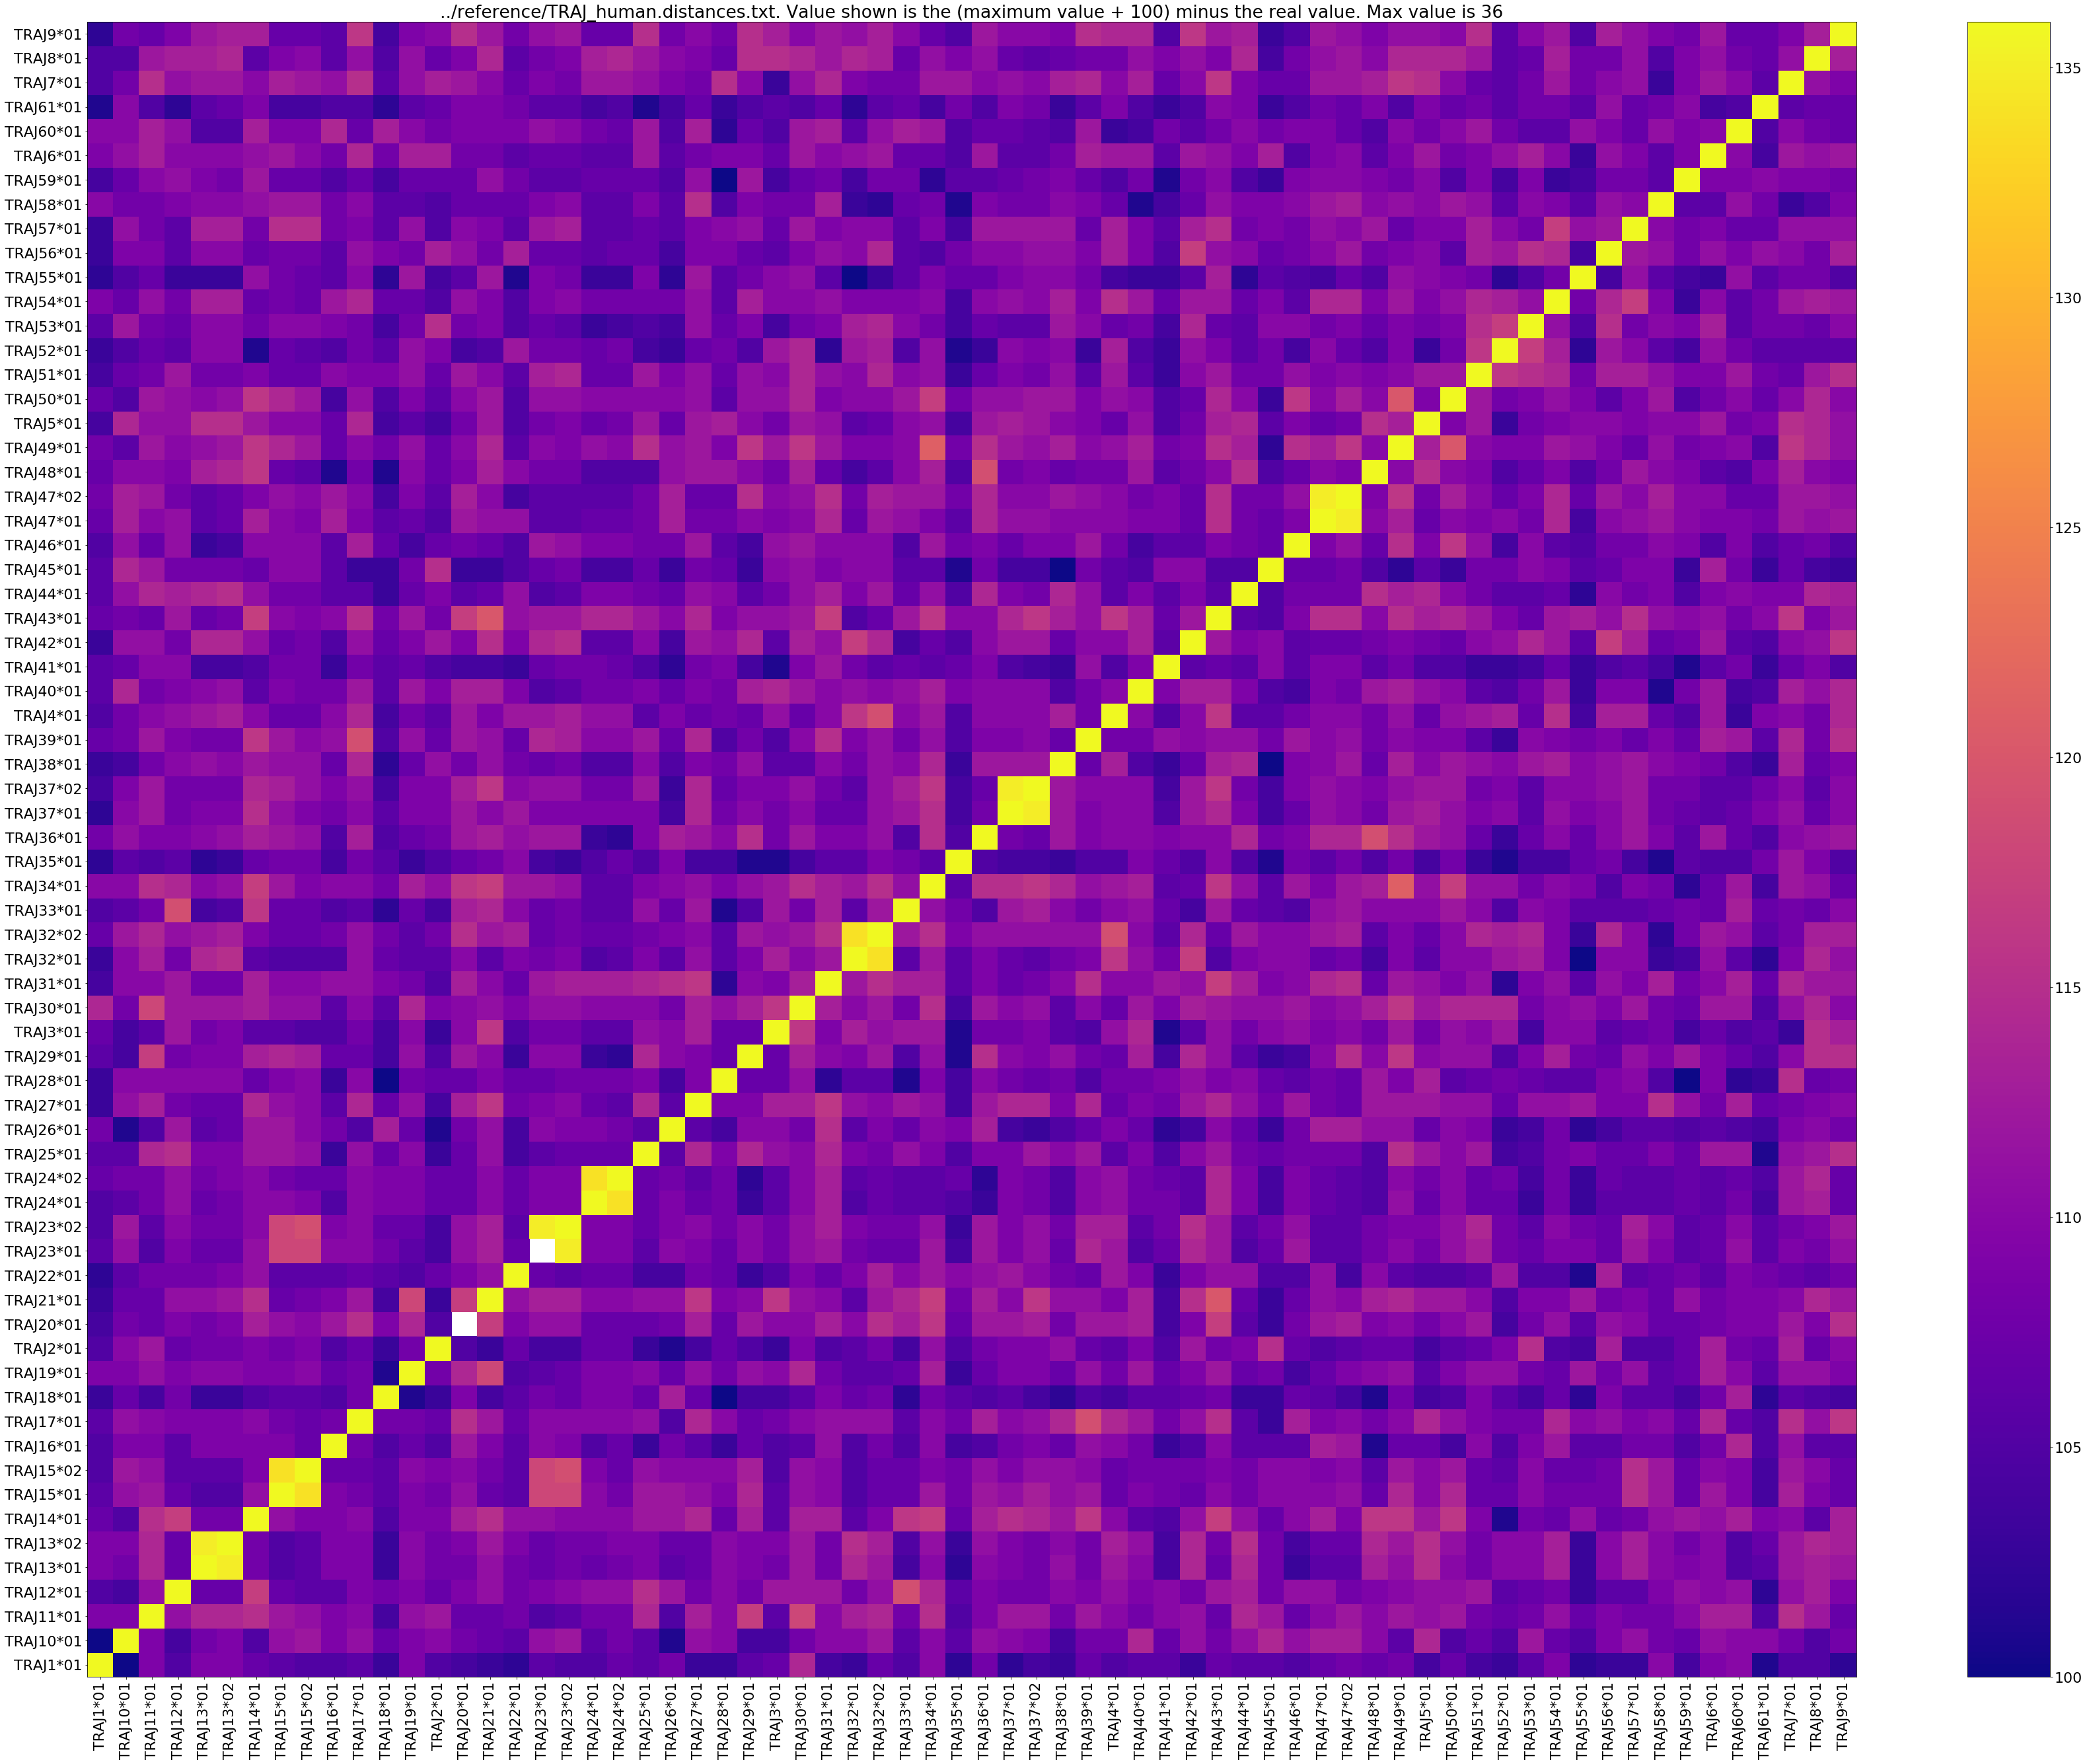

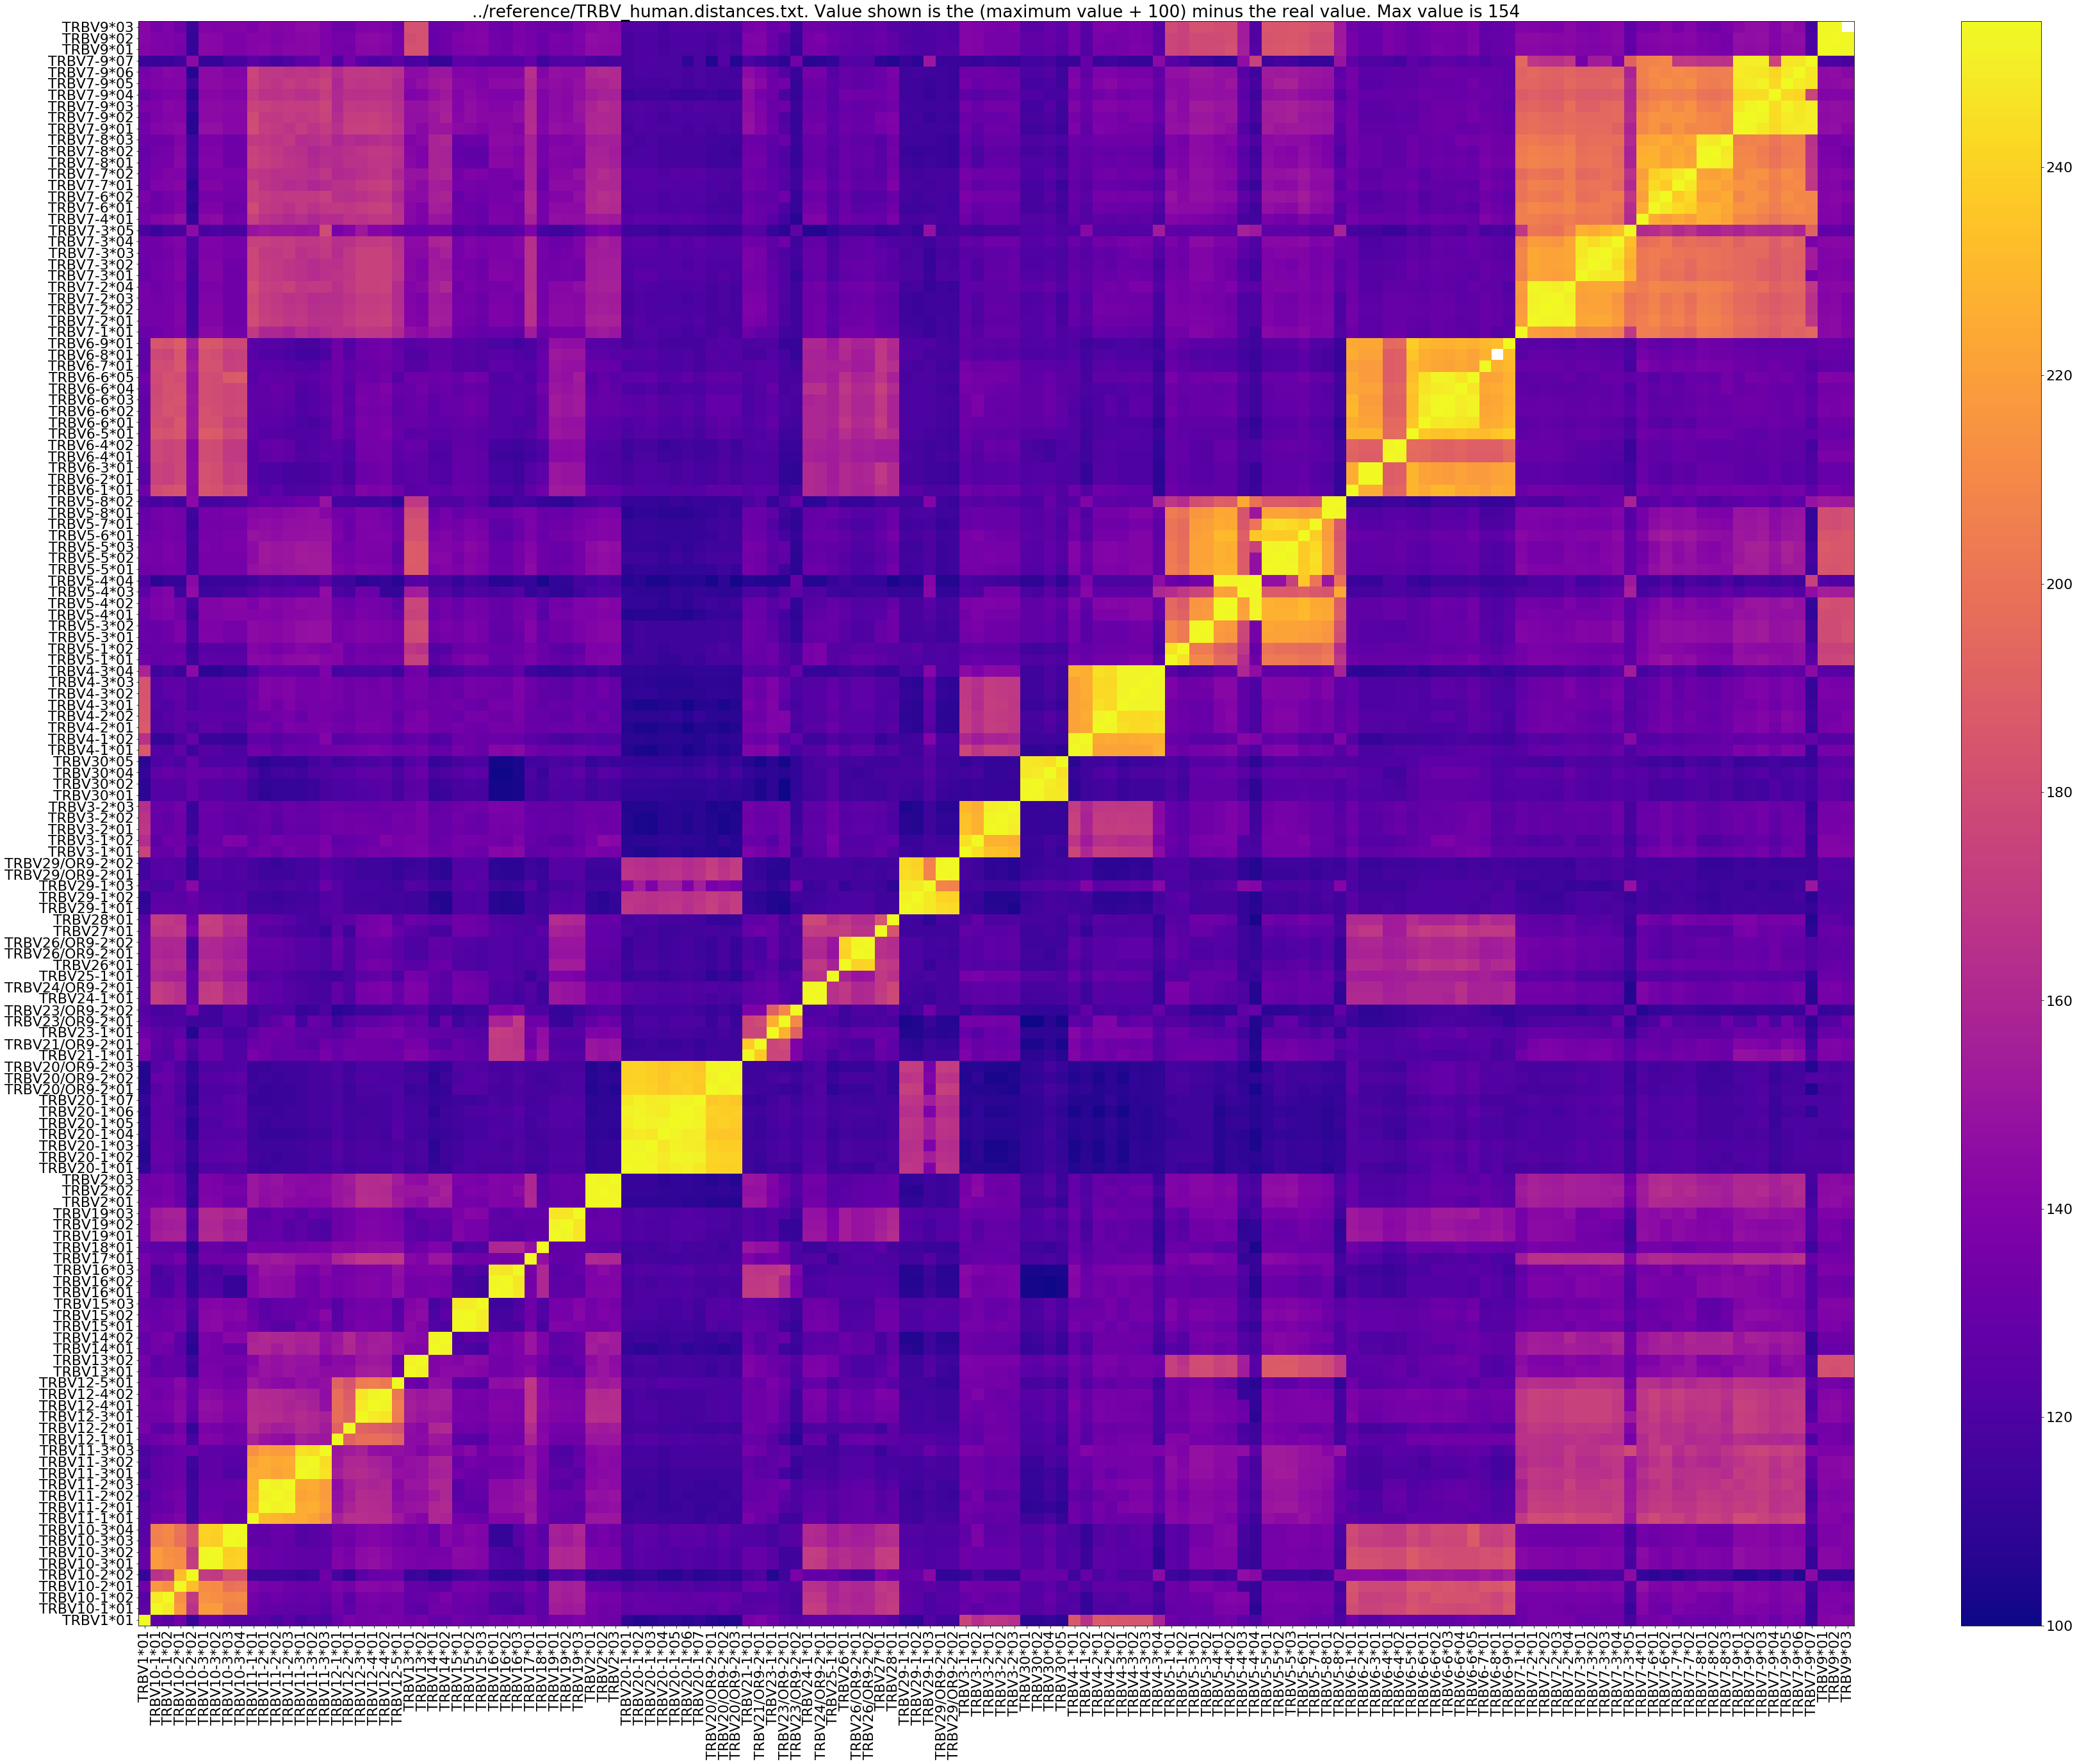

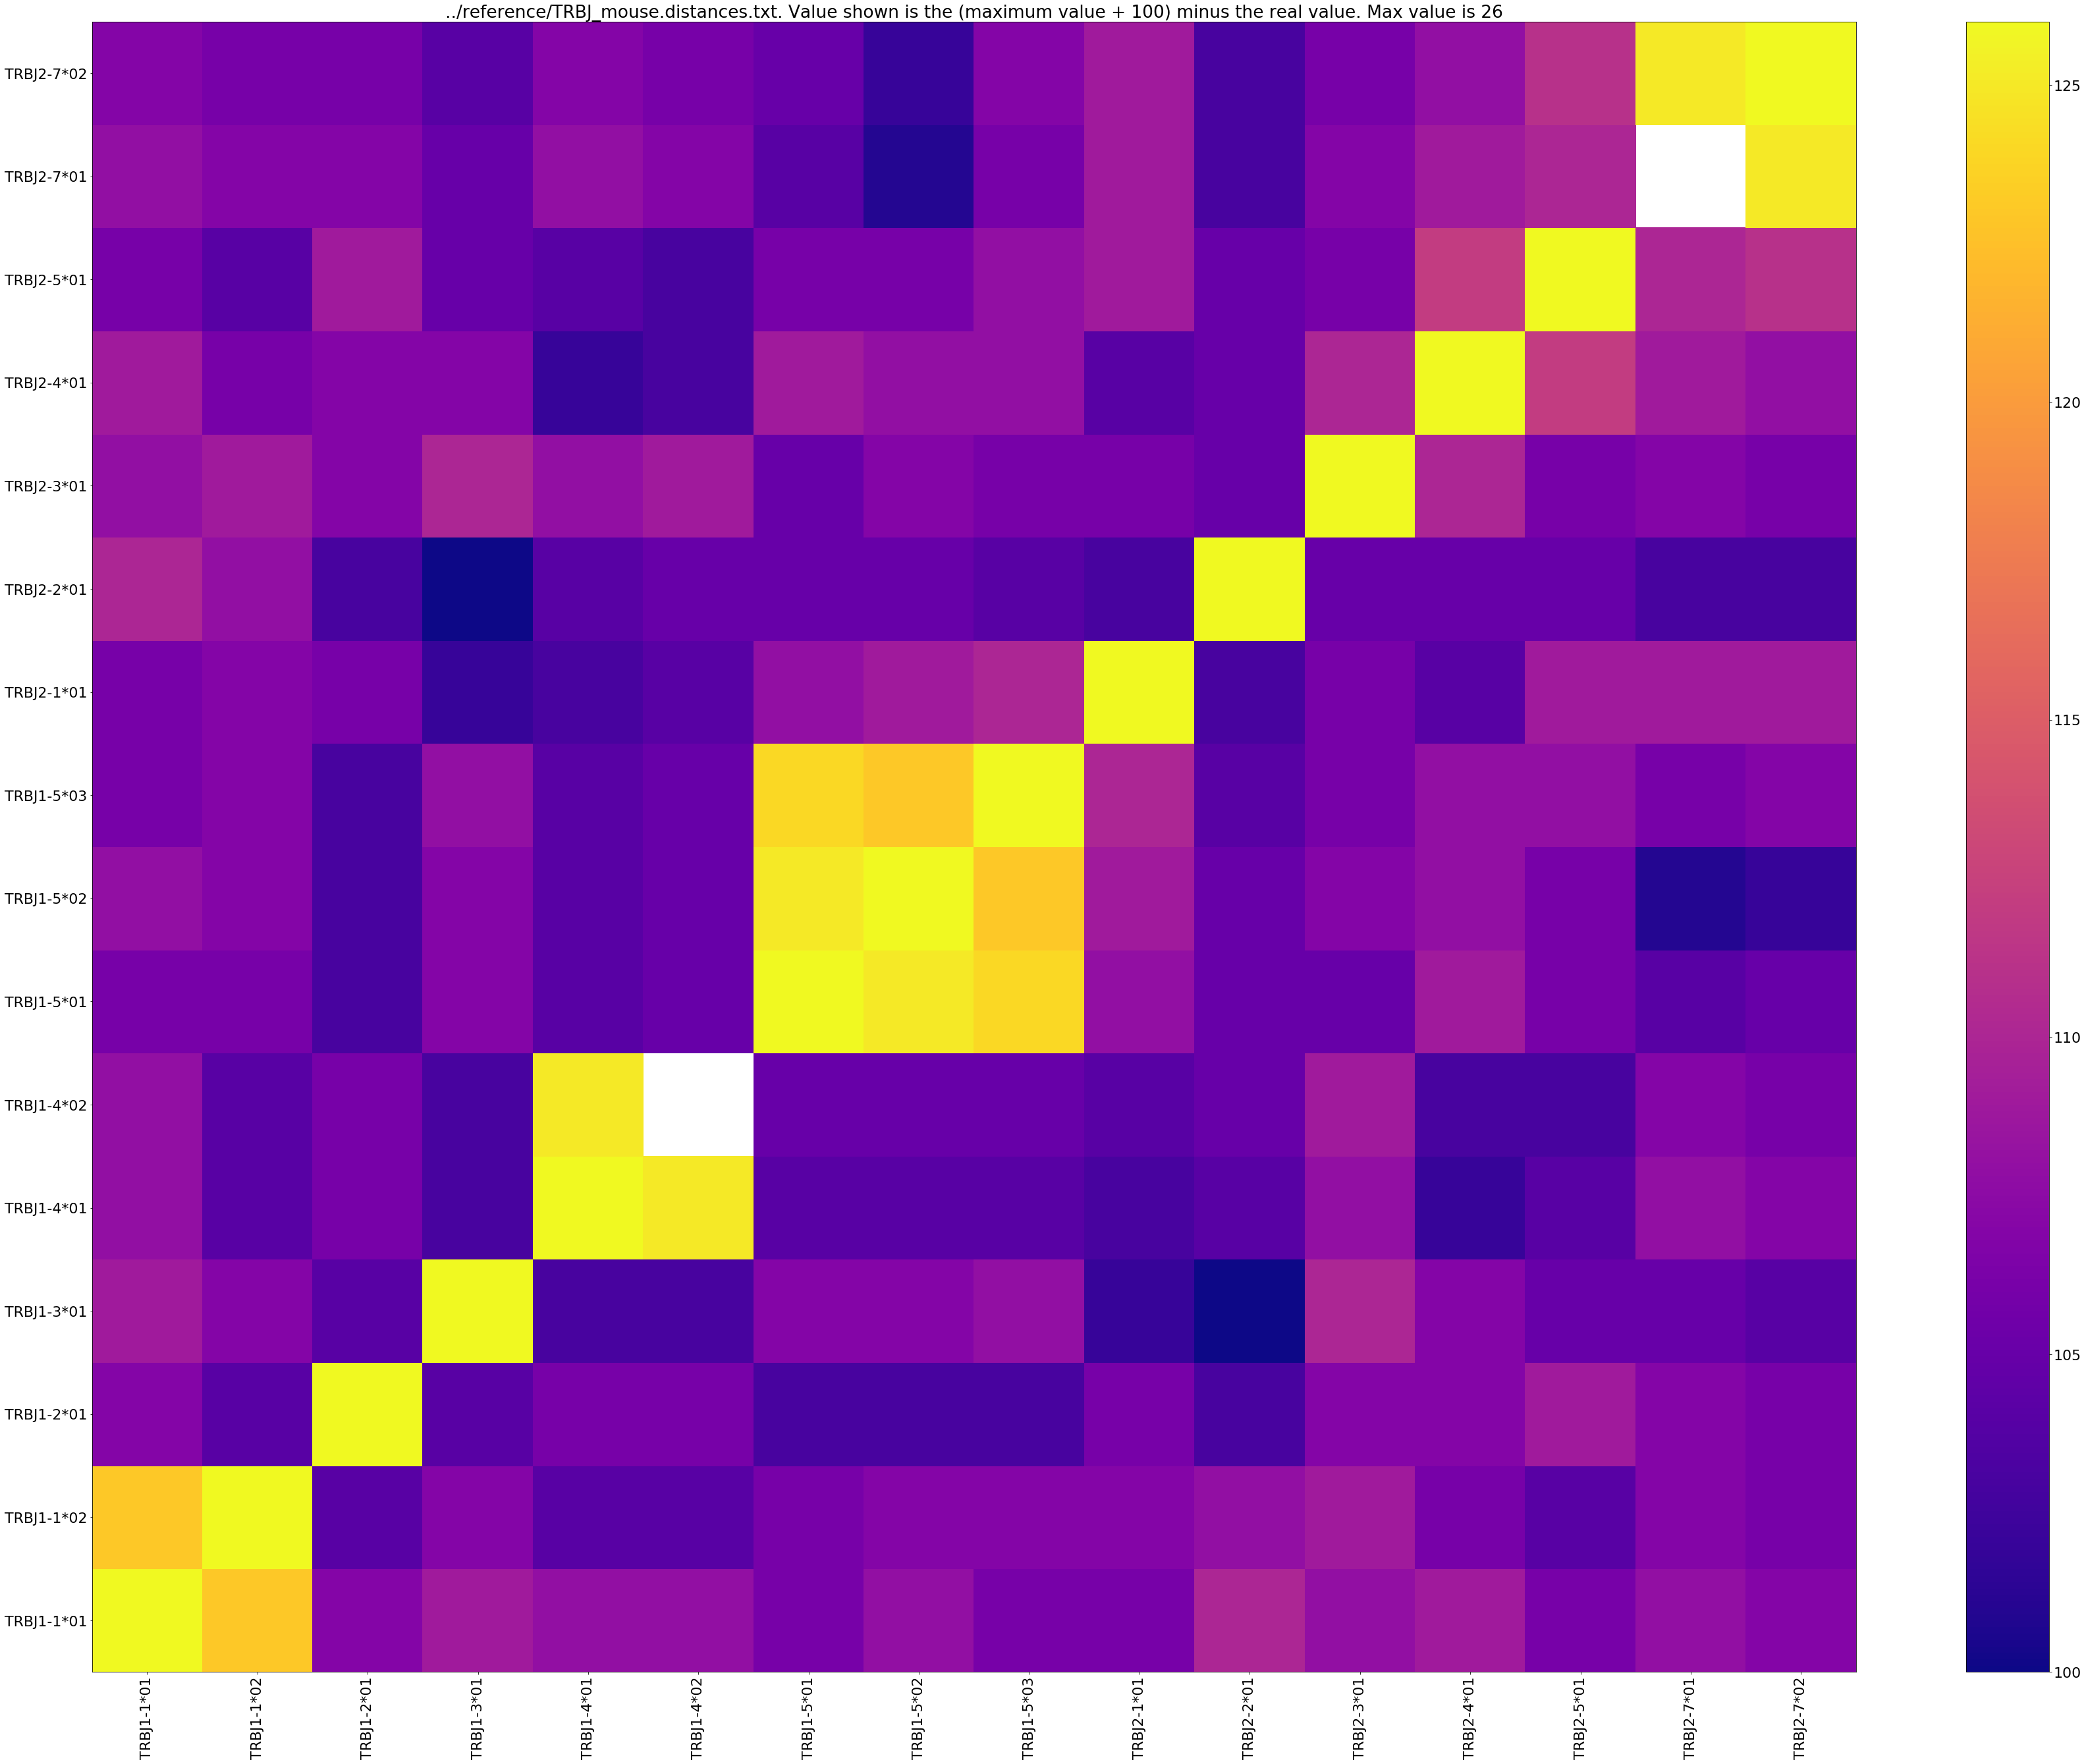

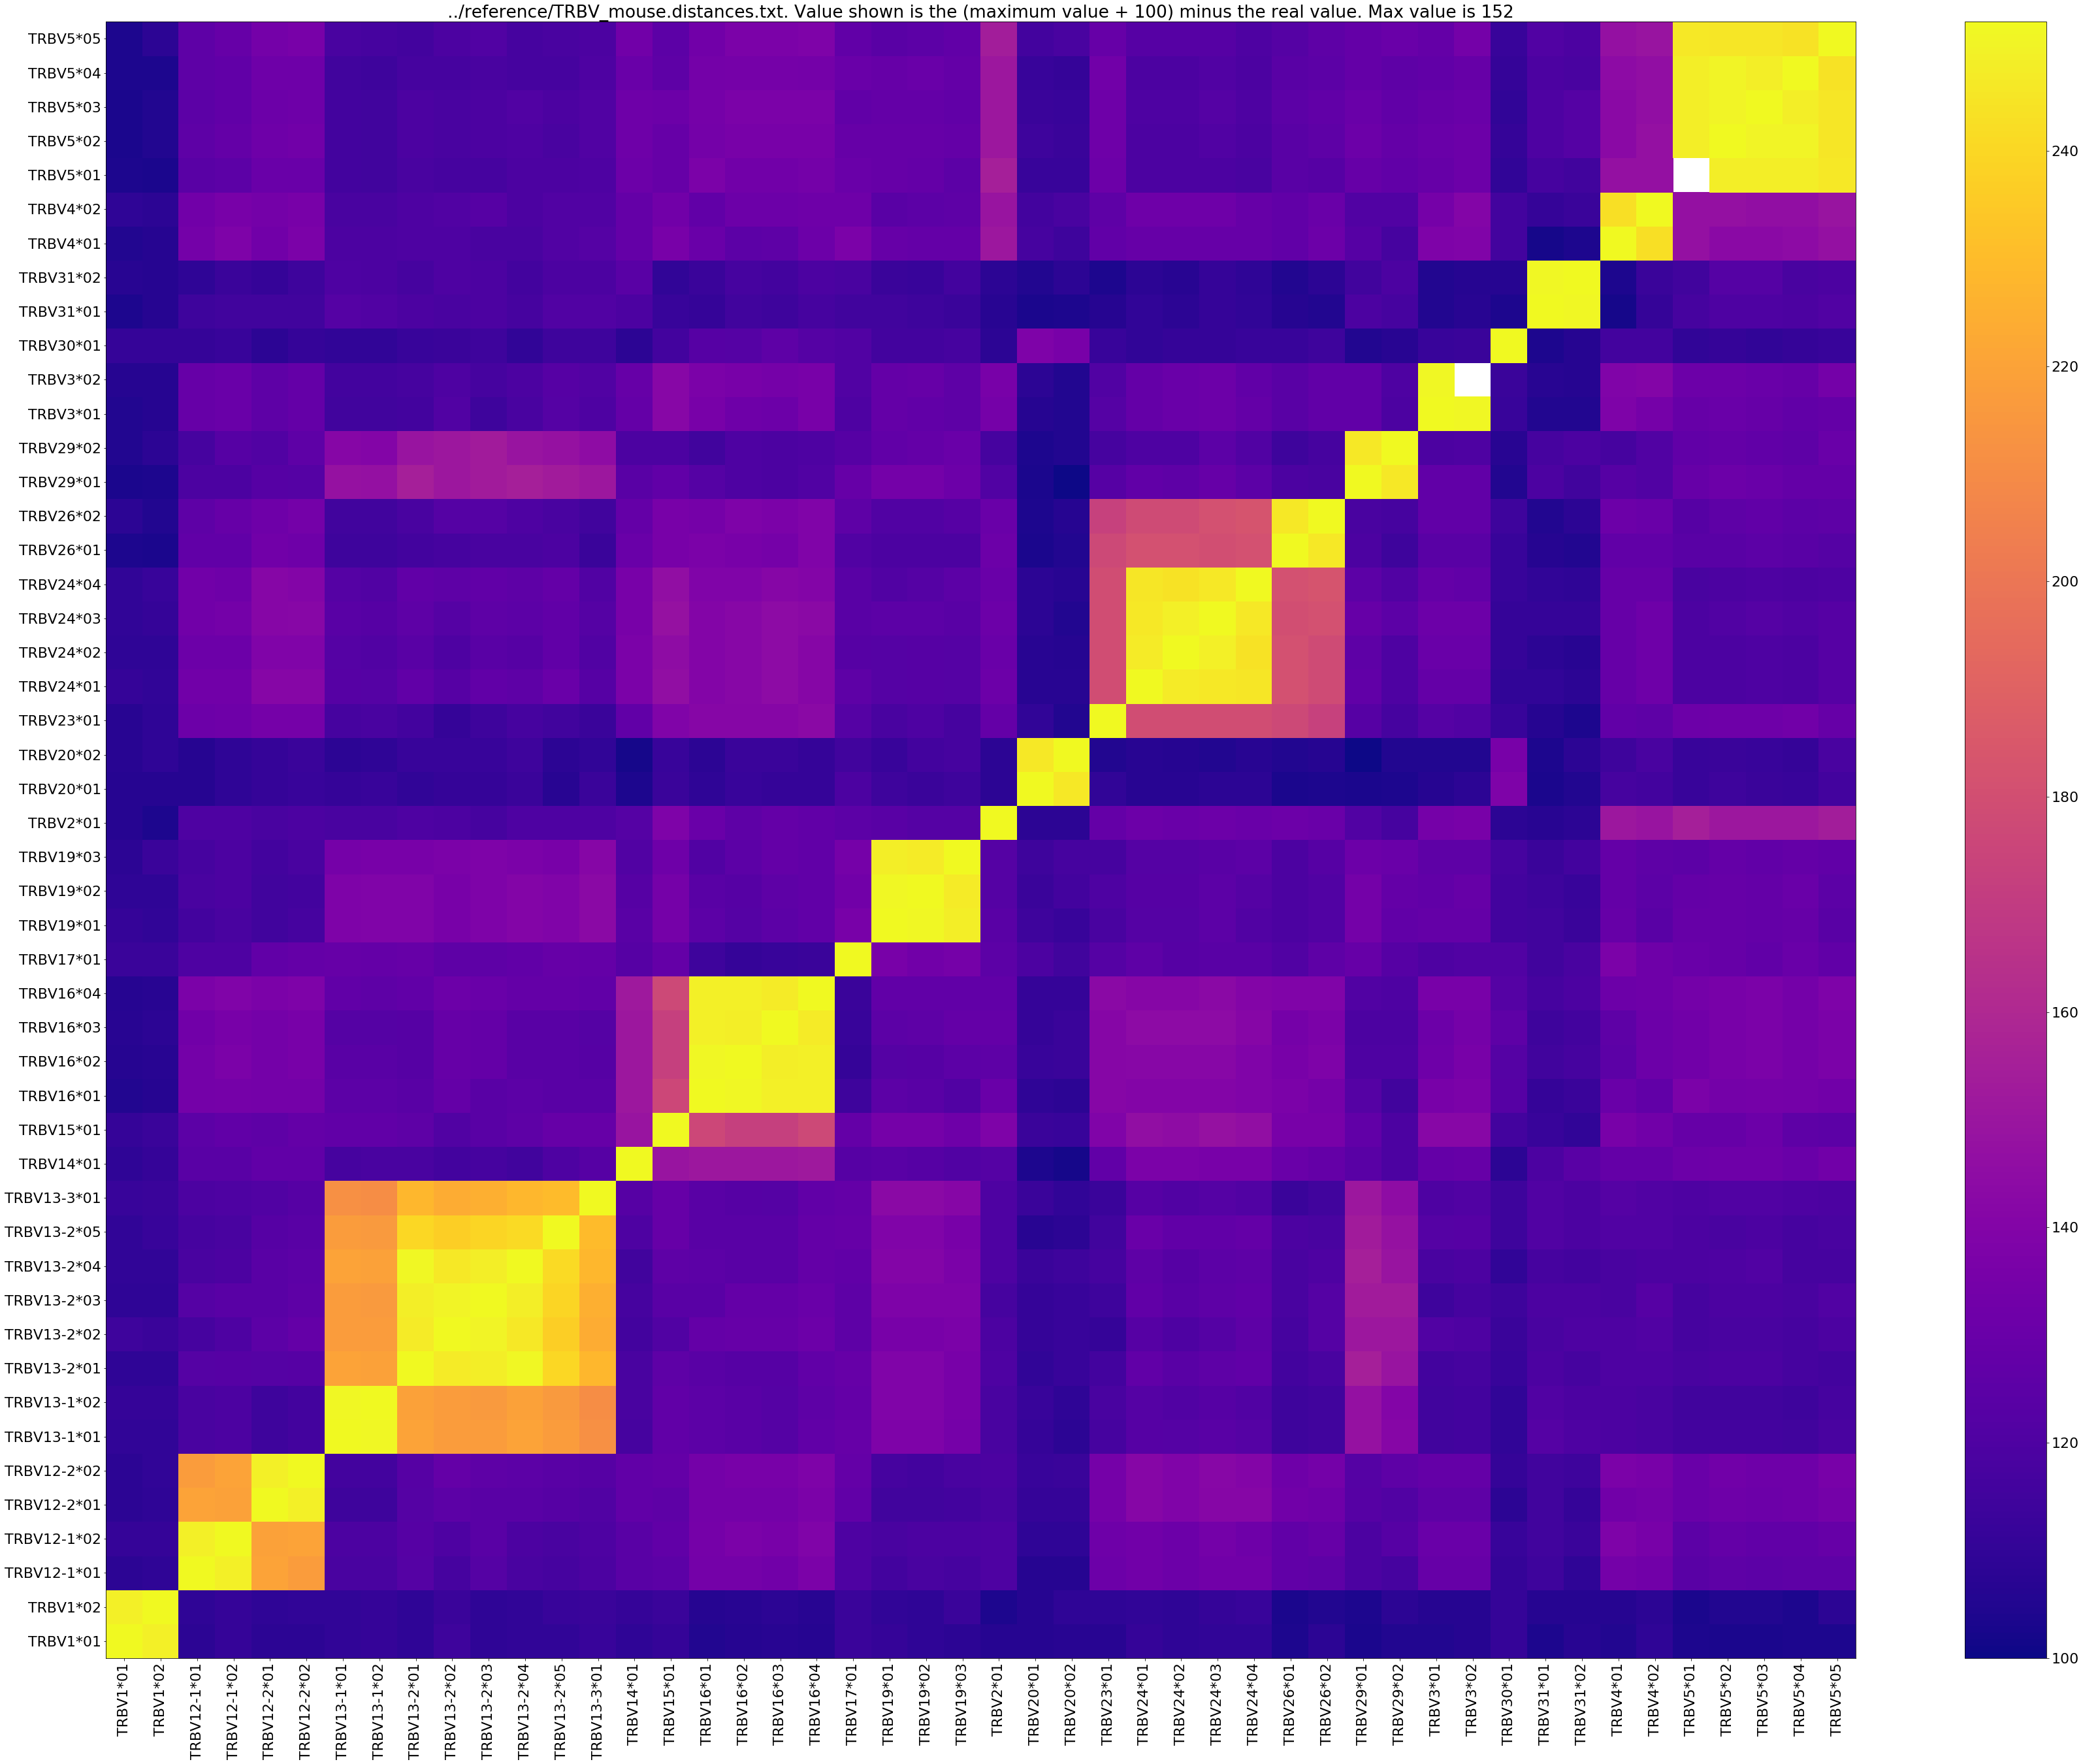

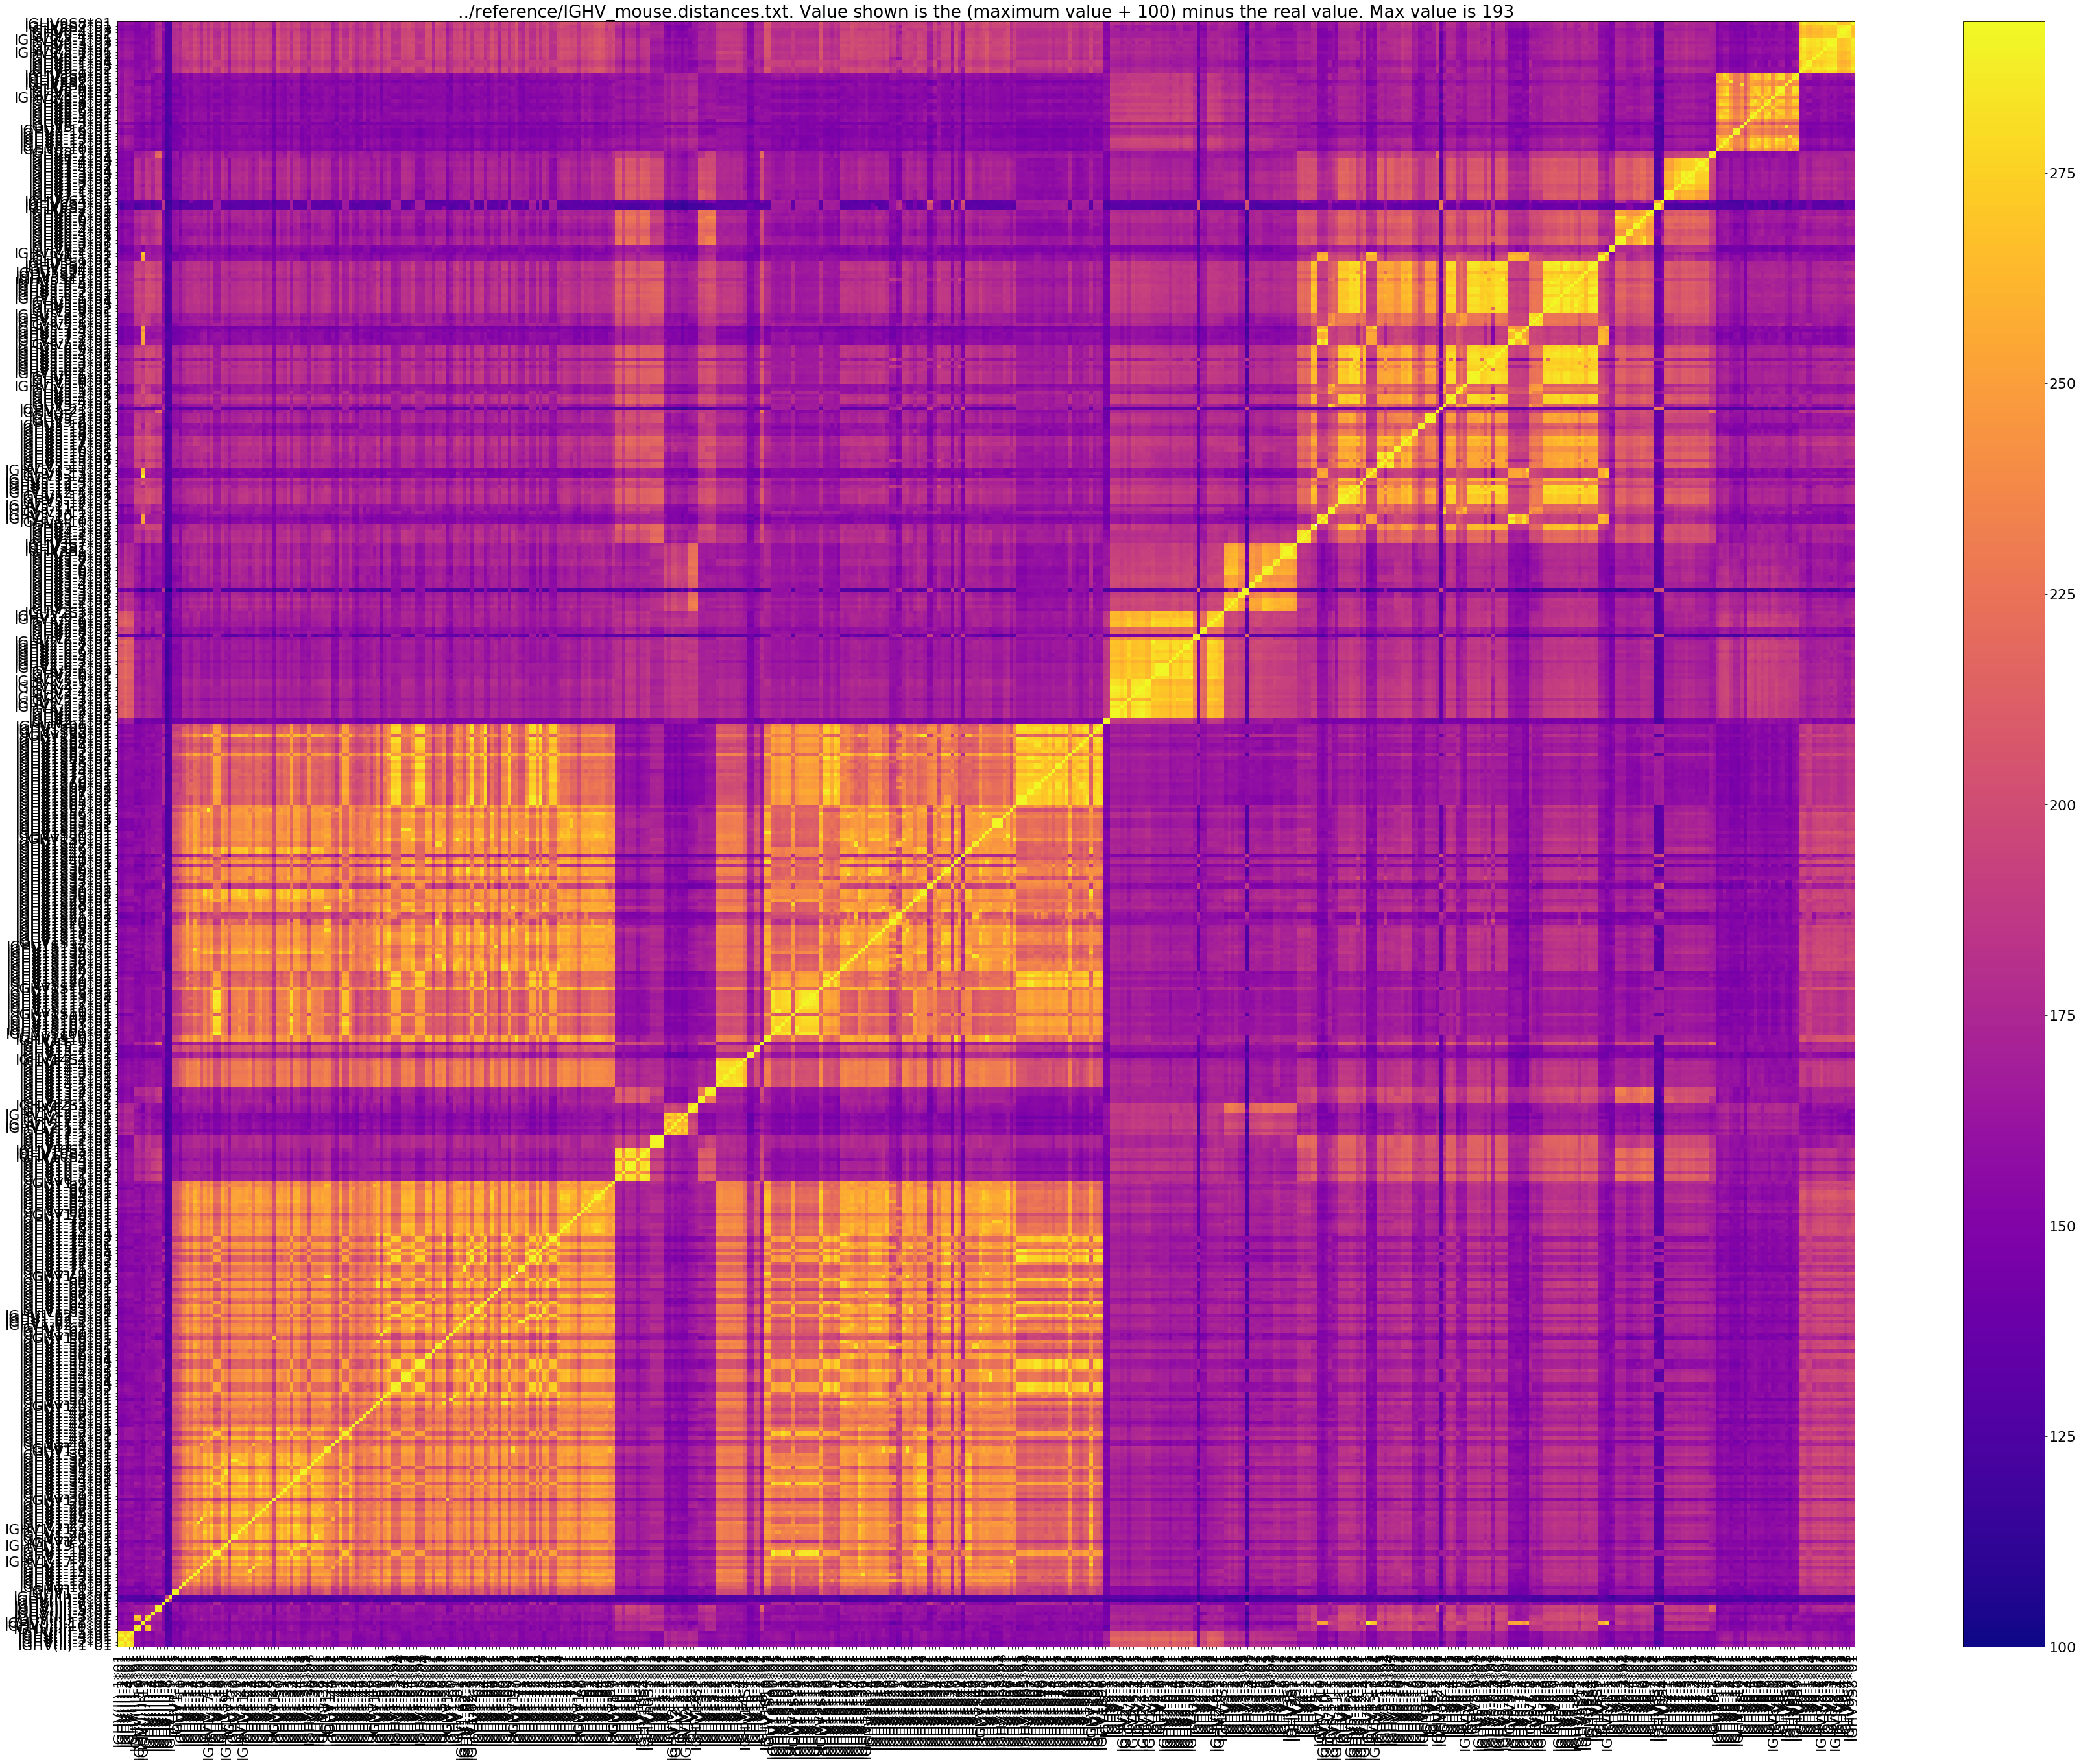

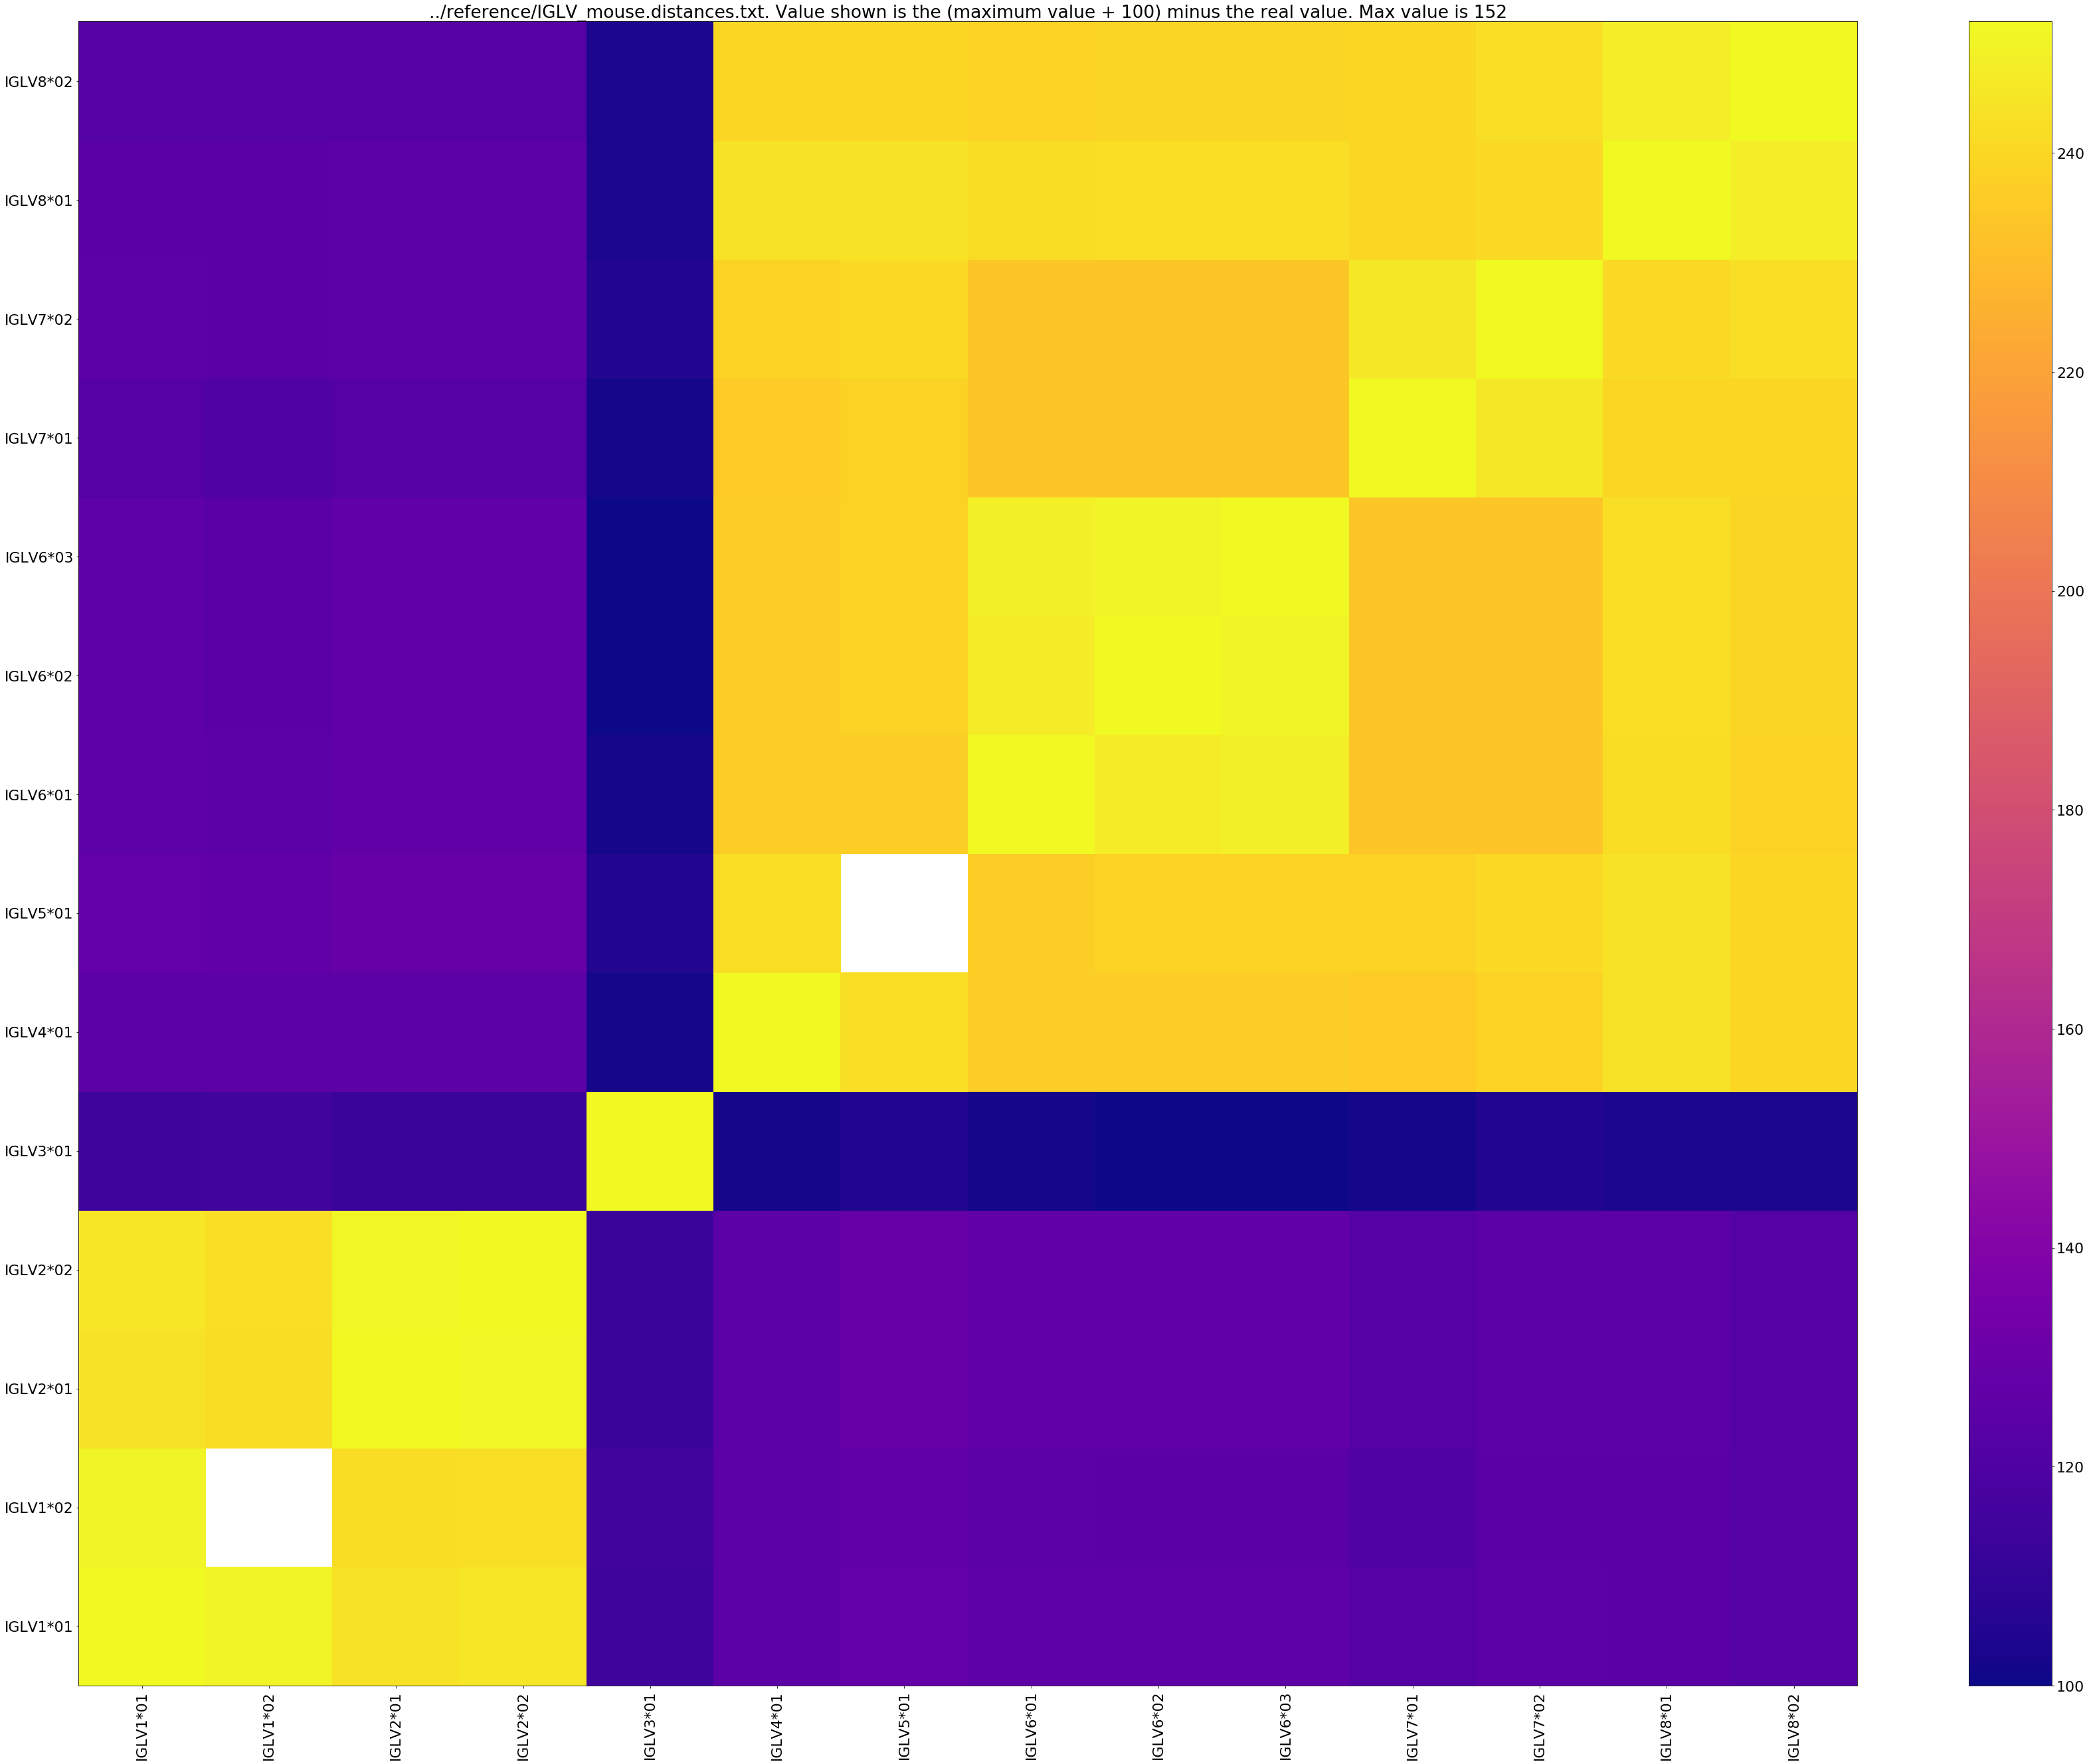

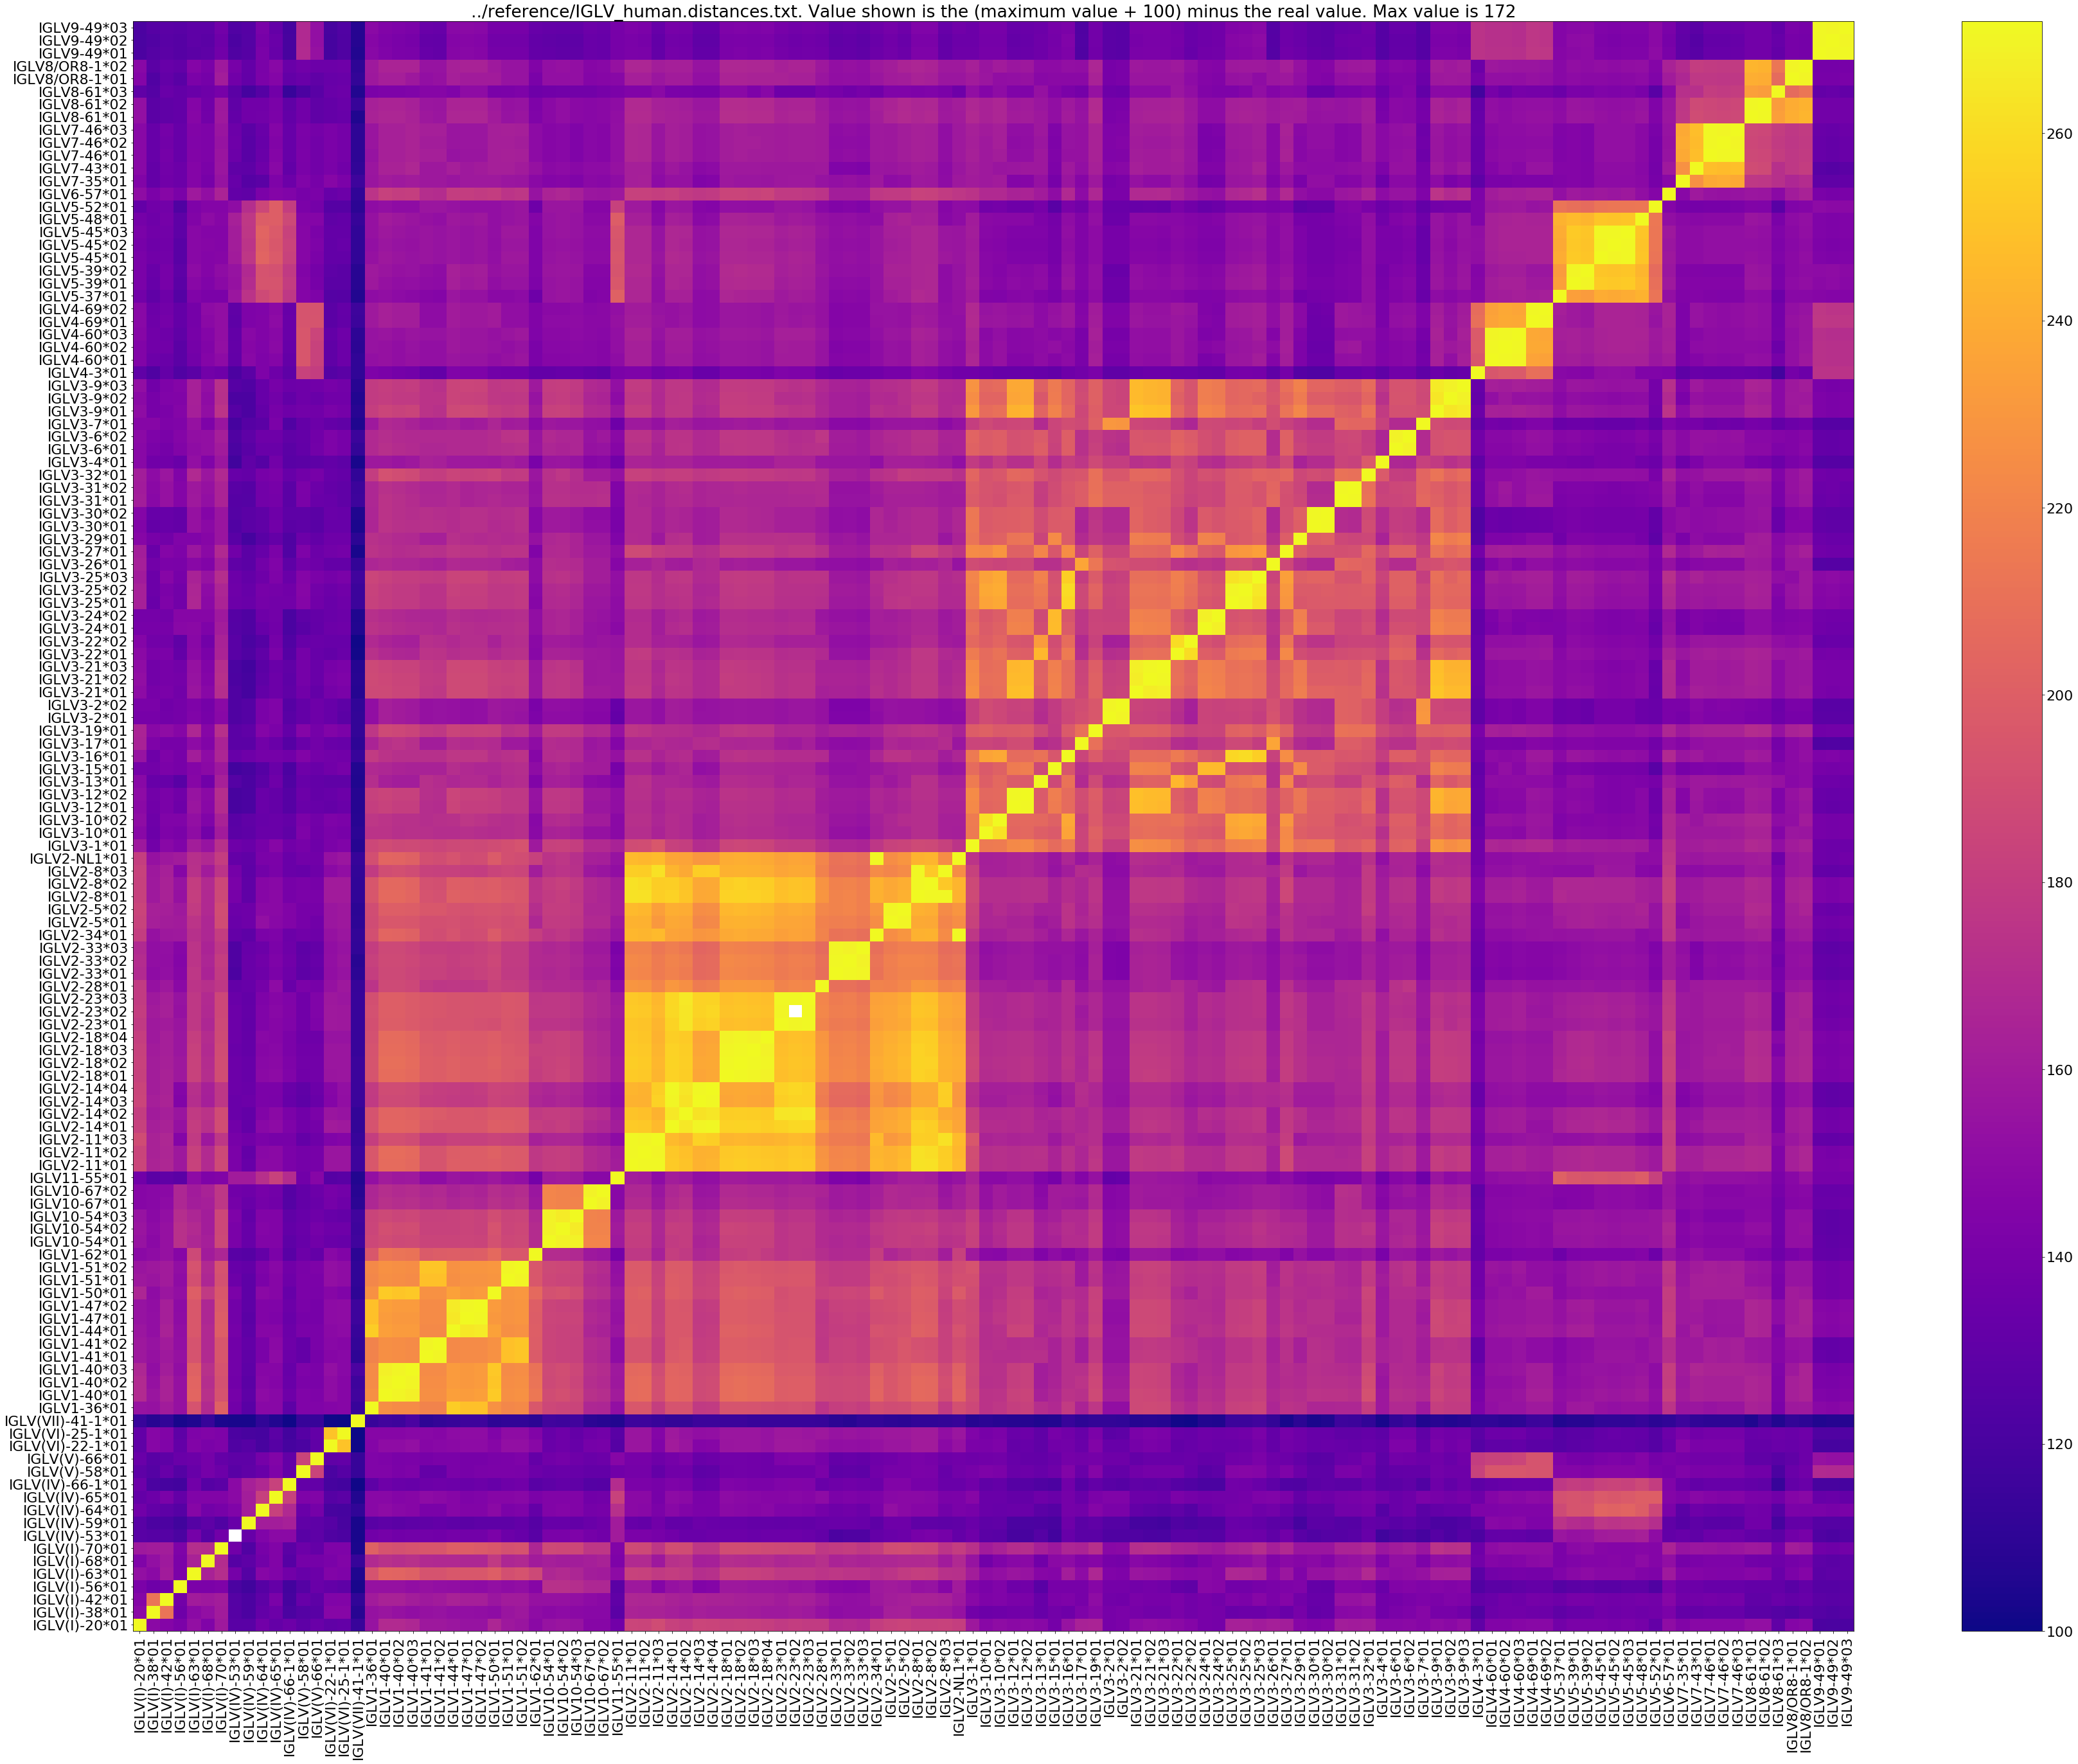

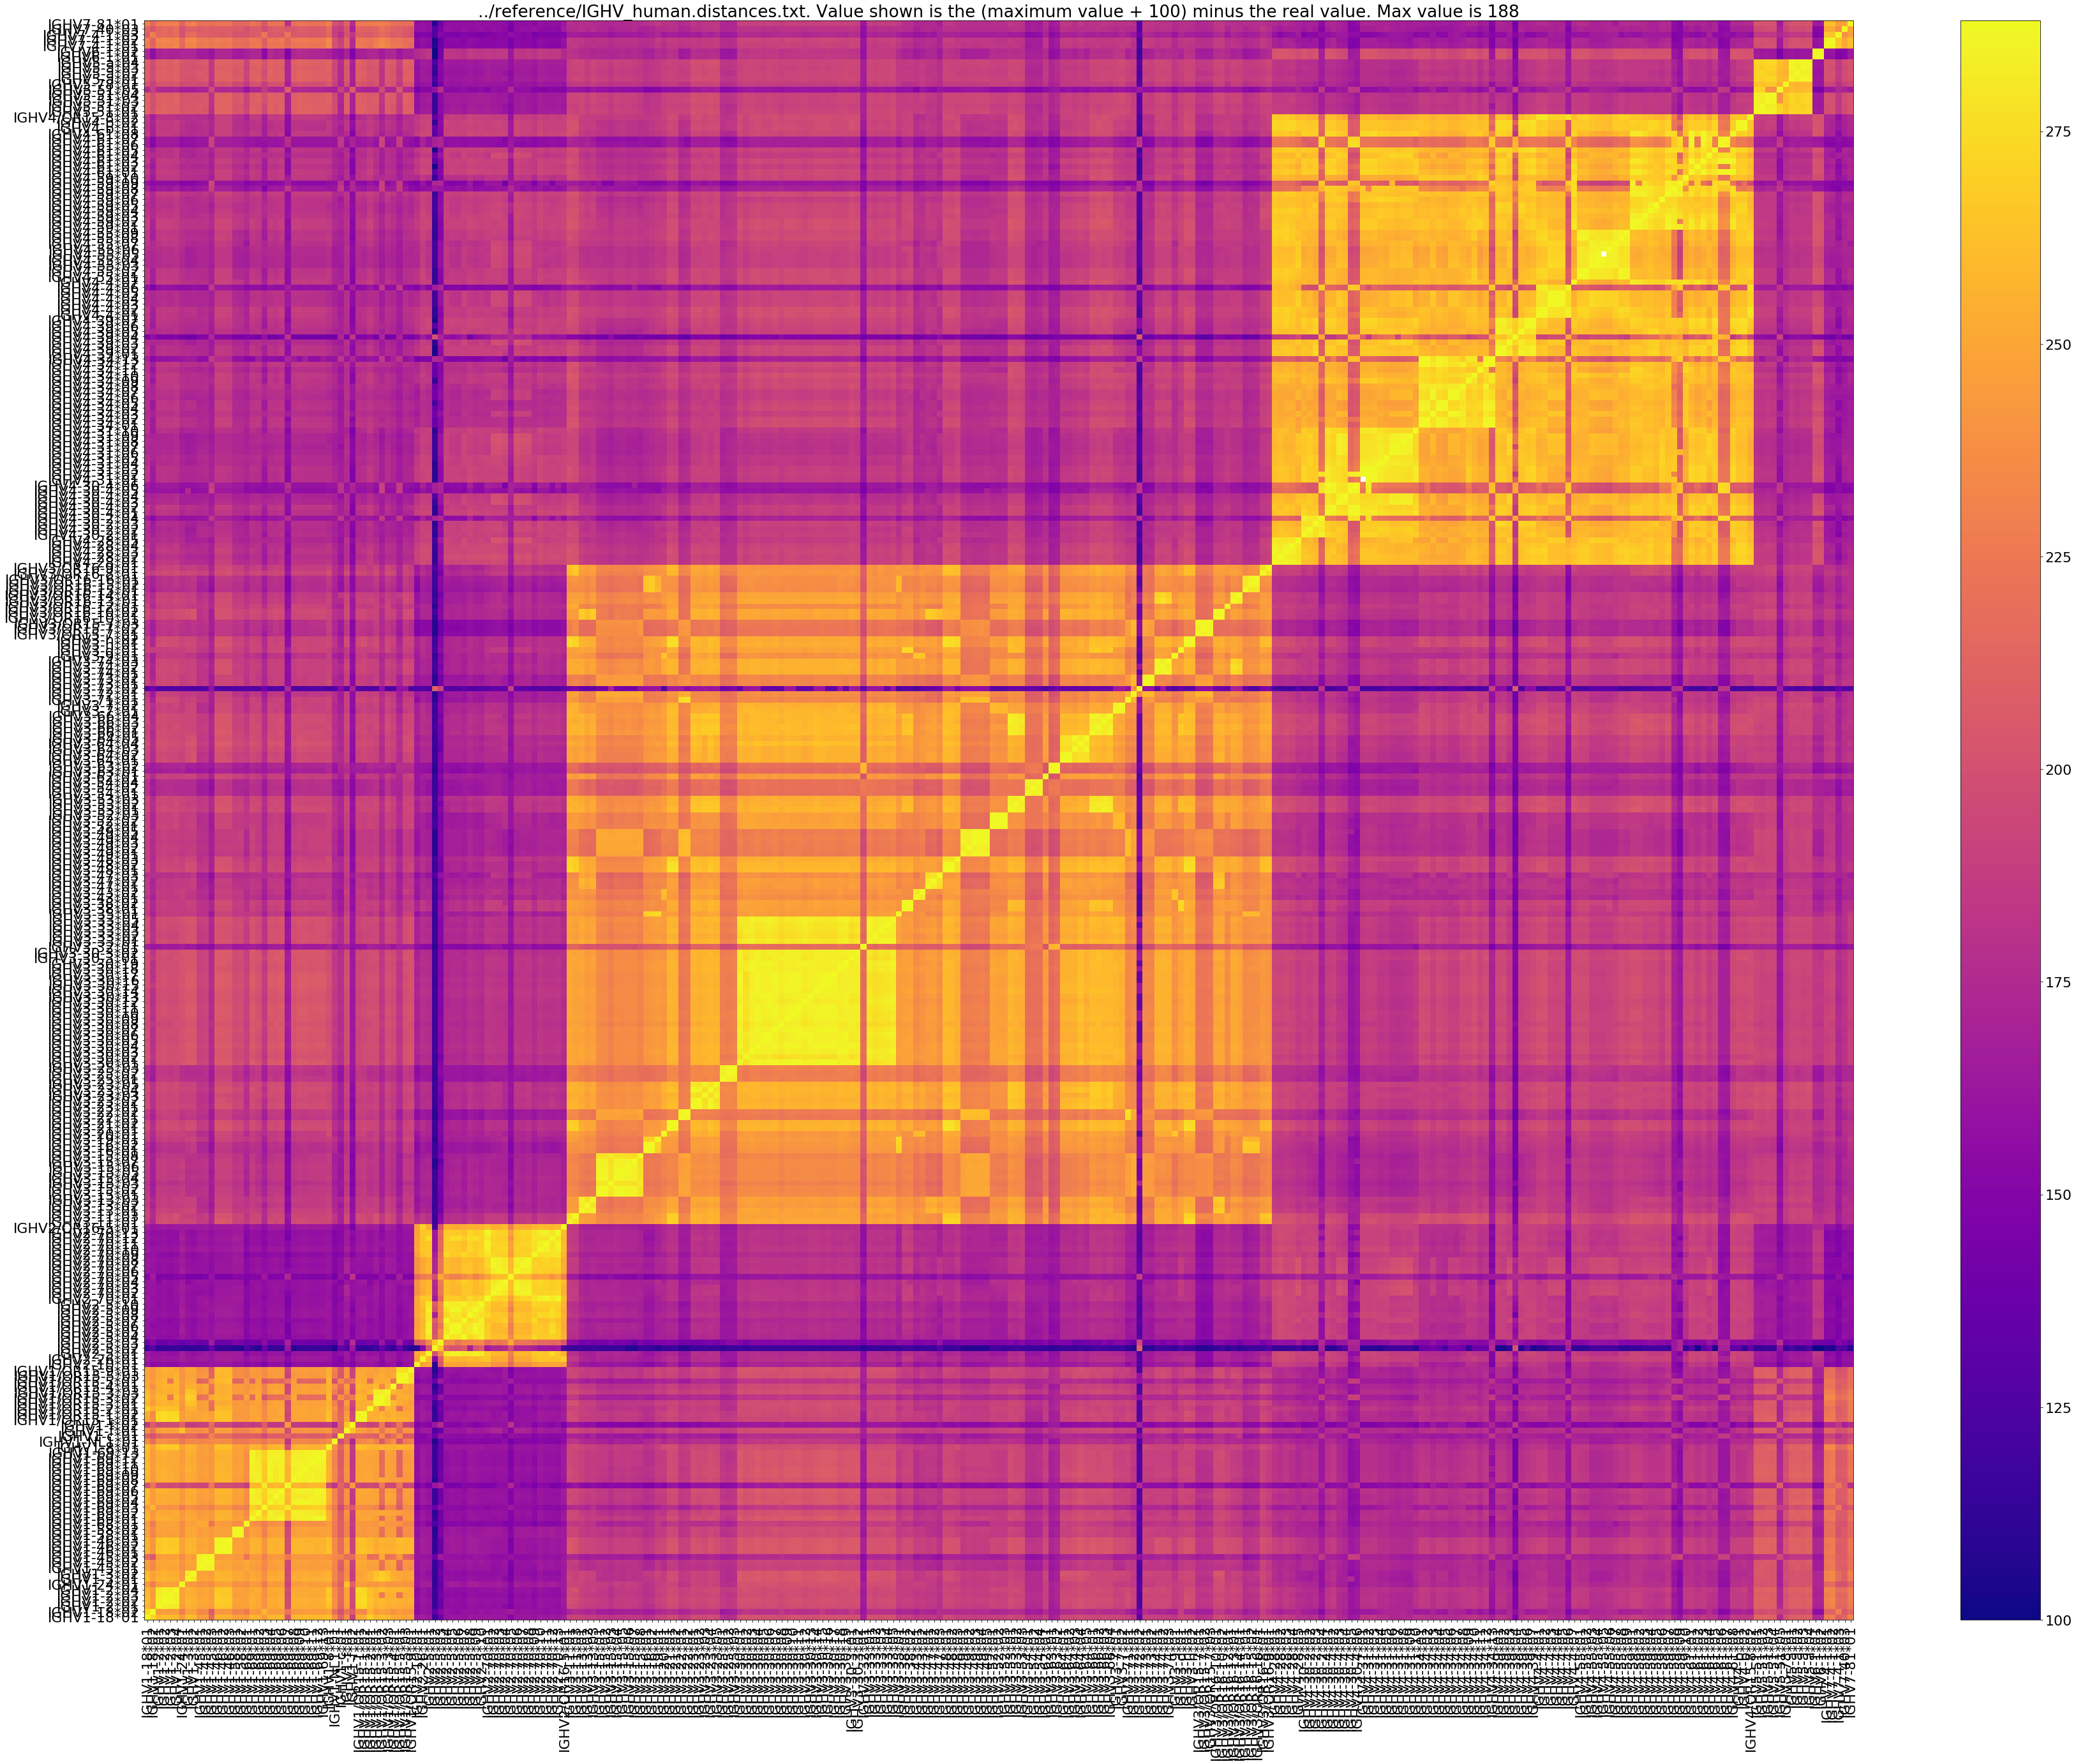

In [5]:
mydir = "../reference/"
myfiles = [x for x in os.listdir(mydir) if x.endswith(".distances.txt")]
for f in myfiles:
    f = mydir + f
    print(f)
    df_matrix, max_value = distanceMatrix(f)
    df_inverted = invertMatrix(df_matrix, max_value)
    plotHeatmap(f, df_inverted, max_value)

In [6]:
#mydir = "../reference/"
#f = "TRBV_human.distances.txt"
#f = mydir + f
#print(f)
#df_matrix, max_value = distanceMatrix(f)
#df_inverted = invertMatrix(df_matrix, max_value)
#plotHeatmap(f, df_inverted, max_value)